# Sparse and Non Negative Asym Auto Encoder with PADO, without original images
* Sparsity Regularizer : KL Divergence (KLdivSum), applied to the activation.
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: infoGAN
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.01, 0.05, 0.1, 0.2
* Sparsity weight: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5

### Addition of an PADO preprocessing, as well as the original images
* Input: Positive Additive Decomposition of Openings by reconstruction with a decreasing structuring element
* Original images (before the decomposition) included as input to the AE

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from AsymAE_infoGAN.nonNegSparseAsymAEinfoGAN import Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [3]:
x_small_PADO = morphoMaths.positive_decomposition_by_openings_by_rec(x_small[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=True)
x_small_PADO.shape

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(10, 28, 28, 7)

In [5]:
results = pd.read_csv("../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26results")
results

Unnamed: 0  sparsity_objective  sparsity_weight  test_error  test_kl_loss  \
0            0                0.01           0.0001    0.010516           0.0   
1            1                0.05           0.0001    0.009581           0.0   
2            2                0.10           0.0001    0.008972           0.0   
3            3                0.20           0.0001    0.008517           0.0   
4            4                0.01           0.0005    0.013453           0.0   
5            5                0.05           0.0005    0.010936           0.0   
6            6                0.10           0.0005    0.009756           0.0   
7            7                0.20           0.0005    0.008597           0.0   
8            8                0.01           0.0010    0.015808           0.0   
9            9                0.05           0.0010    0.011451           0.0   
10          10                0.10           0.0010    0.009968           0.0   
11          11                0.20           0.0010    0.008714           0.0   
12          12                0.01           0.0050    0.019551           0.0   
13          13                0.05           0.0050    0.012646           0.0   
14          14                0.10           0.0050    0.010533           0.0   
15          15                0.20           0.0050    0.009042           0.0   
16          16                0.01           0.0100    0.021528           0.0   
17          17                0.05           0.0100    0.013112           0.0   
18          18                0.10           0.0100    0.010921           0.0   
19          19                0.20           0.0100    0.009458           0.0   
20          20                0.01           0.0500    0.026096           0.0   
21          21                0.05           0.0500    0.017436           0.0   
22          22                0.10           0.0500    0.014203           0.0   
23          23                0.20           0.0500    0.012680           0.0   
24          24                0.01           0.1000    0.030206           0.0   
25          25                0.05           0.1000    0.021246           0.0   
26          26                0.10           0.1000    0.018024           0.0   
27          27                0.20           0.1000    0.016154           0.0   
28          28                0.01           0.5000    0.045193           0.0   
29          29                0.05           0.5000    0.041879           0.0   
30          30                0.10           0.5000    0.038016           0.0   
31          31                0.20           0.5000    0.040504           0.0   

    test_max_approx_error_toOriginal_dilatation  \
0                                      0.545449   
1                                      0.692551   
2                                      0.808302   
3                                      1.182705   
4                                      0.142514   
5                                      0.261464   
6                                      0.463101   
7                                      0.922542   
8                                      0.102814   
9                                      0.166653   
10                                     0.374968   
11                                     0.889555   
12                                     0.034106   
13                                     0.113421   
14                                     0.328644   
15                                     0.846690   
16                                     0.030009   
17                                     0.099808   
18                                     0.339379   
19                                     0.866841   
20                                     0.030658   
21                                     0.114556   
22                                     0.367356   
23                                     0.981586   
24                                     0.033992   
25  

In [6]:
max_values = results.max(axis=0)
max_idx = results.idxmax()
min_values = results.min(axis=0)
min_idx = results.idxmin()
median_values = results.median()
std_values = results.std()
sparsity_objectives = results['sparsity_objective']
sparsity_weights = results['sparsity_weight']

In [7]:

print('***********************Maximum values**********************')
print(max_values[1:])
print('\n')
print('***********************Minimum values**********************')
print(min_values[1:])
print('\n')
print('***********************Median values**********************')
print(median_values[1:])


***********************Maximum values**********************
sparsity_objective                                 0.200000
sparsity_weight                                    0.500000
test_error                                         0.045193
test_kl_loss                                       0.000000
test_max_approx_error_toOriginal_dilatation        1.187409
test_max_approx_error_toRec_dilatation             1.213938
test_sparsity                                      0.833634
training_error                                     0.044282
training_kl_loss                                   0.000000
training_max_approx_error_toOriginal_dilatation    1.182190
training_max_approx_error_toRec_dilatation         1.209656
training_sparsity                                  0.835120
dtype: float64


***********************Minimum values**********************
sparsity_objective                                 0.010000
sparsity_weight                                    0.000100
test_error             

In [8]:
print('\033[1m'+'Lowest error: '+'\033[0m' , round(min_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_error']], ', sparsity_weight=', sparsity_weights[min_idx['test_error']], '\n')
print('\033[1m'+'Highest error: '+'\033[0m', round(max_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_error']], ', sparsity_weight=', sparsity_weights[max_idx['test_error']], '\n')
print('\033[1m'+'Least sparse: '+'\033[0m' , round(min_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[min_idx['test_sparsity']], '\n')
print('\033[1m'+'Most sparse: '+'\033[0m', round(max_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[max_idx['test_sparsity']], '\n')
print('\033[1m'+'Lowest Max-approximation error to dilatation of the originals: '+'\033[0m' , round(min_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Highest  Max-approximation error to dilatation of the originals: '+'\033[0m', round(max_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Lowest KL-loss: '+'\033[0m' , round(min_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[min_idx['test_kl_loss']], '\n')
print('\033[1m'+'Highest KL-loss: '+'\033[0m', round(max_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[max_idx['test_kl_loss']], '\n')
print('\033[1m'+'Lowest max-approximation error to dilatation of the reconstruction: '+'\033[0m' , round(min_values['test_max_approx_error_toRec_dilatation'], 5), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toRec_dilatation']], '\n')
print('\033[1m'+'Highest max-approximation error to dilatation of the reconstruction: '+'\033[0m', round(max_values['test_max_approx_error_toRec_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toRec_dilatation']], '\n')


Lowest error:  0.0085 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Highest error:  0.0452 , sparsity_objective= 0.01 , sparsity_weight= 0.5 

Least sparse:  0.2259 , sparsity_objective= 0.2 , sparsity_weight= 0.5 

Most sparse:  0.8336 , sparsity_objective= 0.01 , sparsity_weight= 0.05 

Lowest Max-approximation error to dilatation of the originals:  0.03 , sparsity_objective= 0.01 , sparsity_weight= 0.01 

Highest  Max-approximation error to dilatation of the originals:  1.1874 , sparsity_objective= 0.2 , sparsity_weight= 0.5 

Lowest KL-loss:  0.0 , sparsity_objective= 0.01 , sparsity_weight= 0.0001 

Highest KL-loss:  0.0 , sparsity_objective= 0.01 , sparsity_weight= 0.0001 

Lowest max-approximation error to dilatation of the reconstruction:  0.01048 , sparsity_objective= 0.01 , sparsity_weight= 0.05 

Highest max-approximation error to dilatation of the reconstruction:  1.2139 , sparsity_objective= 0.2 , sparsity_weight= 0.5 



Nb:
* Lowest error reached with weakest sparsity constraints.
* Highest error reached with strongest sparsity constraints.
* The lowest sparsity measuer is not significant, as if all coefficients are very close to zero but are similar, then the sparsity measure from Hoyer 2004 is close to 0.
* Highest max-approximation error to dilatation of the originals and of the reconstruction reached with the weakest sparsity constraint.

In [9]:
sparsity_objectives = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_test_errors_dim100.npy')
train_mse = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_training_errors_dim100.npy')
test_kl_loss = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_26_training_sparsity_dim100.npy')

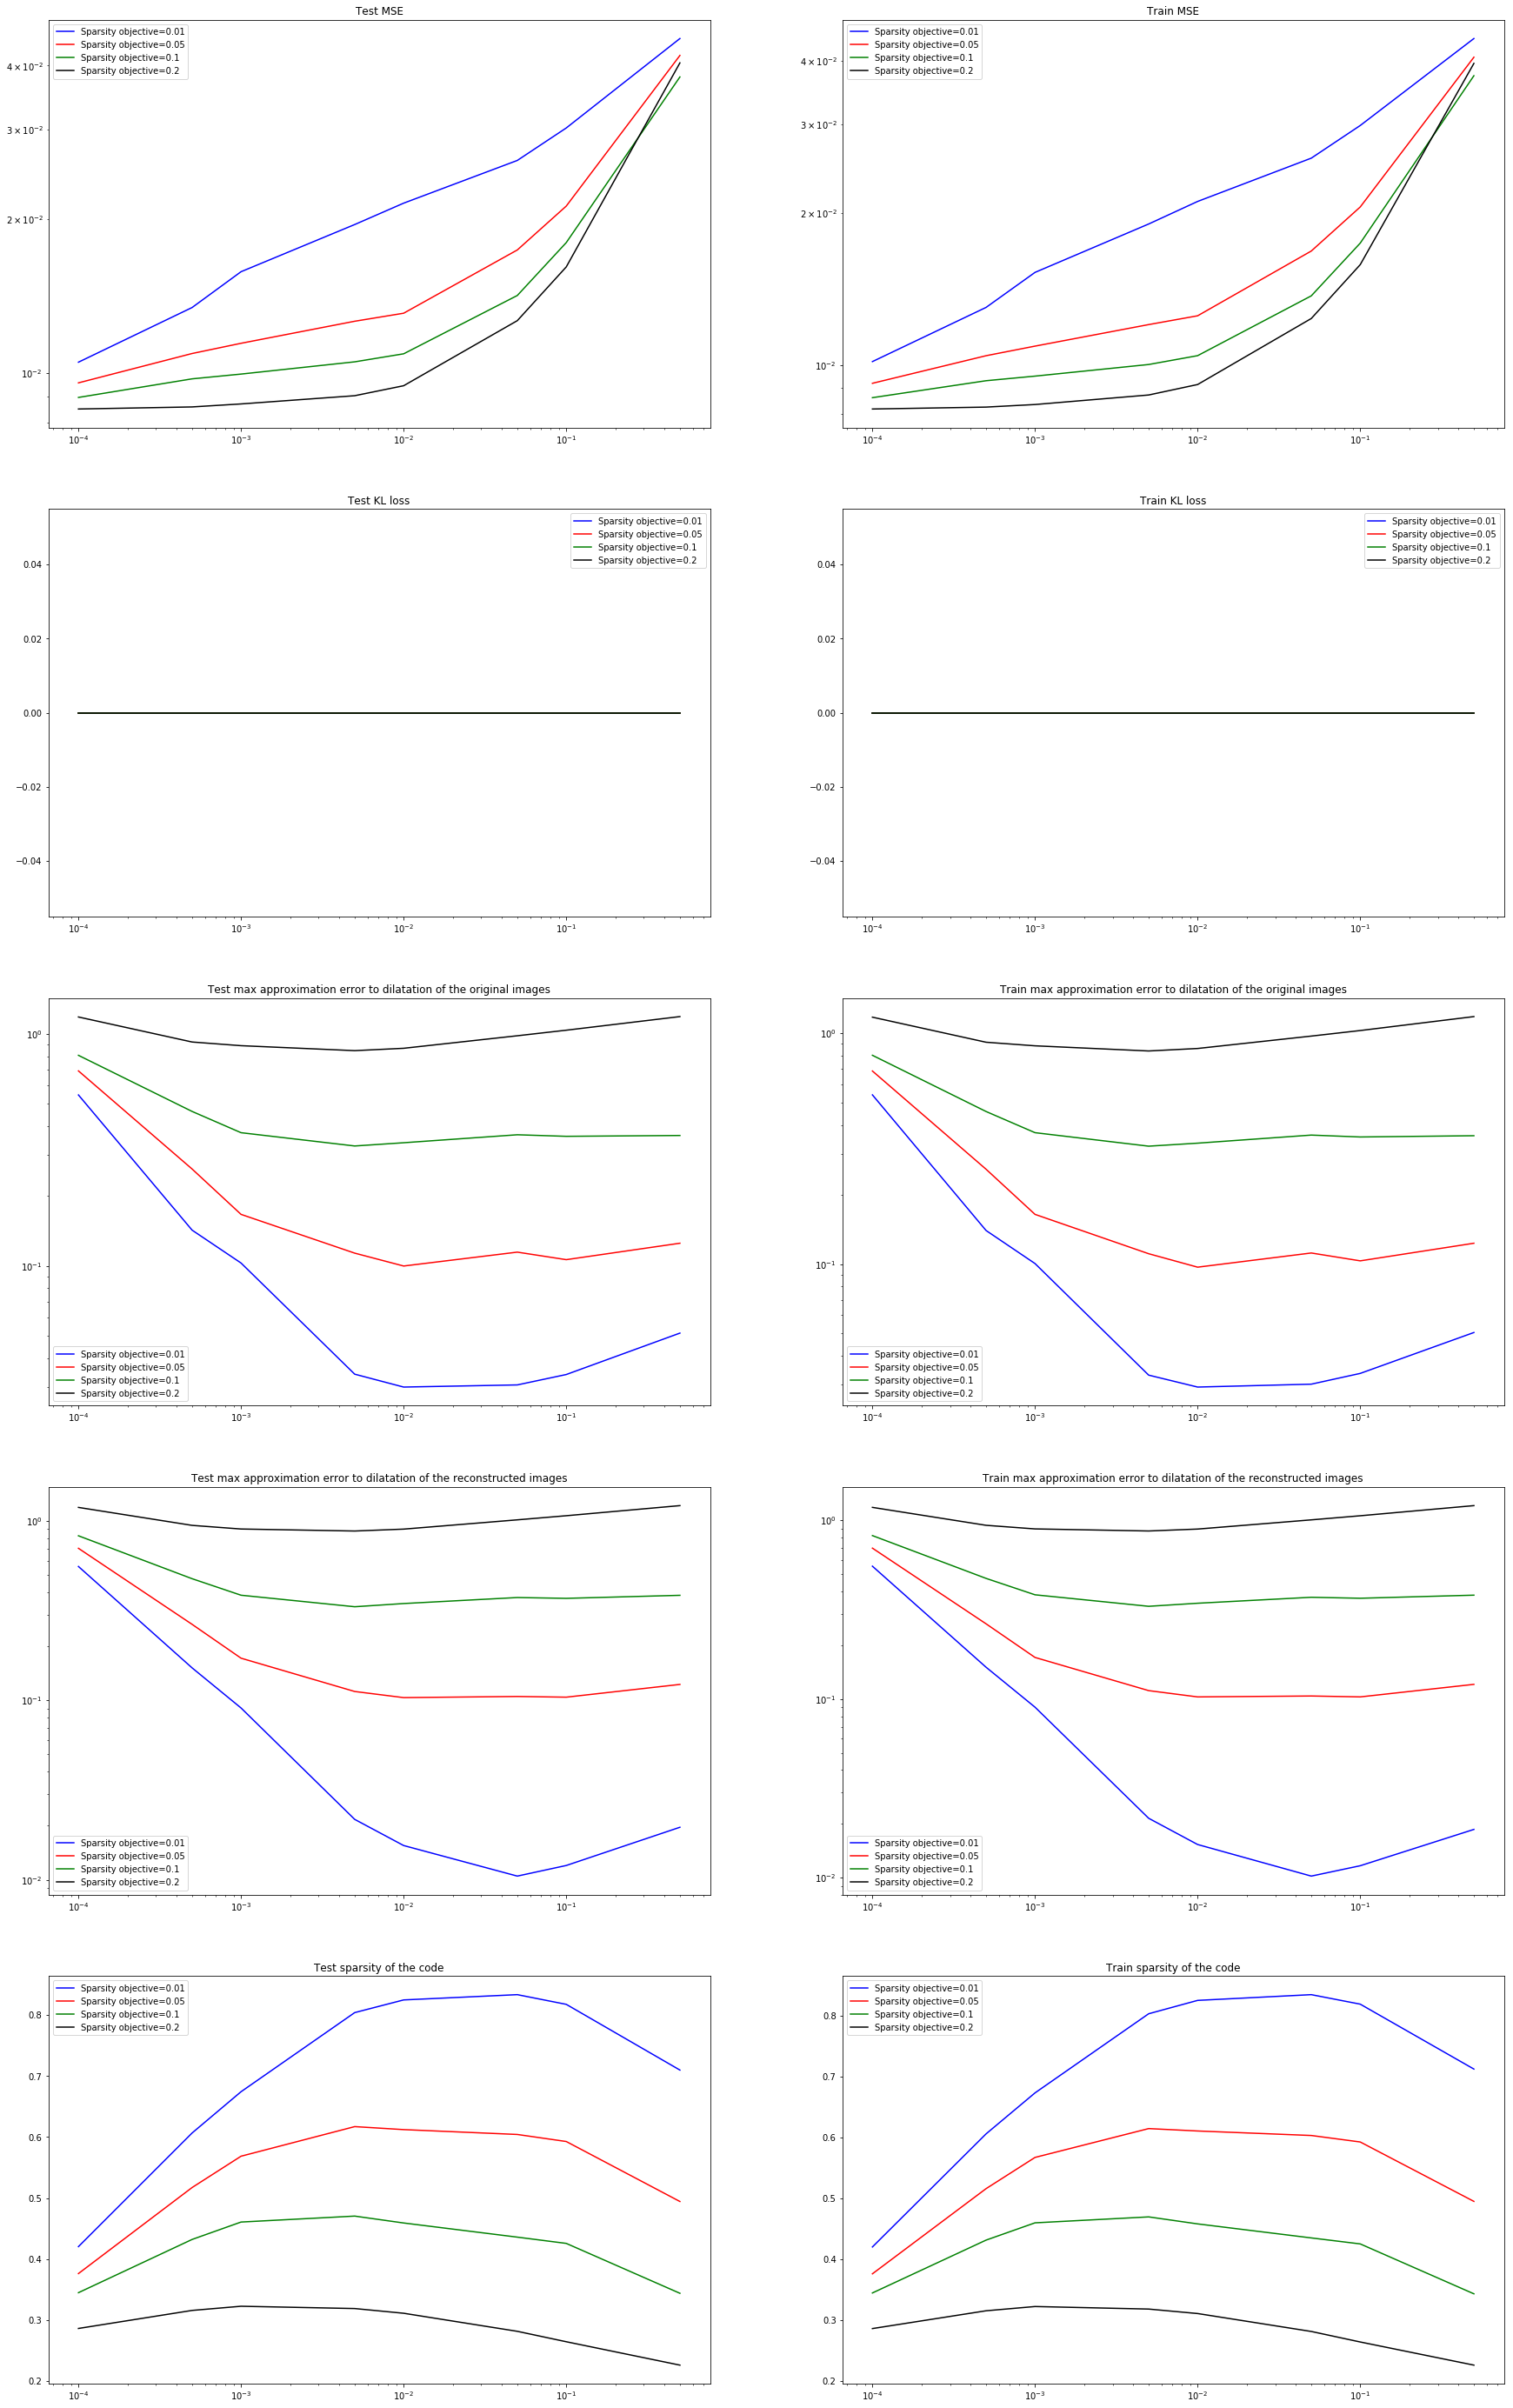

In [12]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, train_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.plot(sparsity_weights, train_mse[:,2], 'g')
ax.plot(sparsity_weights, train_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

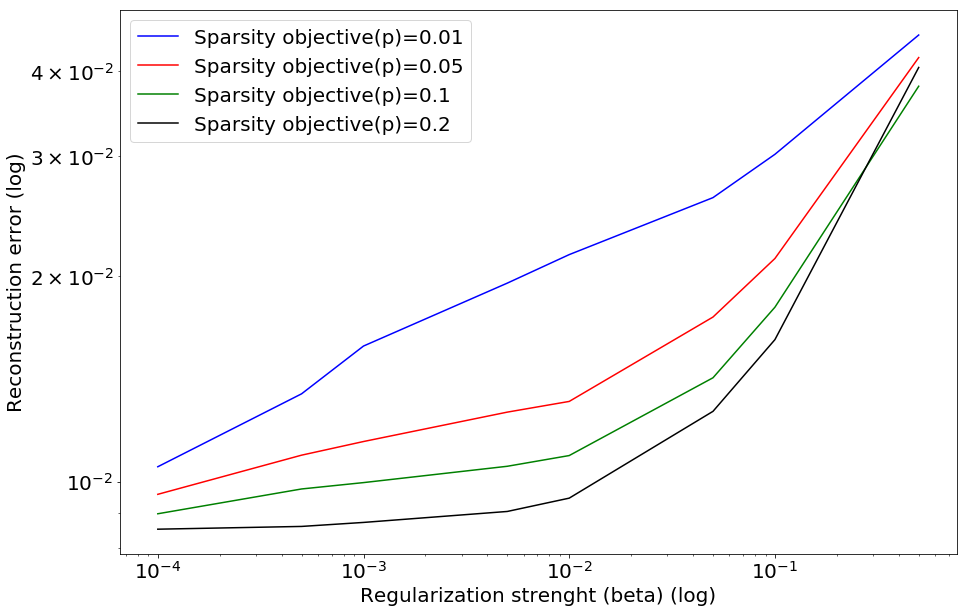

In [13]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_mse[:,0], 'b')
plt.plot(sparsity_weights, test_mse[:,1], 'r')
plt.plot(sparsity_weights, test_mse[:,2], 'g')
plt.plot(sparsity_weights, test_mse[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Reconstruction error (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

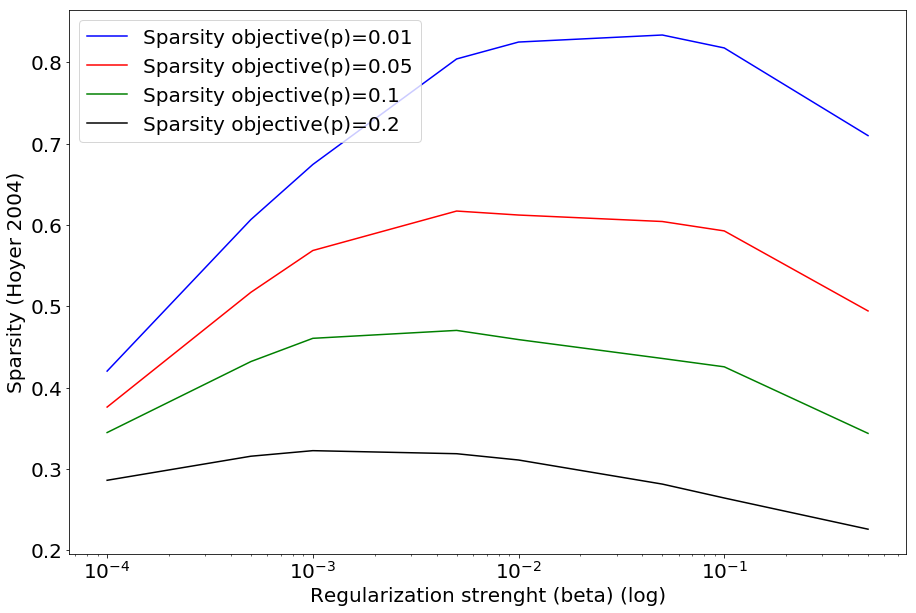

In [14]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_sparsity[:,0], 'b')
plt.plot(sparsity_weights, test_sparsity[:,1], 'r')
plt.plot(sparsity_weights, test_sparsity[:,2], 'g')
plt.plot(sparsity_weights, test_sparsity[:,3], 'k')
plt.xscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Sparsity (Hoyer 2004)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

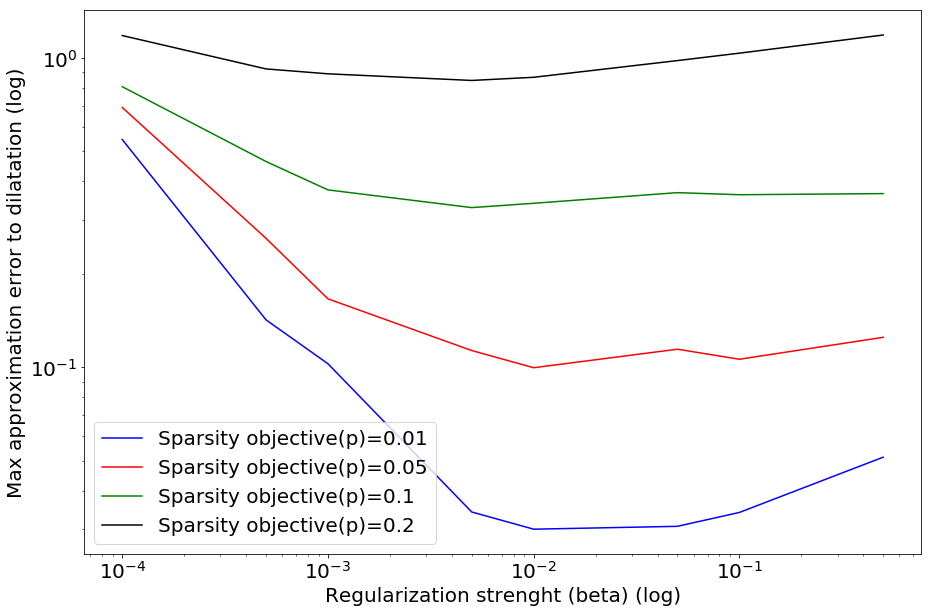

In [15]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilatation (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

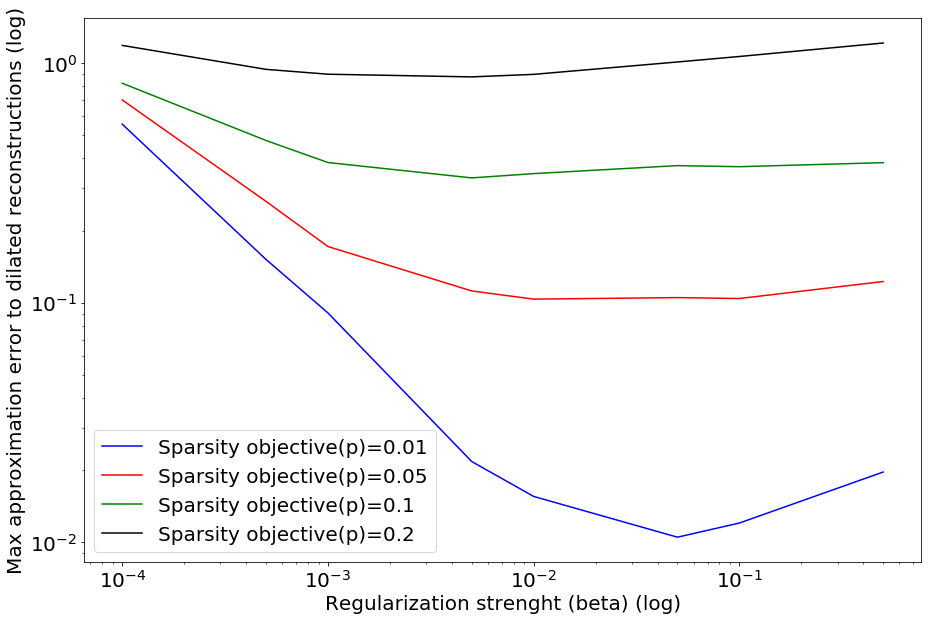

In [16]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilated reconstructions (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

# 1. Sparsity_Objective = 0.01

## 1.1 Sparsity_weight = 0.0001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.010516252833604812


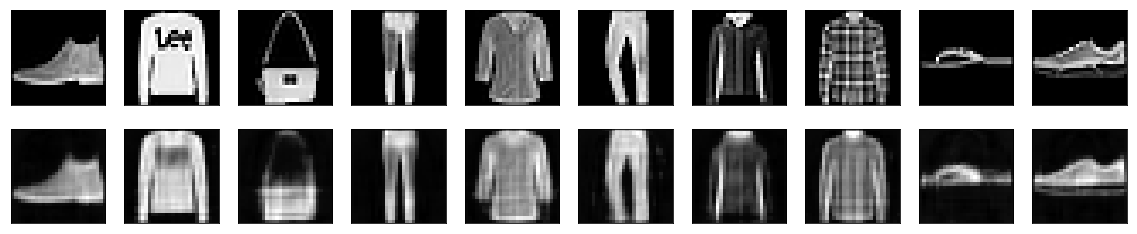

Histograms of the encodings - Sparsity (Hoyer):  0.420303076505661


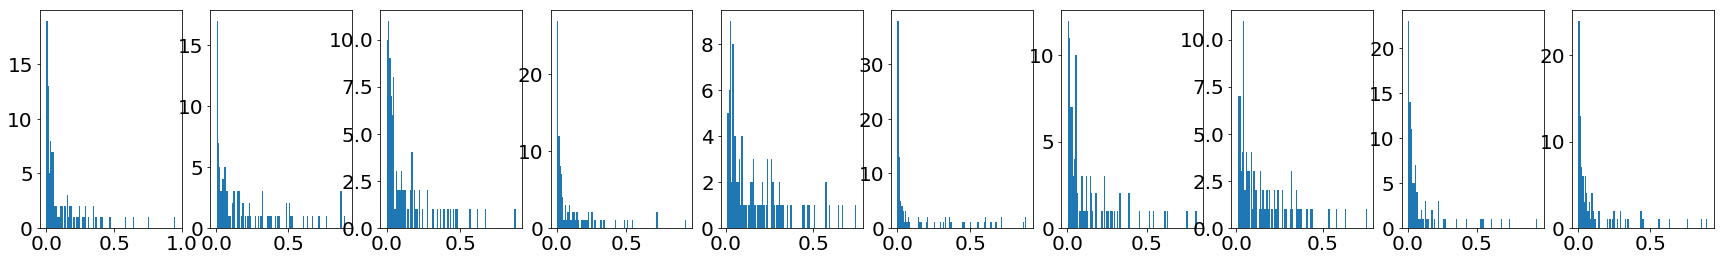

Atom images of the decoder


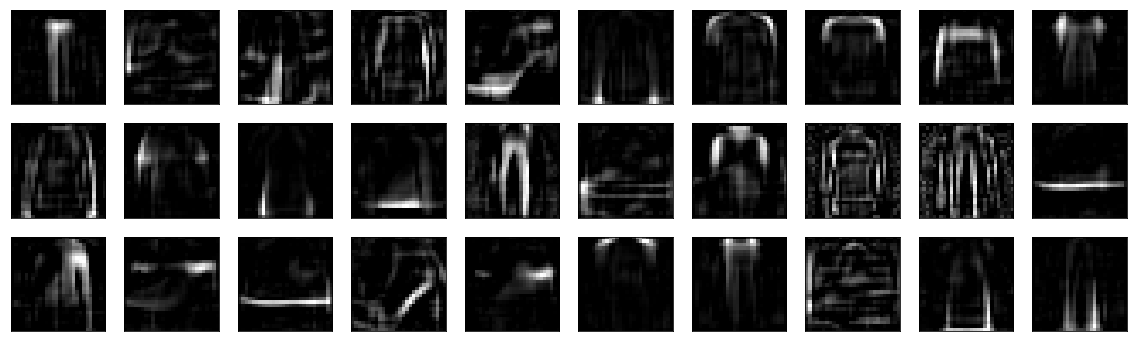

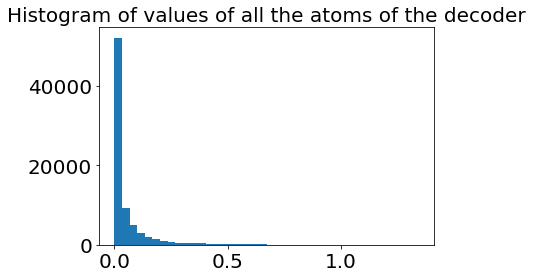

In [21]:
i = np.arange(8)[sparsity_weights==0.0001][0]
j = np.arange(4)[sparsity_objectives==0.01][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_0.0001_0.01_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


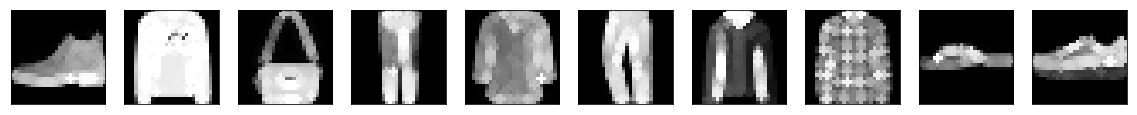

Dilatation of the reconstructions


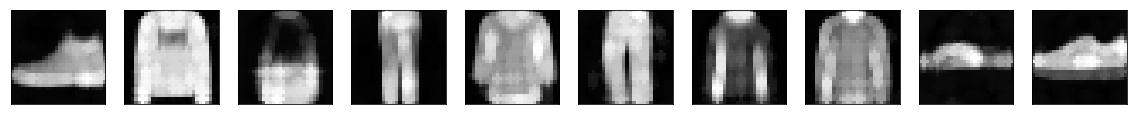

Original images and max-approximation to dilatation
Max-approx error to original:  0.5454493294715881  - Max-approx error to reconstruction:  0.5561422903060913


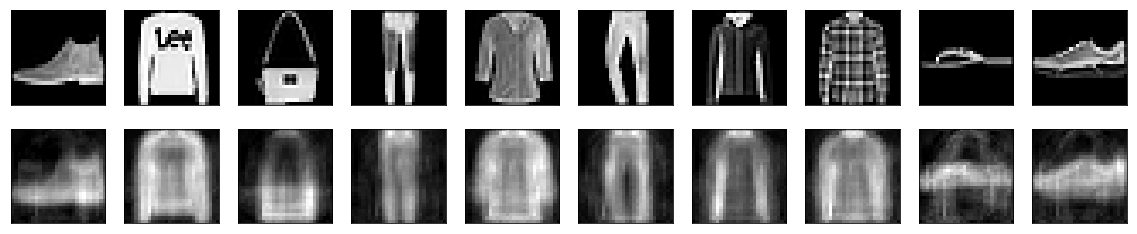

Dilated of the atom images of the decoder


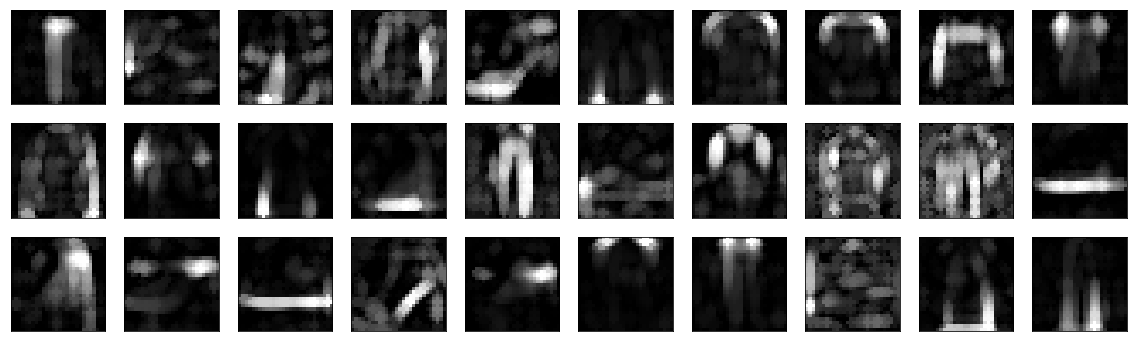

In [22]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.0005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.01345302187204361


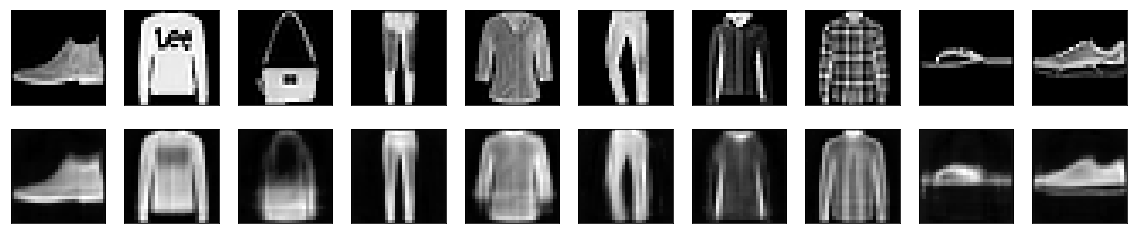

Histograms of the encodings - Sparsity (Hoyer):  0.6066833734512329


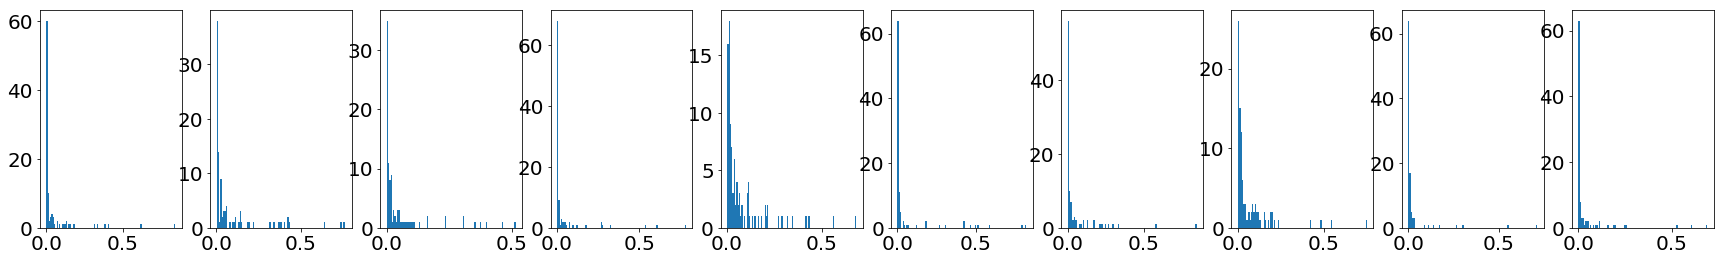

Atom images of the decoder


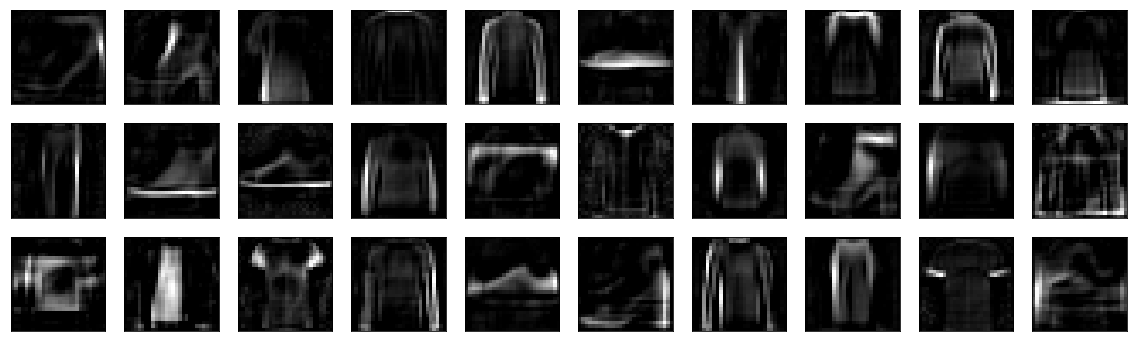

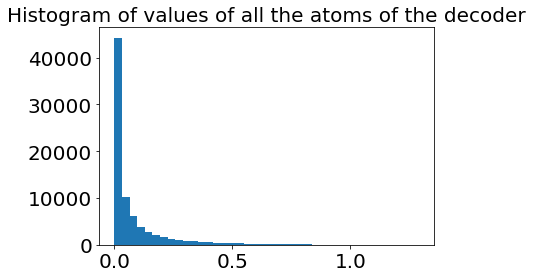

In [23]:
sp_o = 0.01
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


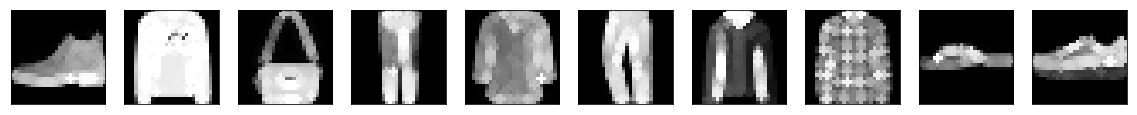

Dilatation of the reconstructions


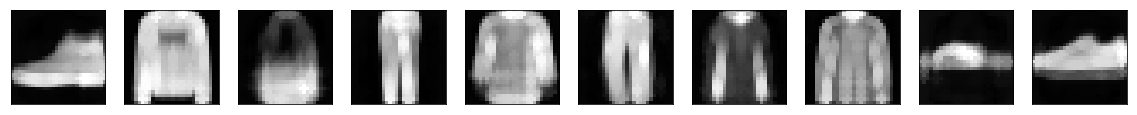

Original images and max-approximation to dilatation
Max-approx error to original:  0.14251379159688948  - Max-approx error to reconstruction:  0.15147180100679397


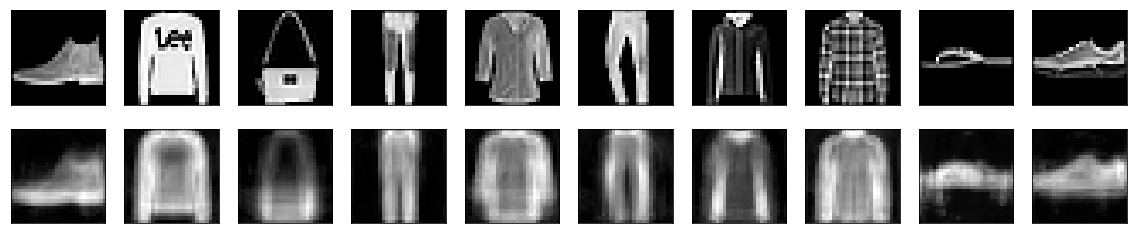

Dilated of the atom images of the decoder


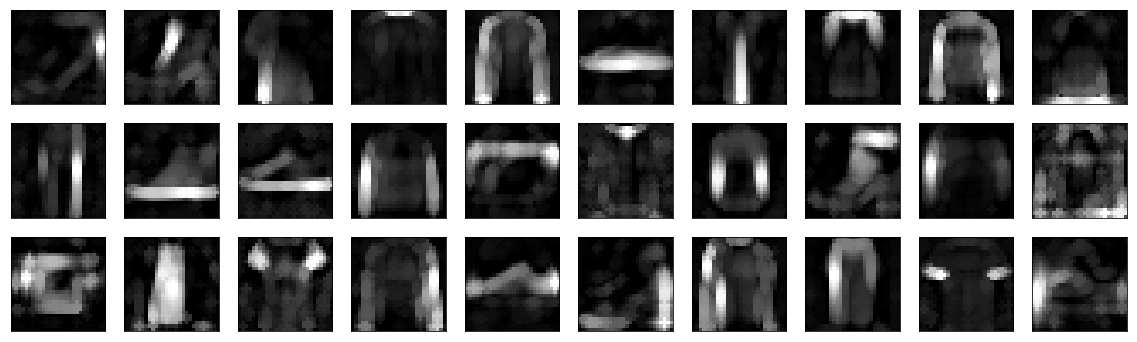

In [24]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 0.001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.015808377075195314


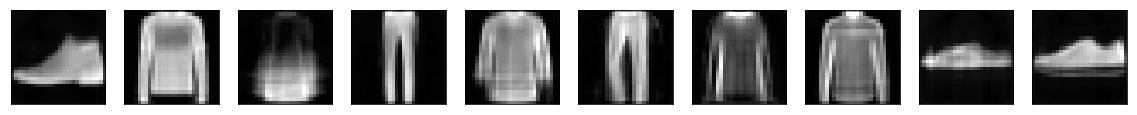

Histograms of the encodings - Sparsity (Hoyer):  0.6744042634963989


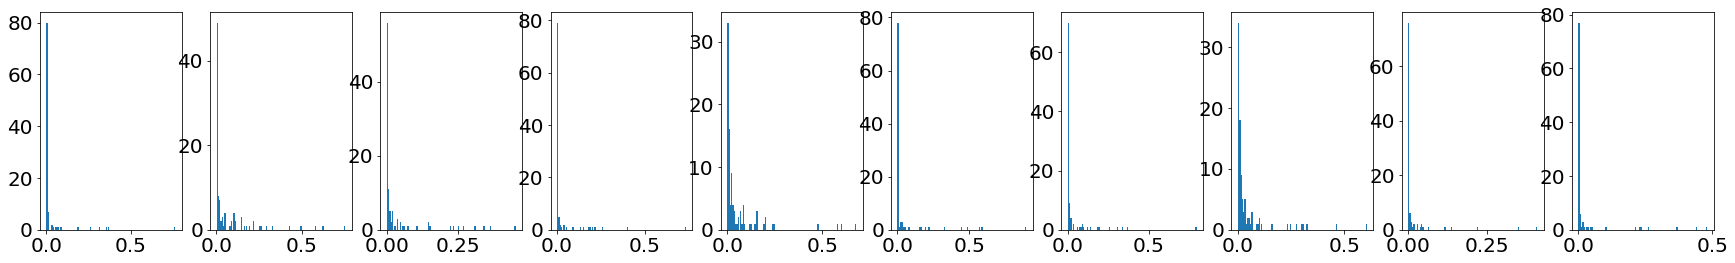

Atom images of the decoder


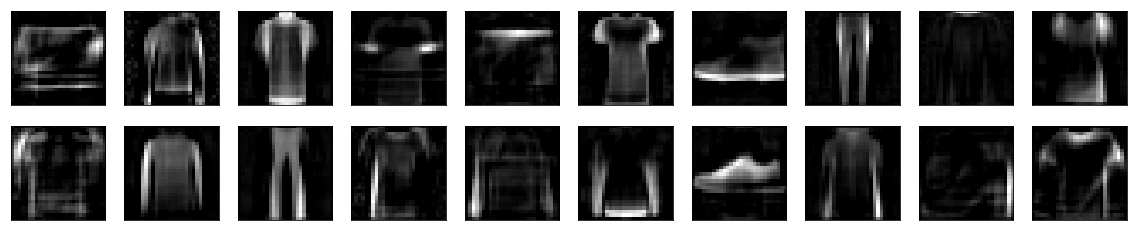

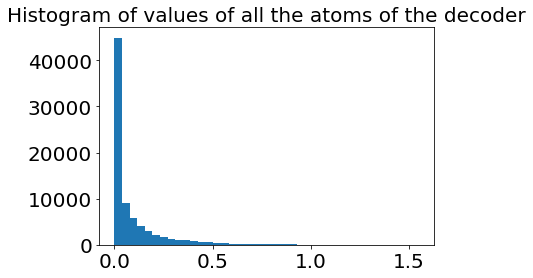

In [25]:
sp_o = 0.01
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


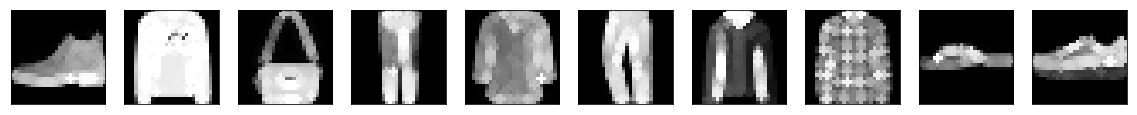

Dilatation of the reconstructions


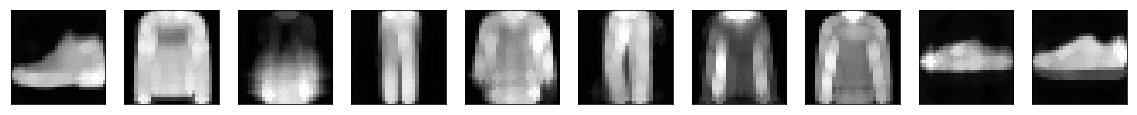

Original images and max-approximation to dilatation
Max-approx error to original:  0.10281391094923019  - Max-approx error to reconstruction:  0.09056288244724274


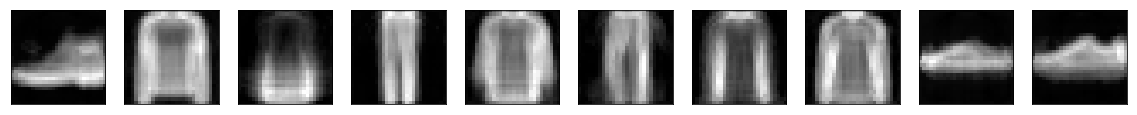

Dilated of the atom images of the decoder


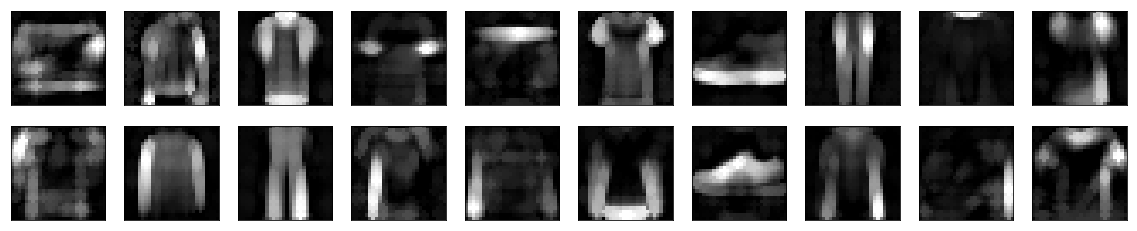

In [26]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 1.4 Sparsity_weight = 0.005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.019551291009783745


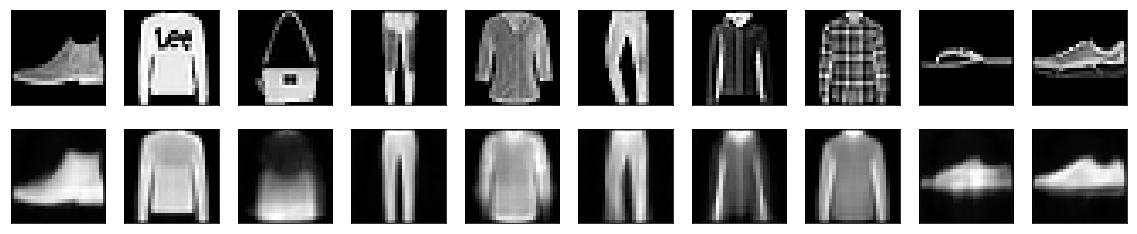

Histograms of the encodings - Sparsity (Hoyer):  0.8041884899139404


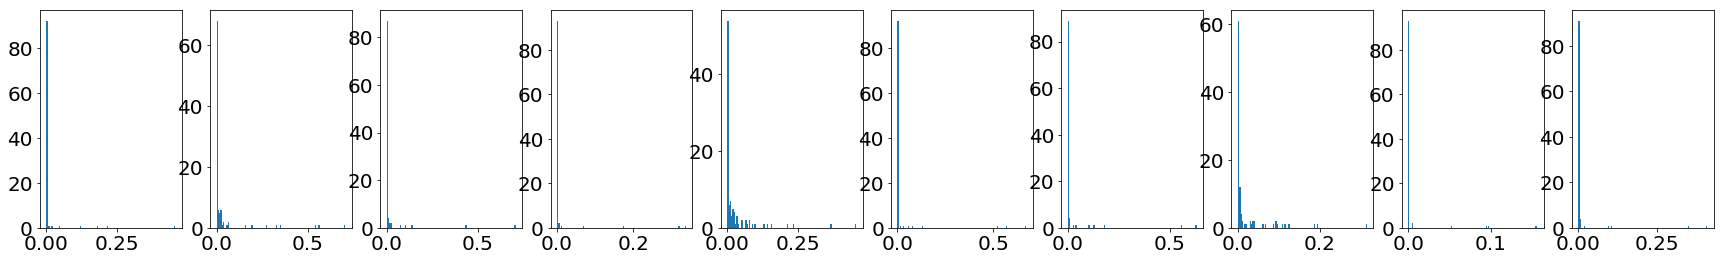

Atom images of the decoder


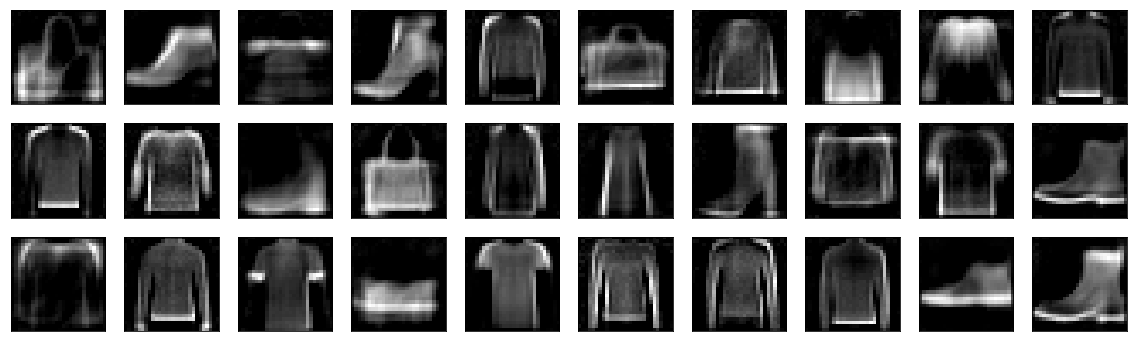

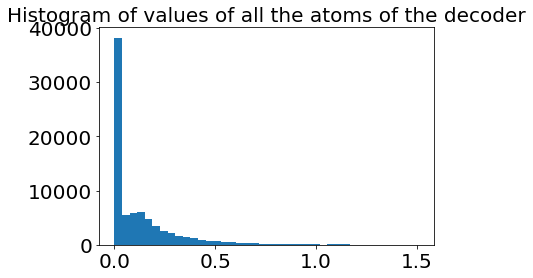

In [27]:
sp_o = 0.01
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


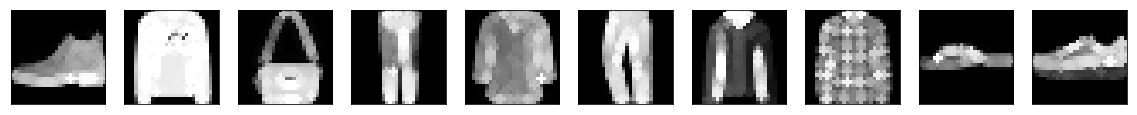

Dilatation of the reconstructions


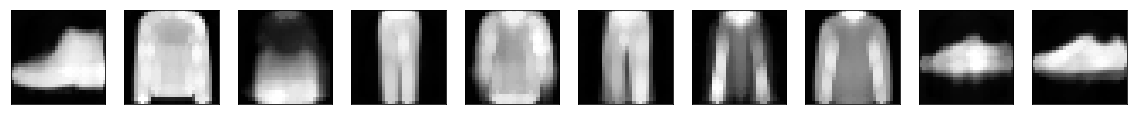

Original images and max-approximation to dilatation
Max-approx error to original:  0.03410577132105827  - Max-approx error to reconstruction:  0.021696176946163177


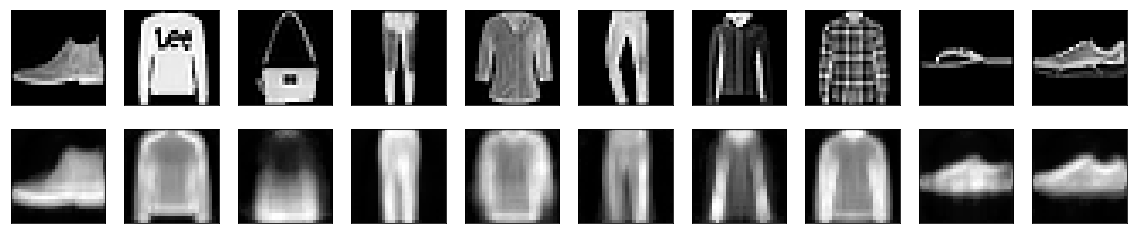

Dilated of the atom images of the decoder


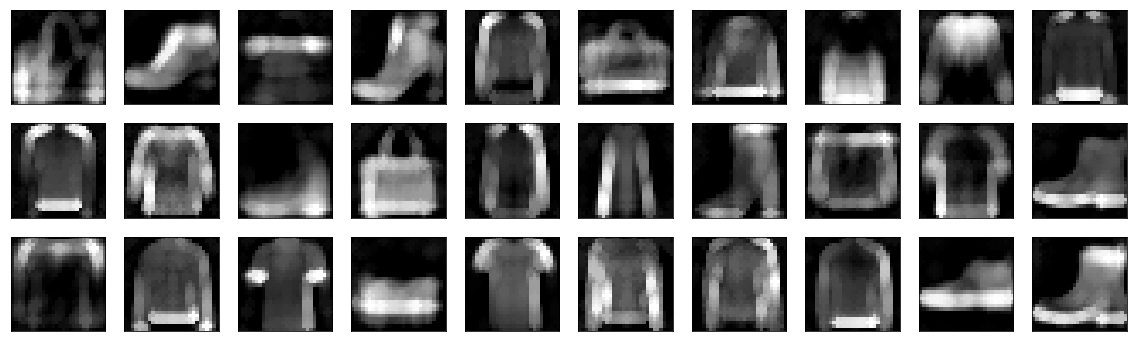

In [28]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity_weight = 0.01 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.021527533400058748


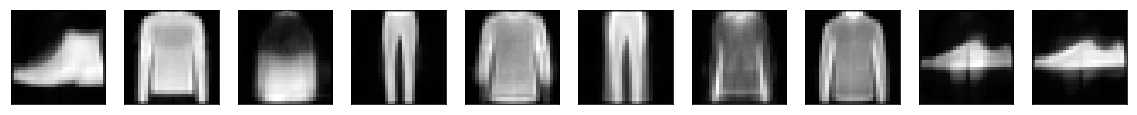

Histograms of the encodings - Sparsity (Hoyer):  0.8249801993370056


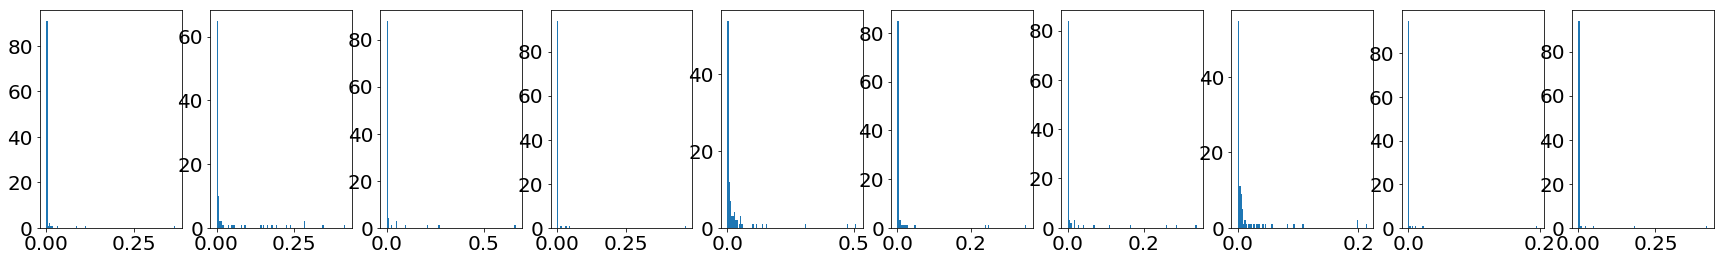

Atom images of the decoder


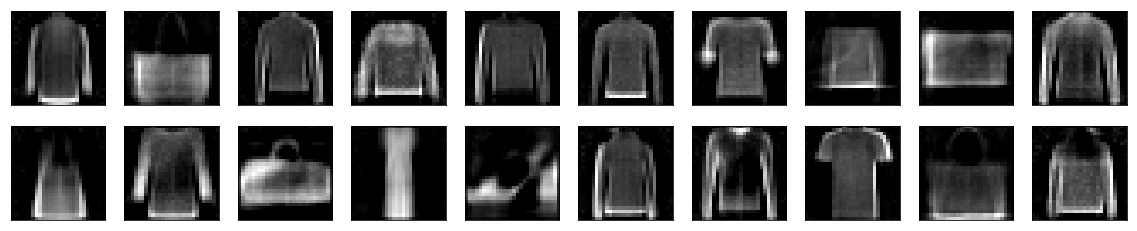

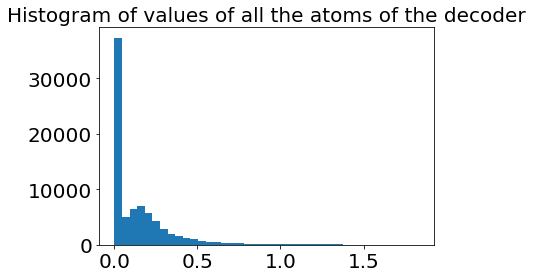

In [29]:
sp_o = 0.01
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


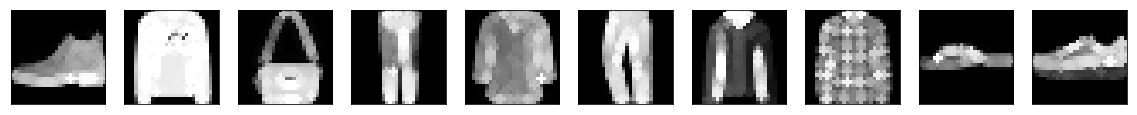

Dilatation of the reconstructions


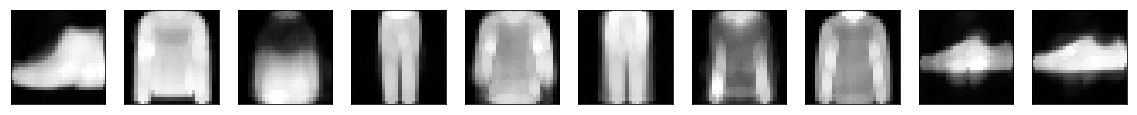

Original images and max-approximation to dilatation
Max-approx error to original:  0.03000905095934868  - Max-approx error to reconstruction:  0.015512746950984


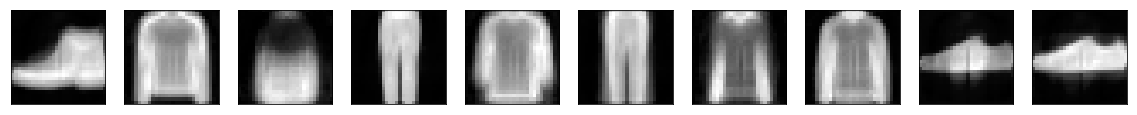

Dilated of the atom images of the decoder


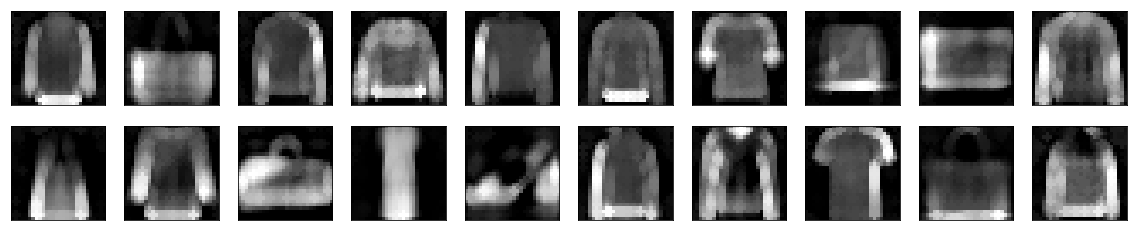

In [30]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 1.6 Sparsity_weight = 0.05 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.026095735144615172


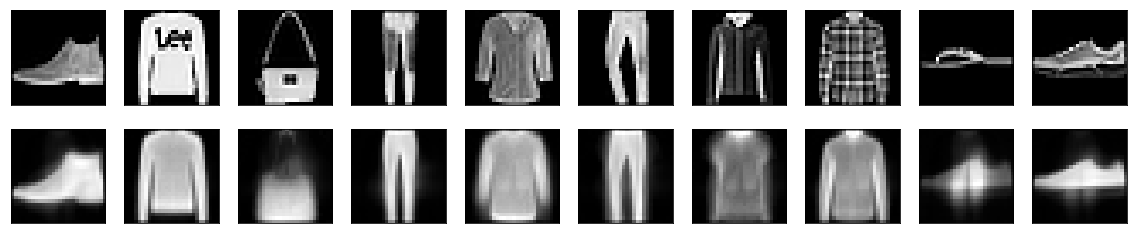

Histograms of the encodings - Sparsity (Hoyer):  0.8336343765258789


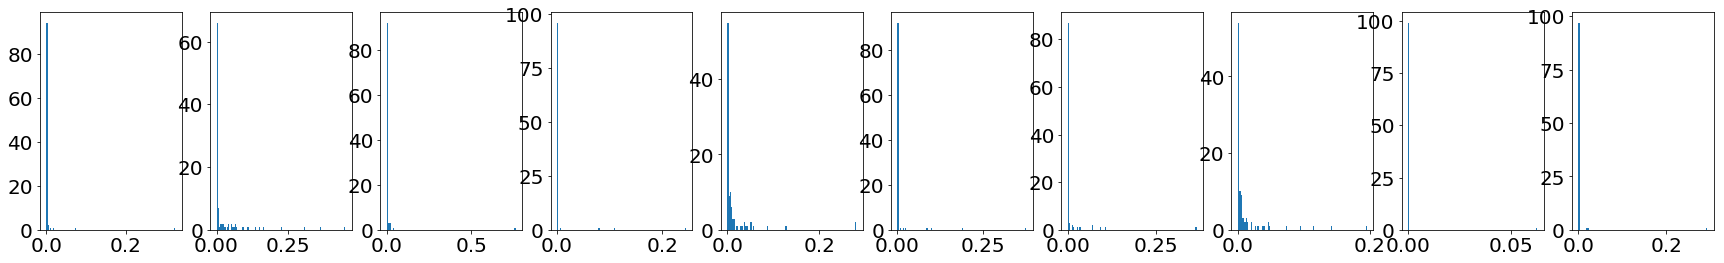

Atom images of the decoder


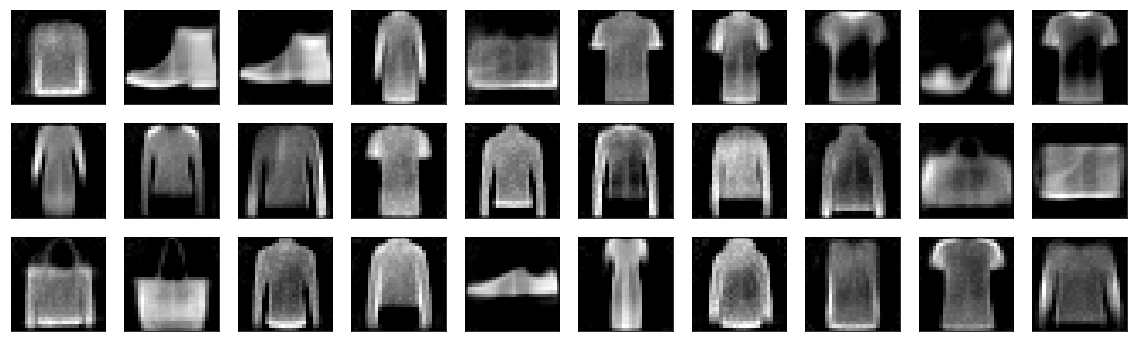

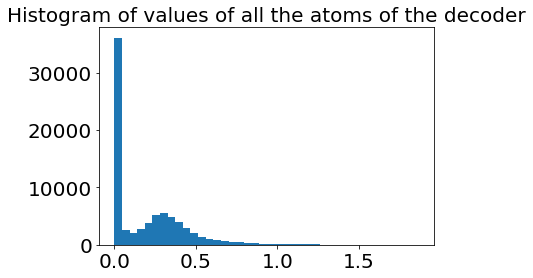

In [31]:
sp_o = 0.01
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


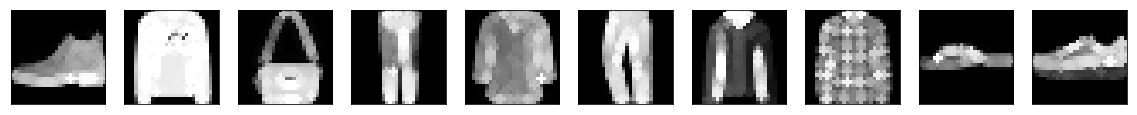

Dilatation of the reconstructions


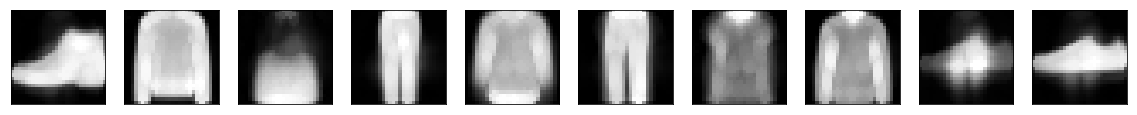

Original images and max-approximation to dilatation
Max-approx error to original:  0.030658204436302187  - Max-approx error to reconstruction:  0.010481941932439804


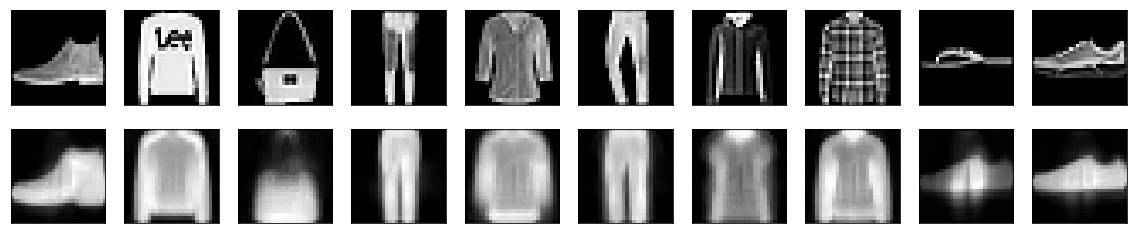

Dilated of the atom images of the decoder


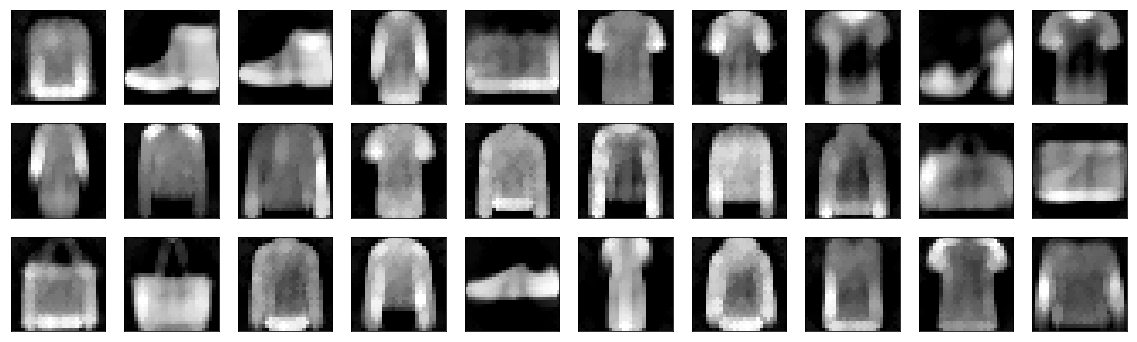

In [32]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.7 Sparsity_weight = 0.1 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.030206449234485625


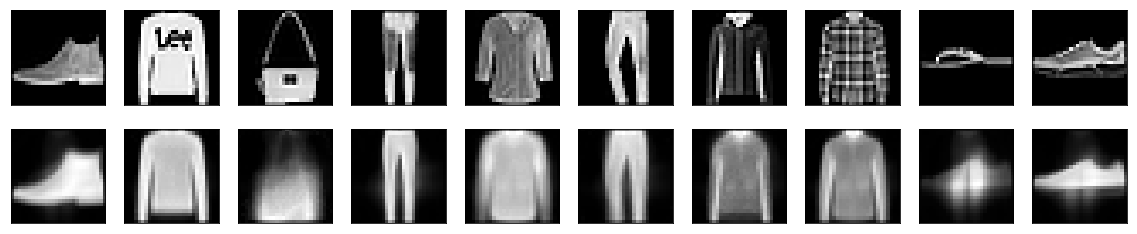

Histograms of the encodings - Sparsity (Hoyer):  0.8177312016487122


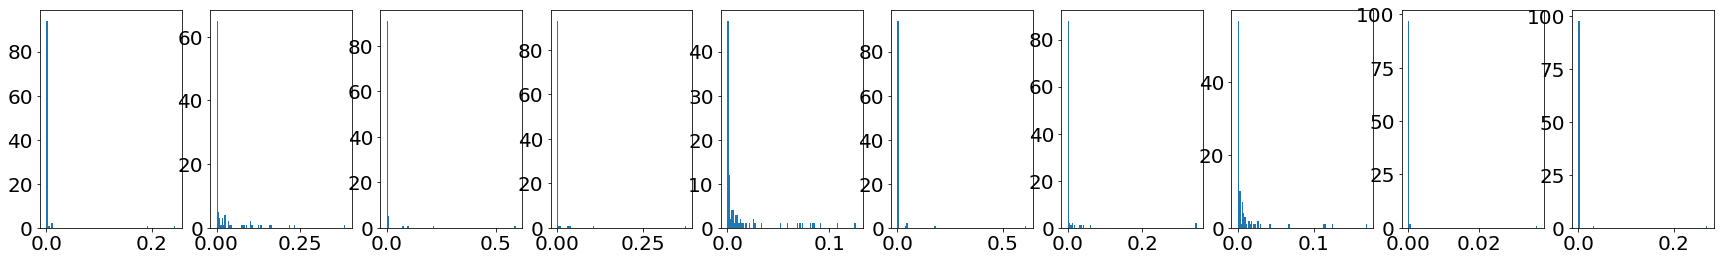

Atom images of the decoder


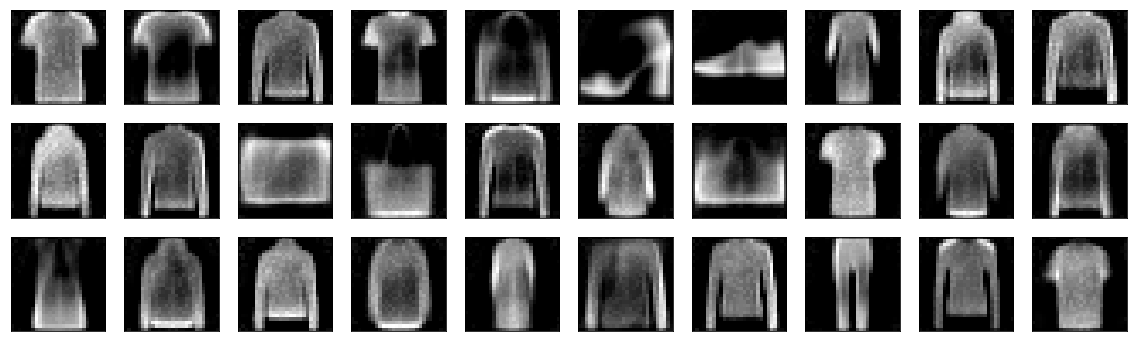

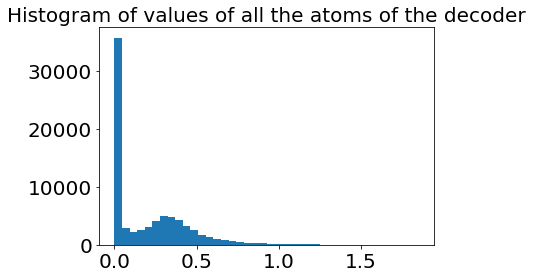

In [33]:
sp_o = 0.01
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


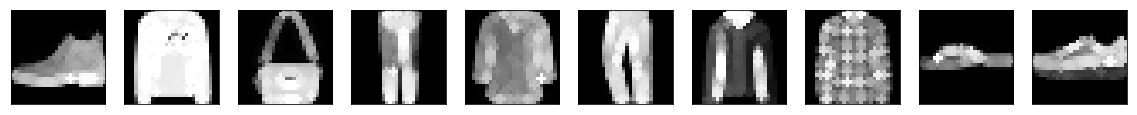

Dilatation of the reconstructions


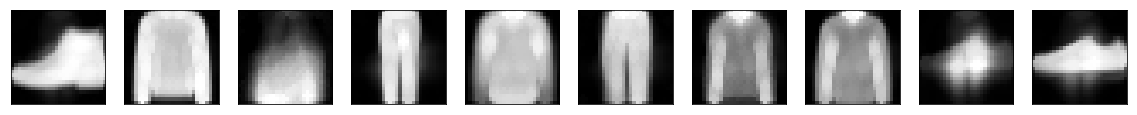

Original images and max-approximation to dilatation
Max-approx error to original:  0.033991906070709225  - Max-approx error to reconstruction:  0.012010743474960327


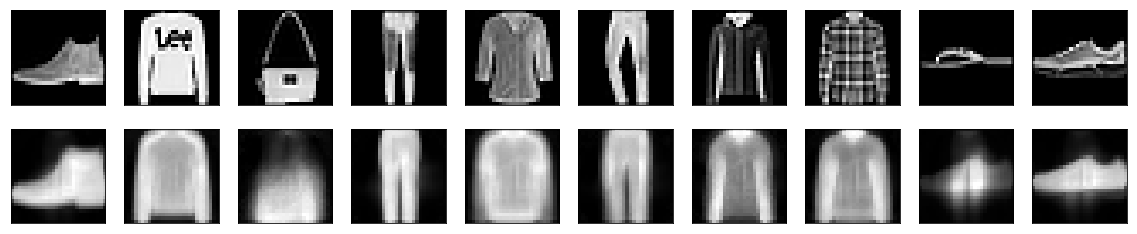

Dilated of the atom images of the decoder


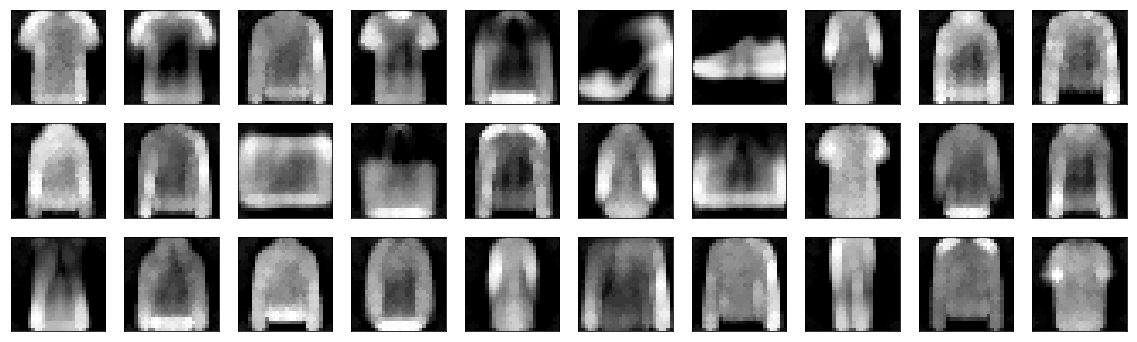

In [34]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.8 Sparsity_weight = 0.5 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.045193211030960086


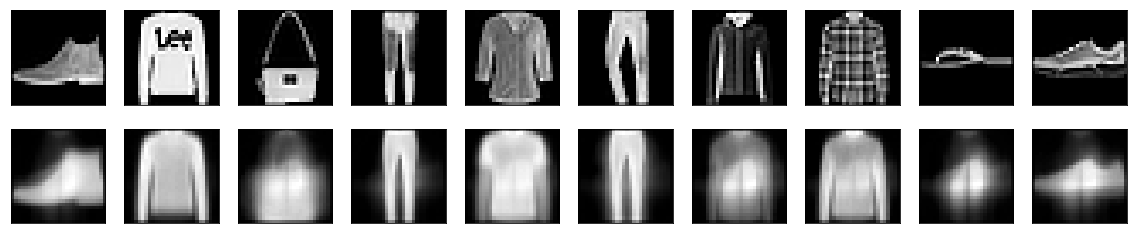

Histograms of the encodings - Sparsity (Hoyer):  0.709908127784729


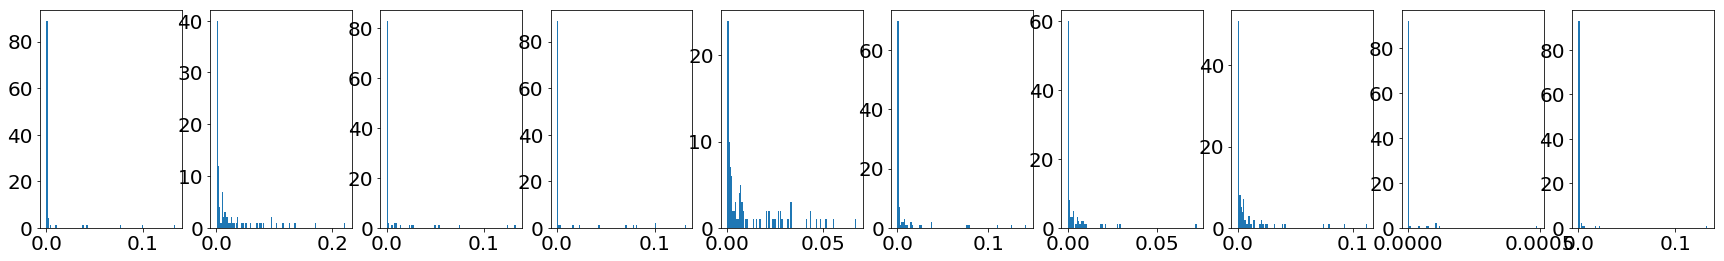

Atom images of the decoder


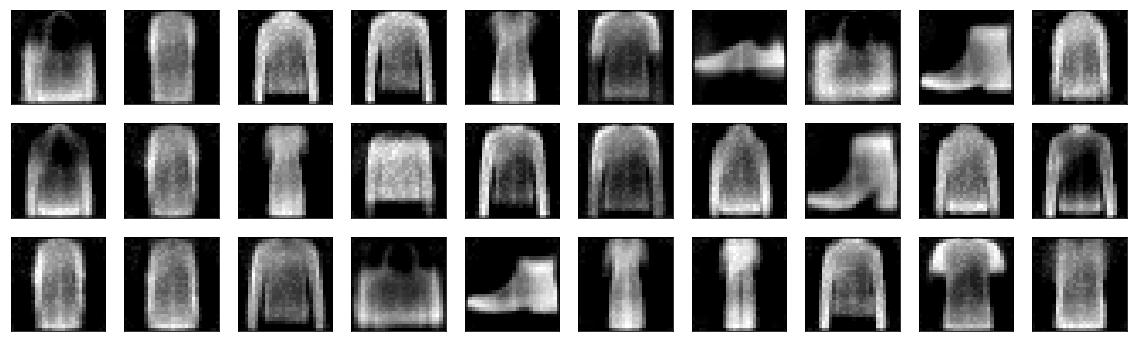

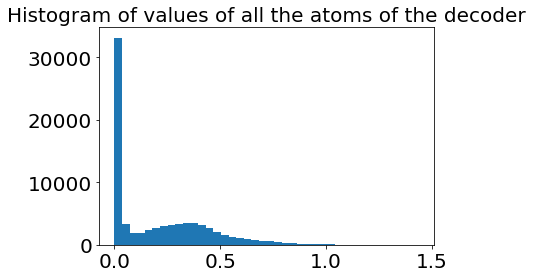

In [35]:
sp_o = 0.01
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


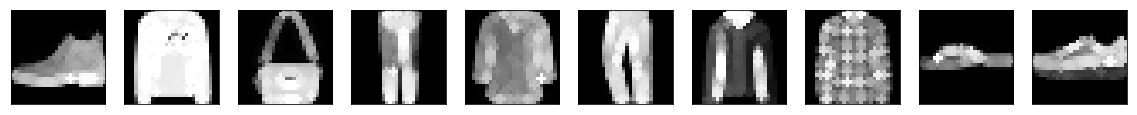

Dilatation of the reconstructions


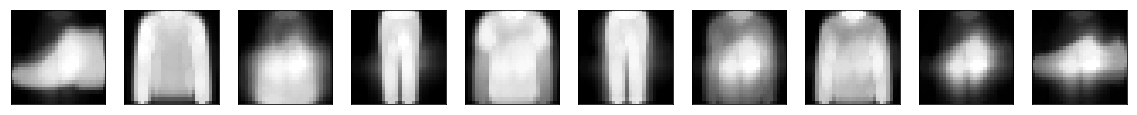

Original images and max-approximation to dilatation
Max-approx error to original:  0.051279551124572754  - Max-approx error to reconstruction:  0.019610163426399232


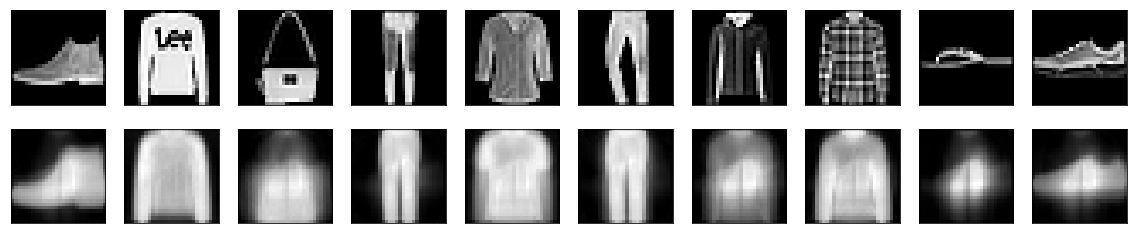

Dilated of the atom images of the decoder


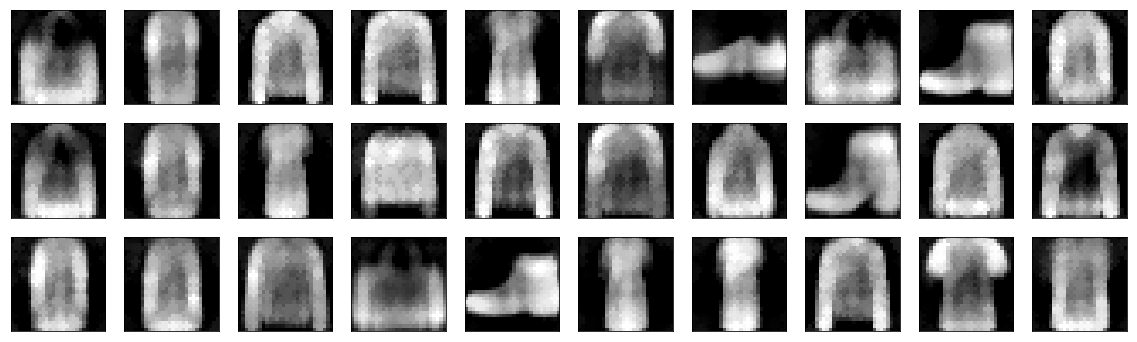

In [36]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. Sparsity_Objective = 0.05

## 2.1 Sparsity_weight = 0.0001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.009581068414449691


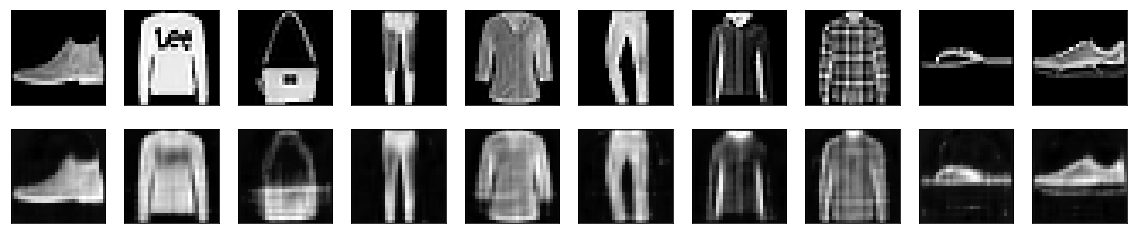

Histograms of the encodings - Sparsity (Hoyer):  0.3760818541049957


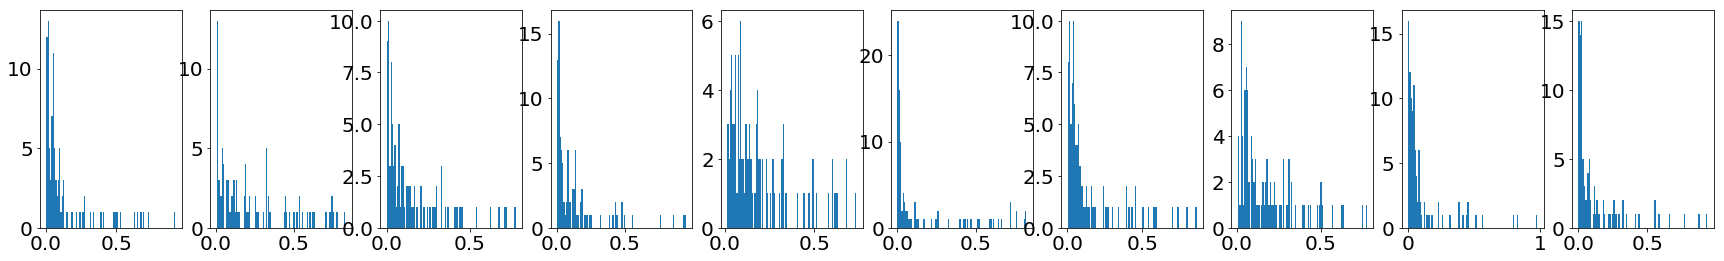

Atom images of the decoder


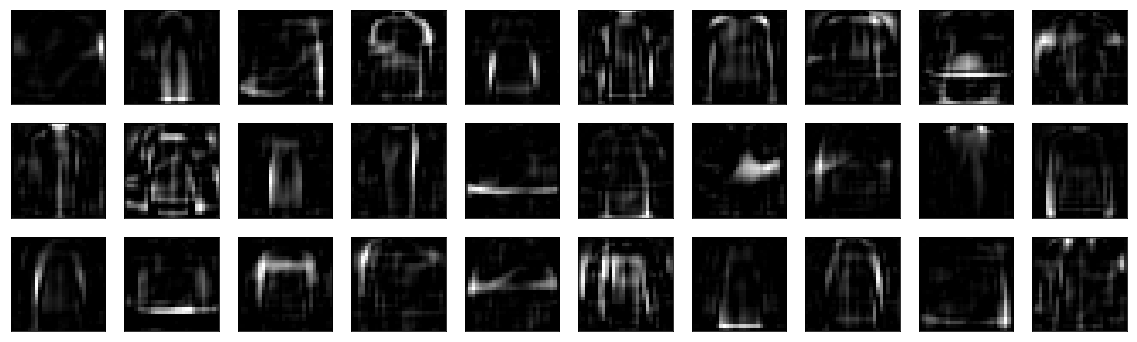

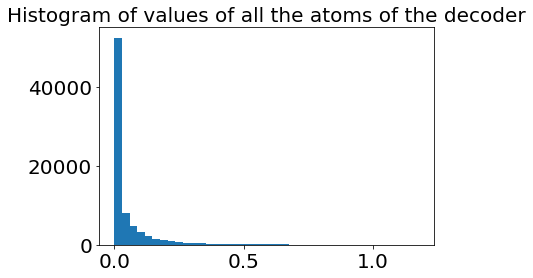

In [37]:
sp_o = 0.05
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


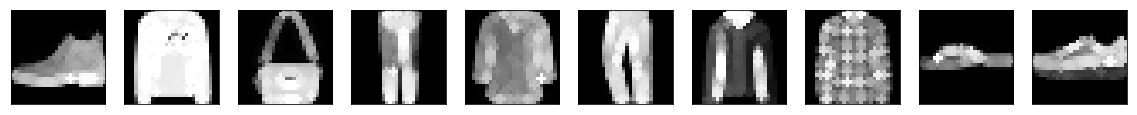

Dilatation of the reconstructions


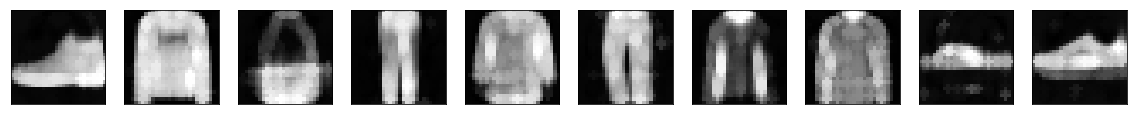

Original images and max-approximation to dilatation
Max-approx error to original:  0.6925505426883698  - Max-approx error to reconstruction:  0.7021494463920593


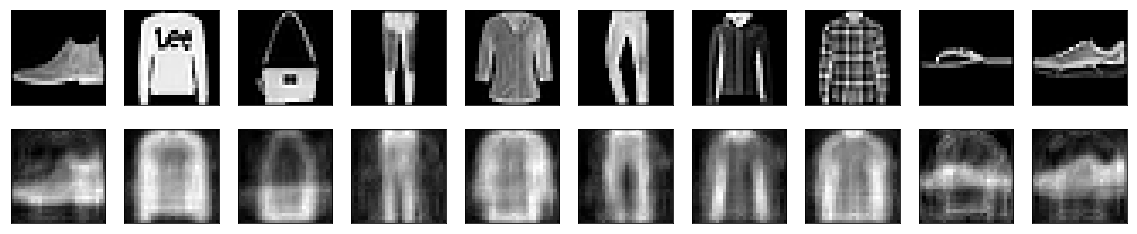

Dilated of the atom images of the decoder


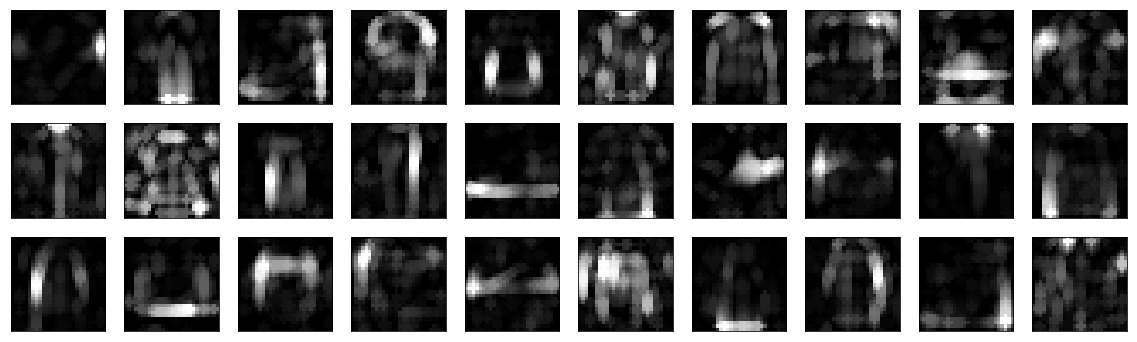

In [38]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.2 Sparsity_weight = 0.0005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.010935590252280235


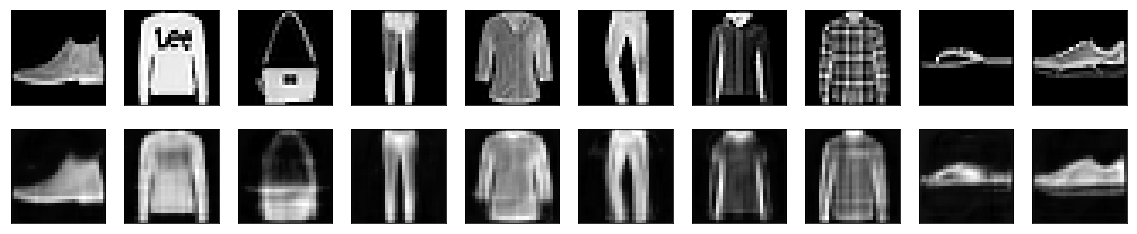

Histograms of the encodings - Sparsity (Hoyer):  0.517234206199646


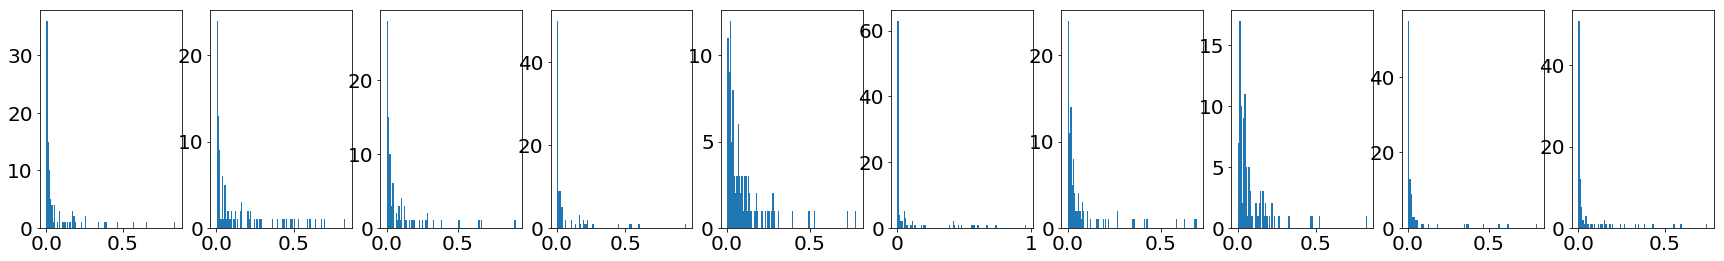

Atom images of the decoder


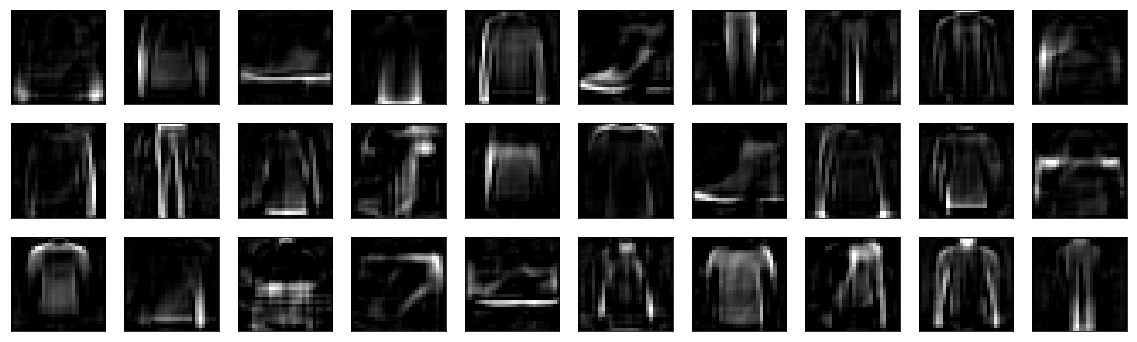

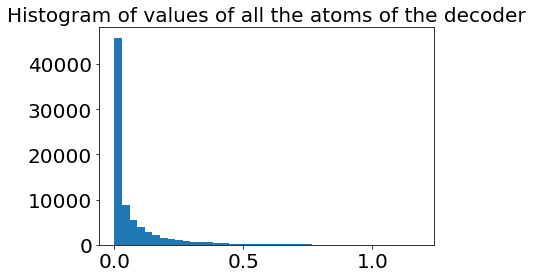

In [39]:
sp_o = 0.05
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


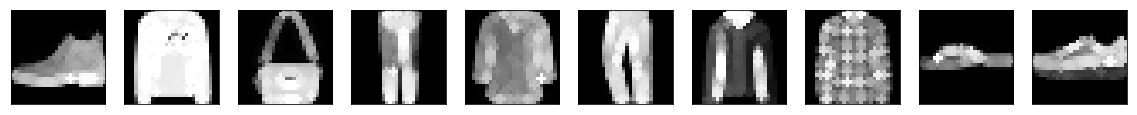

Dilatation of the reconstructions


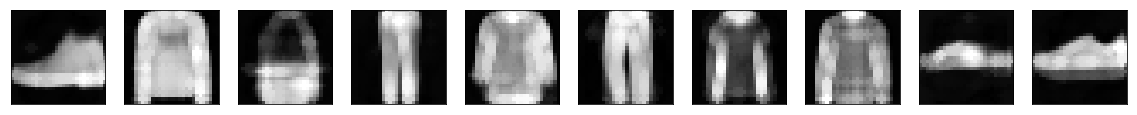

Original images and max-approximation to dilatation
Max-approx error to original:  0.261463650560379  - Max-approx error to reconstruction:  0.26476105184555054


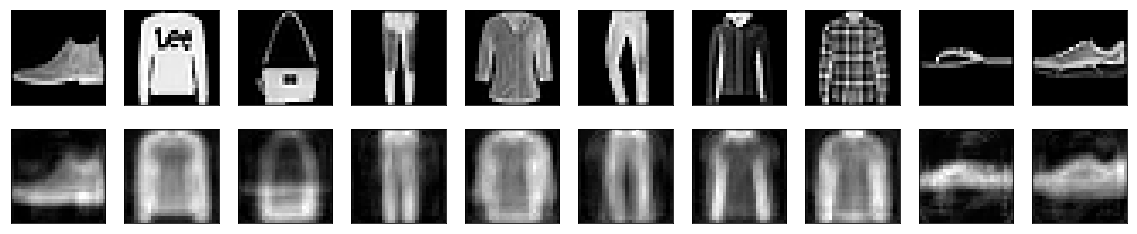

Dilated of the atom images of the decoder


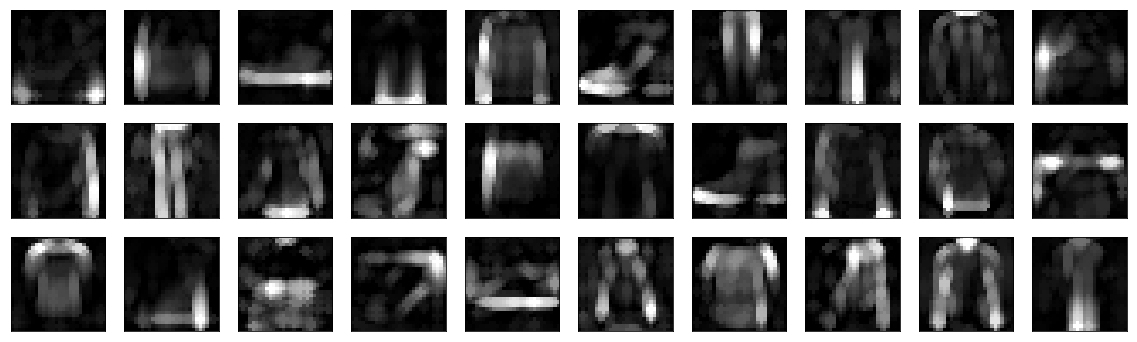

In [40]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.3 Sparsity_weight = 0.001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.011451210412383079


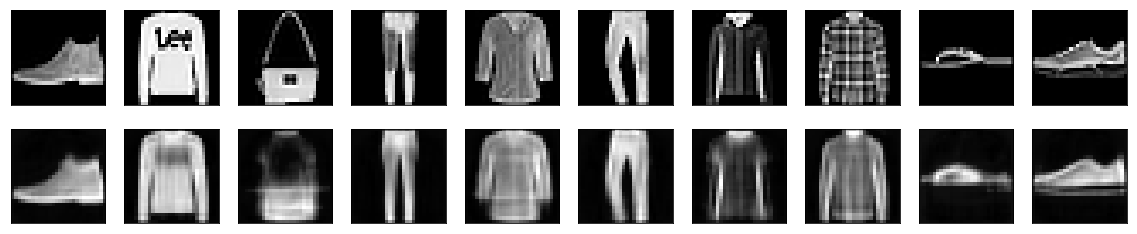

Histograms of the encodings - Sparsity (Hoyer):  0.568609356880188


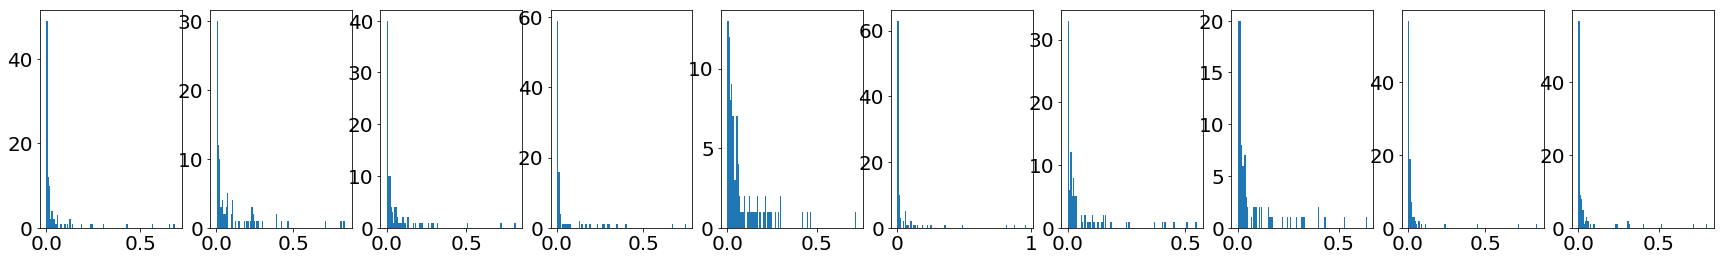

Atom images of the decoder


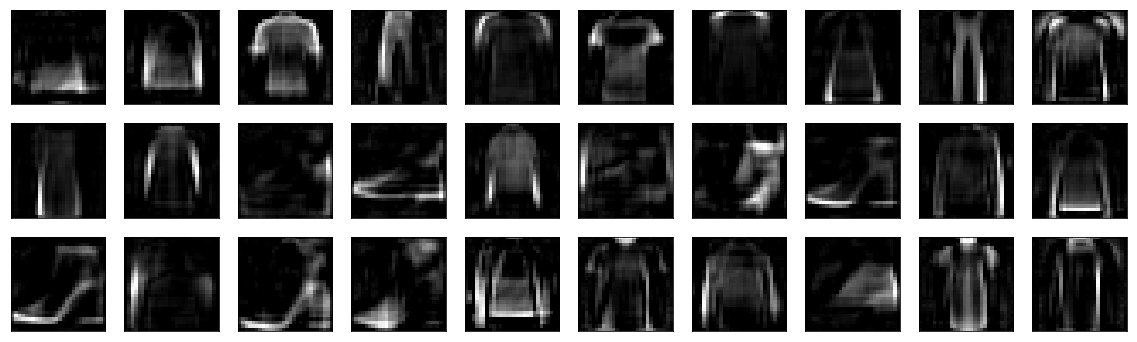

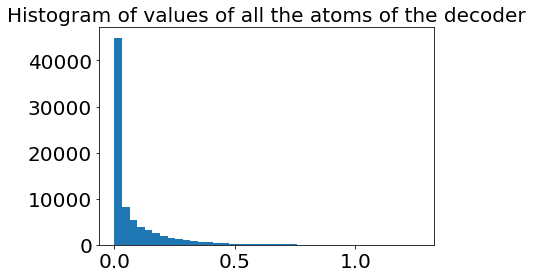

In [41]:
sp_o = 0.05
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


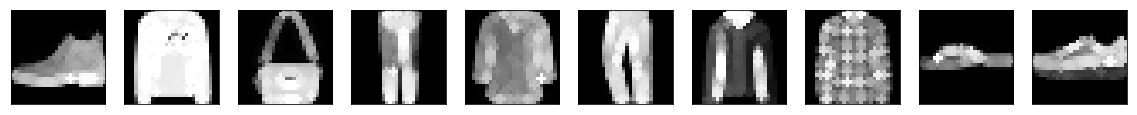

Dilatation of the reconstructions


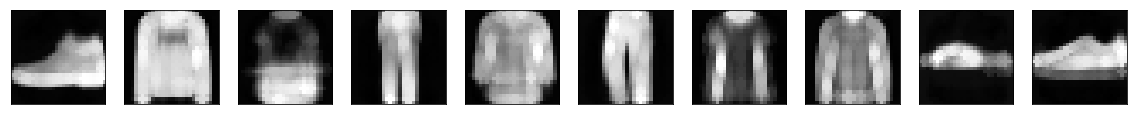

Original images and max-approximation to dilatation
Max-approx error to original:  0.16665306570529936  - Max-approx error to reconstruction:  0.1715149593114853


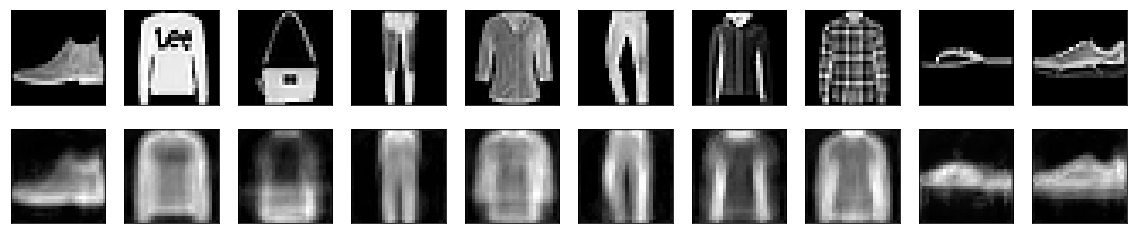

Dilated of the atom images of the decoder


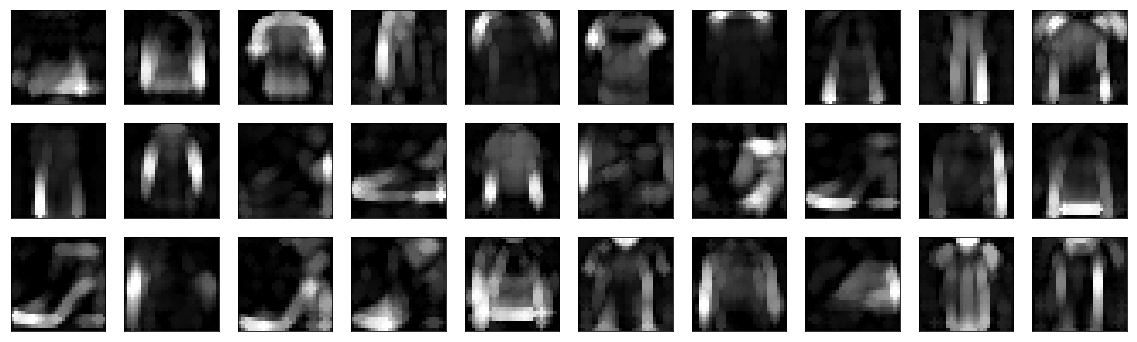

In [42]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.4 Sparsity_weight = 0.005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.012646495047211647


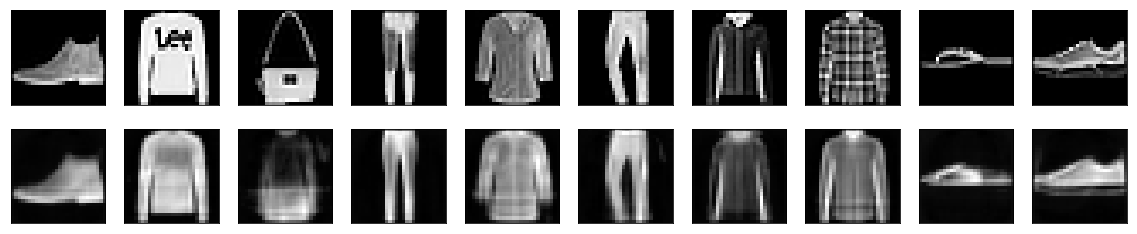

Histograms of the encodings - Sparsity (Hoyer):  0.6171541213989258


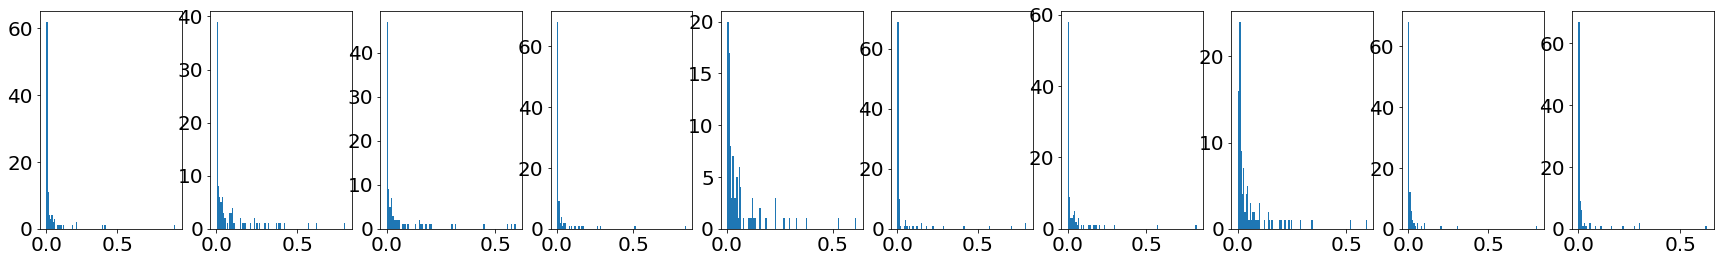

Atom images of the decoder


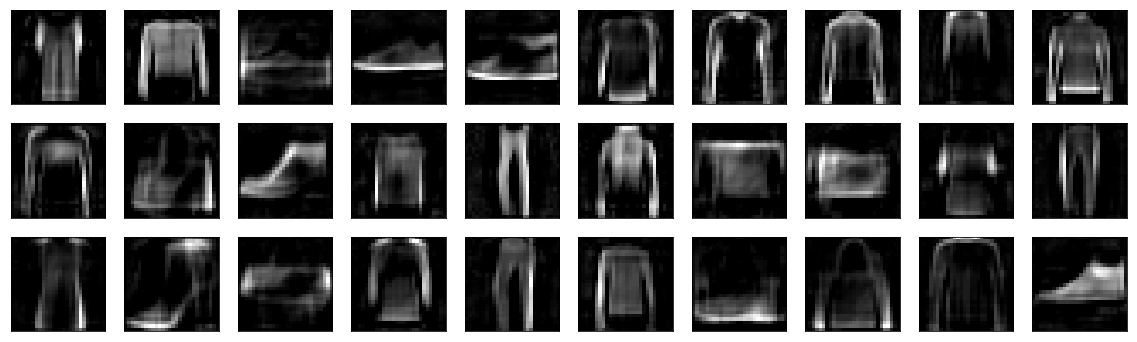

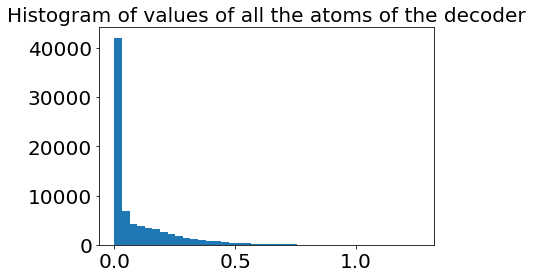

In [43]:
sp_o = 0.05
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


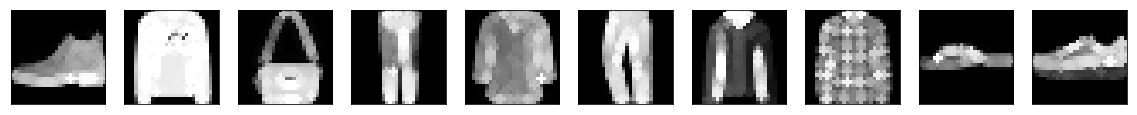

Dilatation of the reconstructions


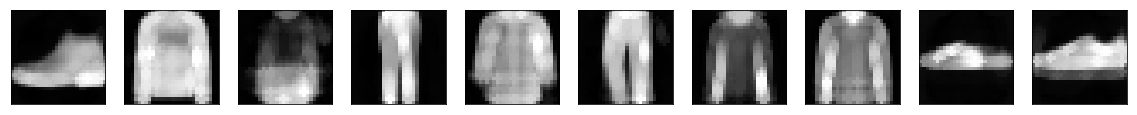

Original images and max-approximation to dilatation
Max-approx error to original:  0.11342132292985917  - Max-approx error to reconstruction:  0.11188994407653809


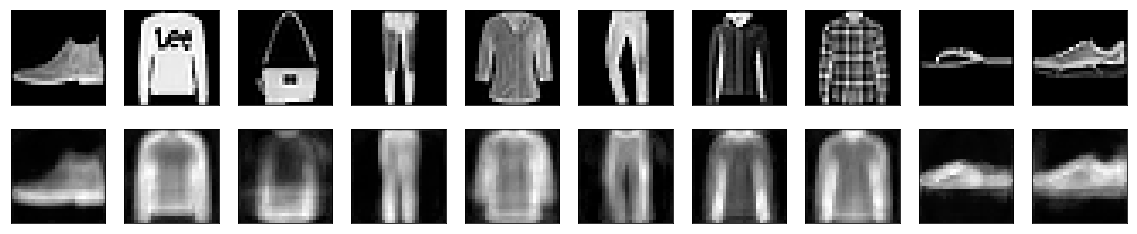

Dilated of the atom images of the decoder


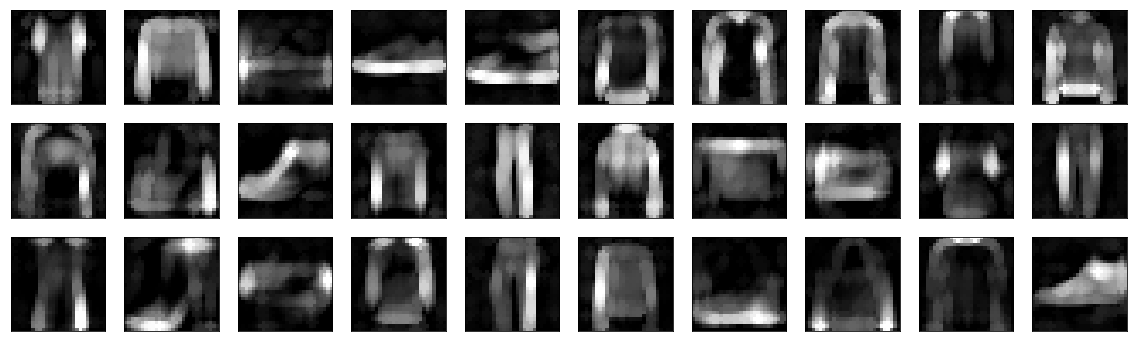

In [44]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.5 Sparsity_weight = 0.01 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.013111909747123719


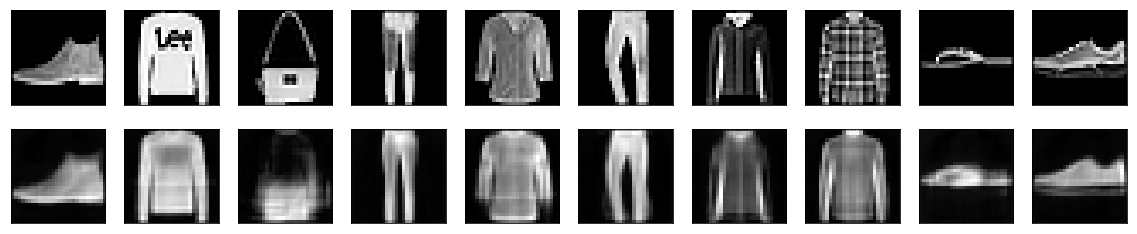

Histograms of the encodings - Sparsity (Hoyer):  0.6122449040412903


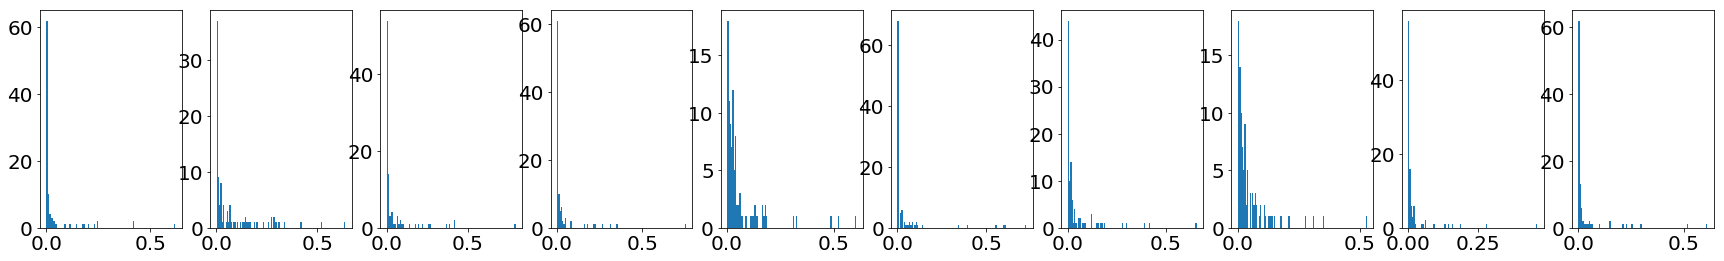

Atom images of the decoder


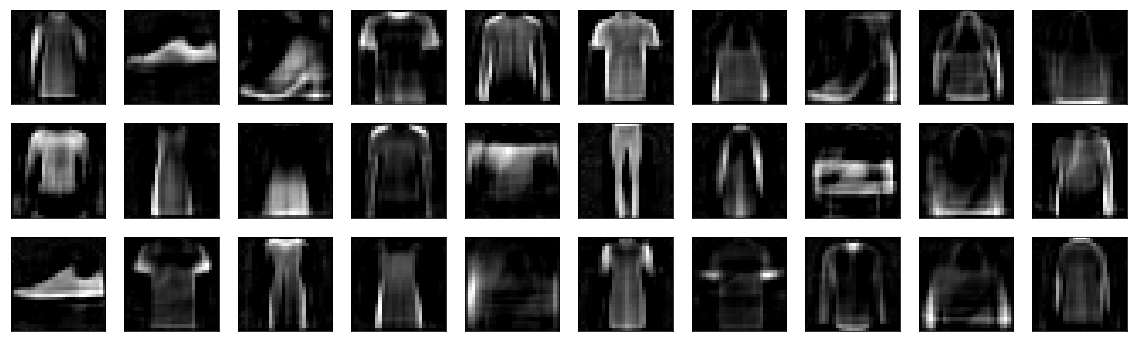

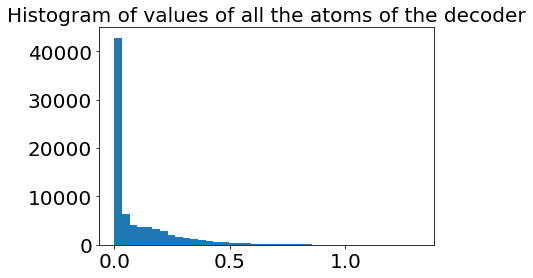

In [45]:
sp_o = 0.05
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


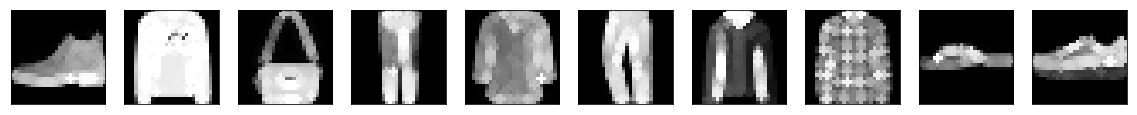

Dilatation of the reconstructions


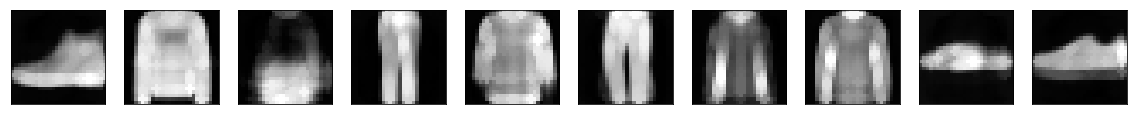

Original images and max-approximation to dilatation
Max-approx error to original:  0.09980812010765076  - Max-approx error to reconstruction:  0.10343104280233383


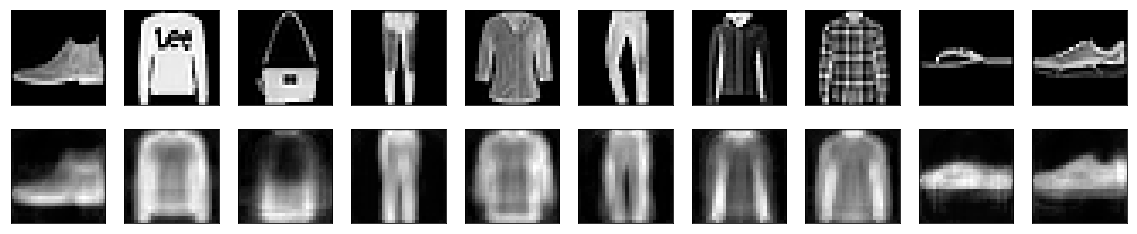

Dilated of the atom images of the decoder


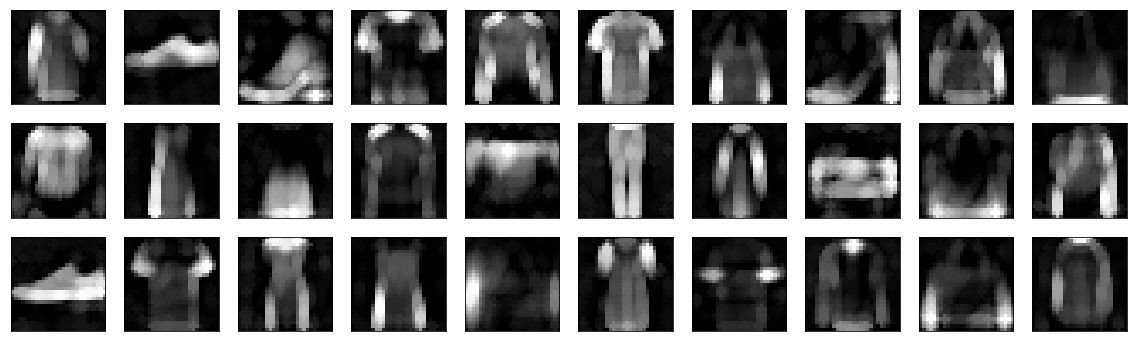

In [46]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.6 Sparsity_weight = 0.05 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.017435663080215453


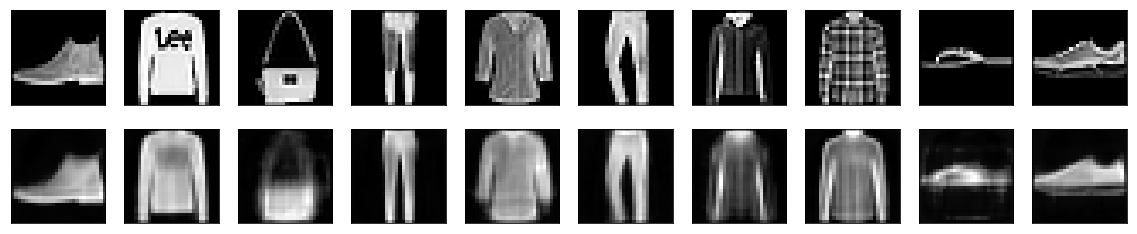

Histograms of the encodings - Sparsity (Hoyer):  0.6042820811271667


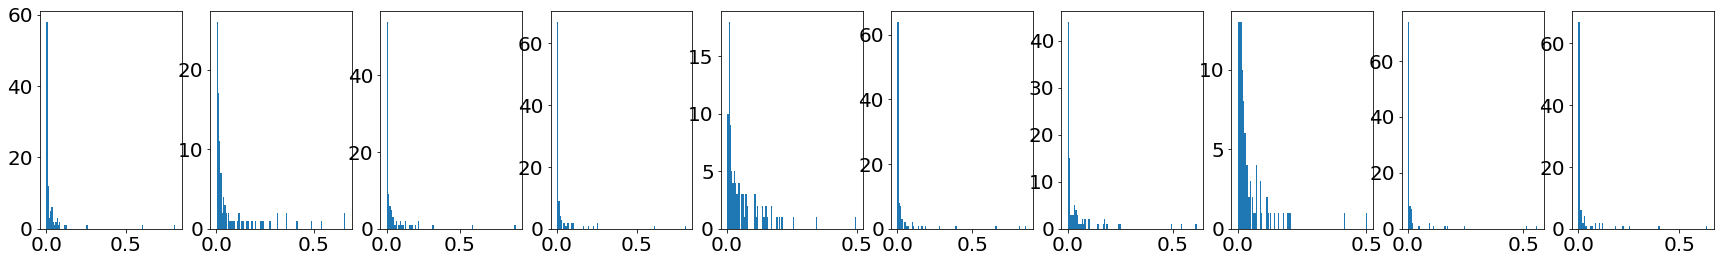

Atom images of the decoder


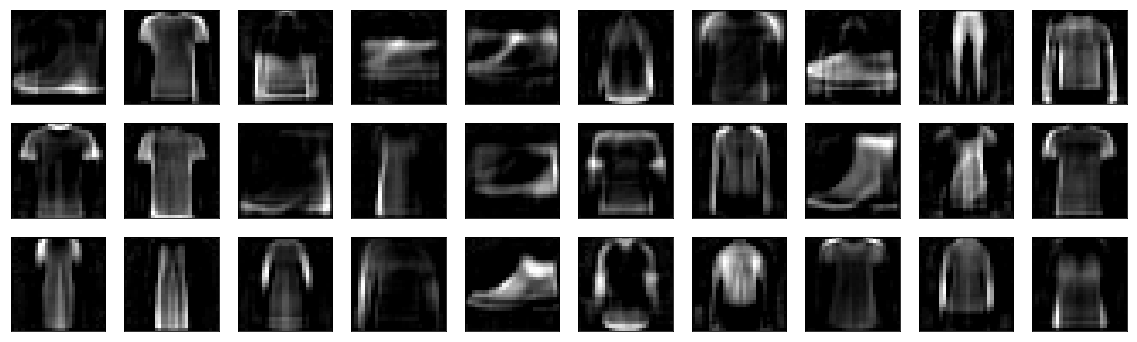

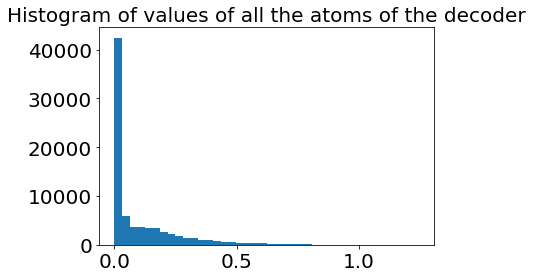

In [47]:
sp_o = 0.05
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


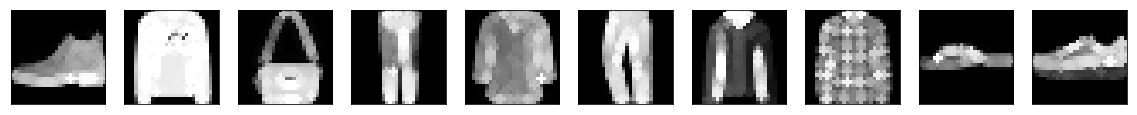

Dilatation of the reconstructions


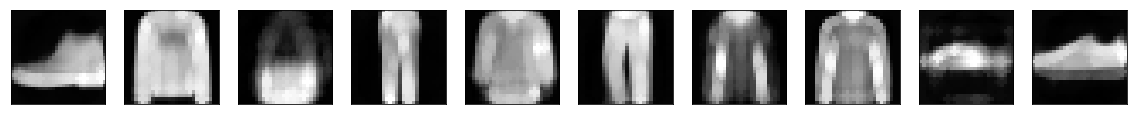

Original images and max-approximation to dilatation
Max-approx error to original:  0.11455645446777343  - Max-approx error to reconstruction:  0.10494978728294373


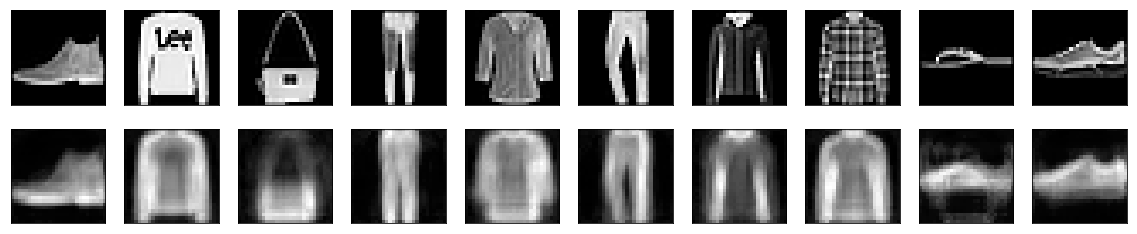

Dilated of the atom images of the decoder


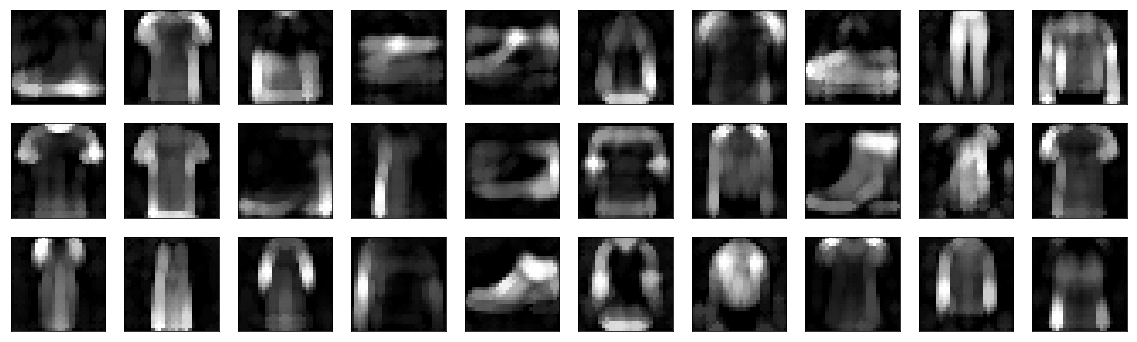

In [48]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.7 Sparsity_weight = 0.1 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.02124640508890152


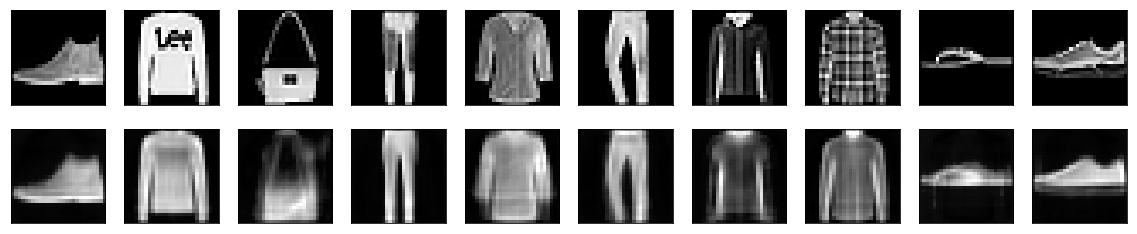

Histograms of the encodings - Sparsity (Hoyer):  0.5927184224128723


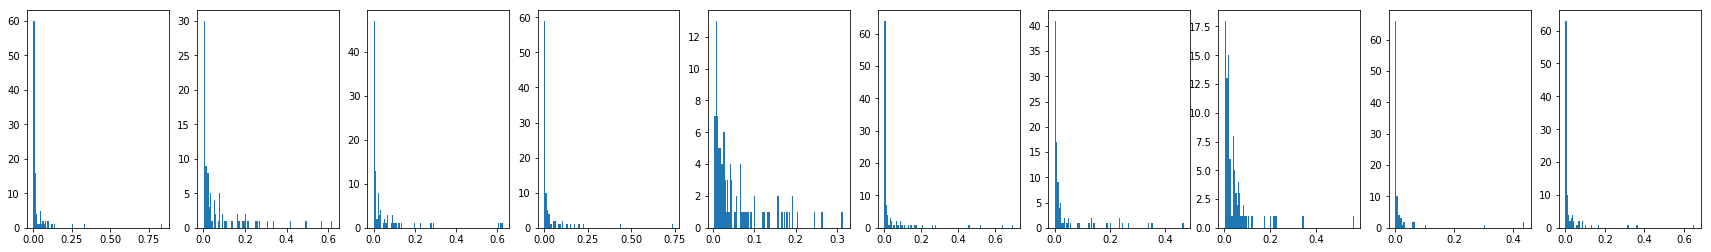

Atom images of the decoder


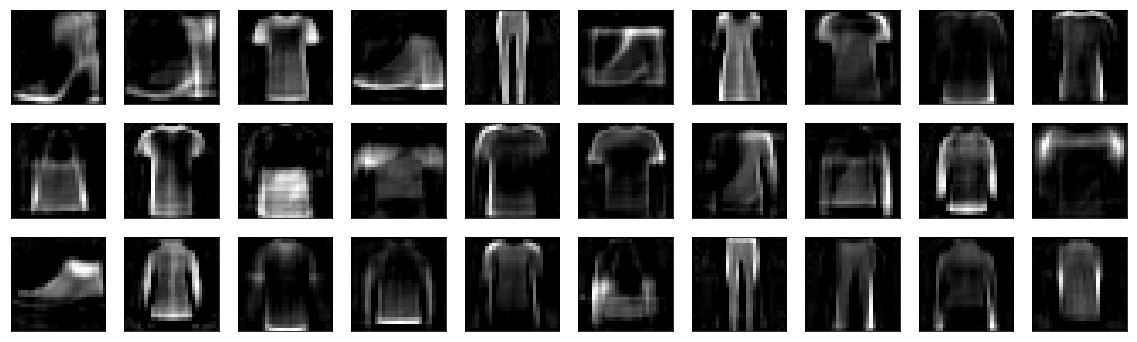

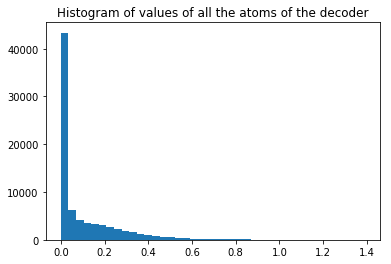

In [10]:
sp_o = 0.05
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


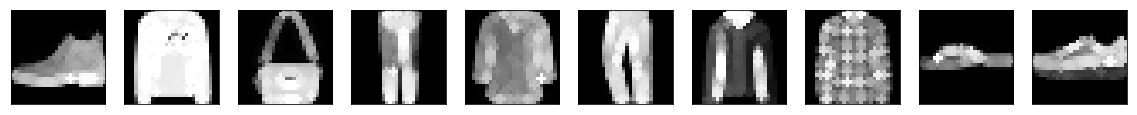

Dilatation of the reconstructions


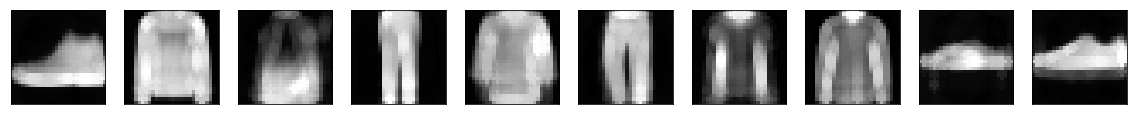

Original images and max-approximation to dilatation
Max-approx error to original:  0.10630555825233459  - Max-approx error to reconstruction:  0.10402412033081054


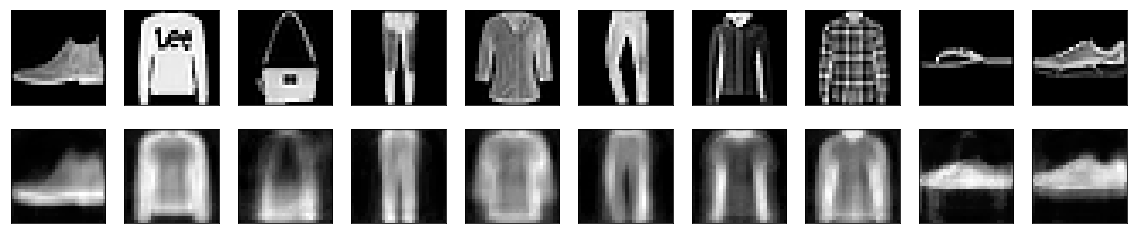

Dilated of the atom images of the decoder


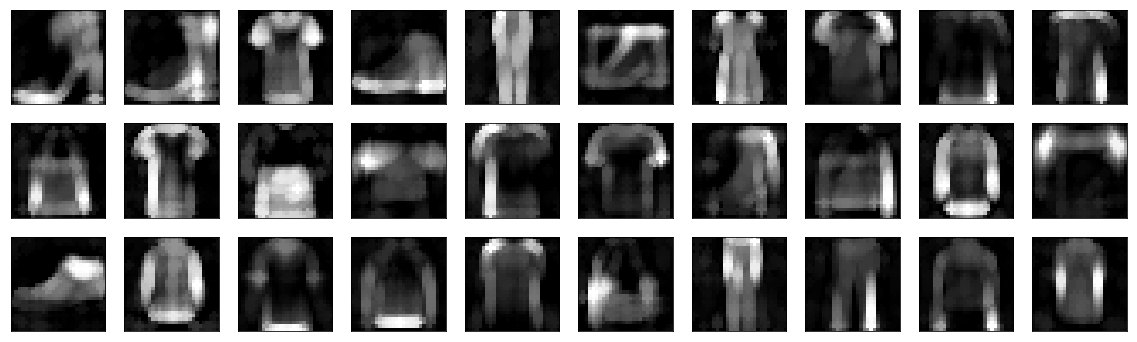

In [11]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.8 Sparsity_weight = 0.5 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.04187948114871979


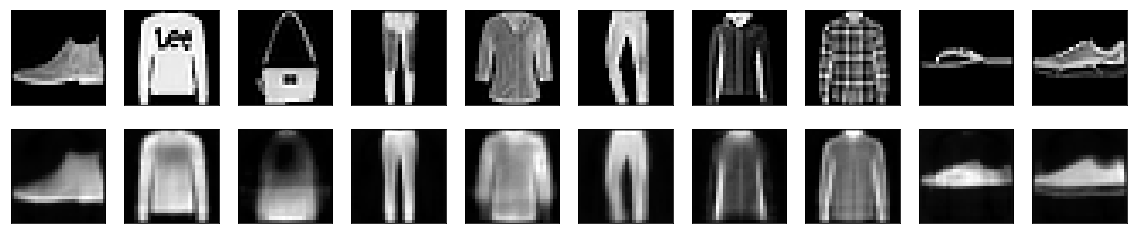

Histograms of the encodings - Sparsity (Hoyer):  0.49430570006370544


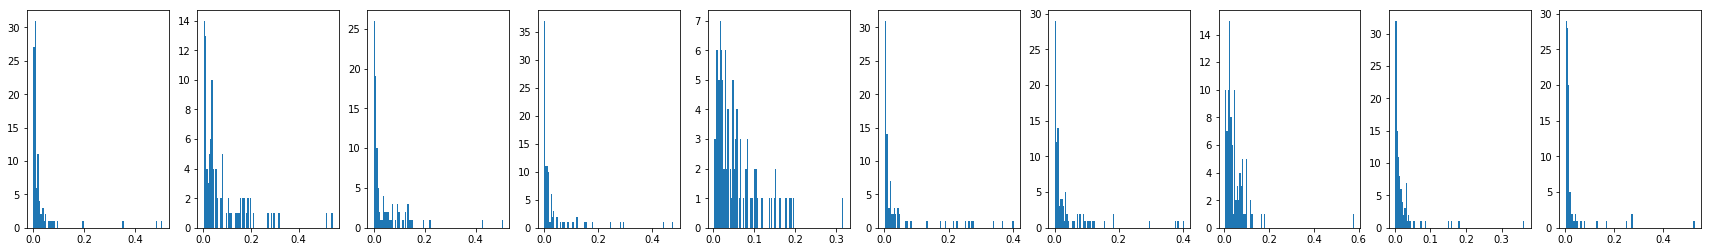

Atom images of the decoder


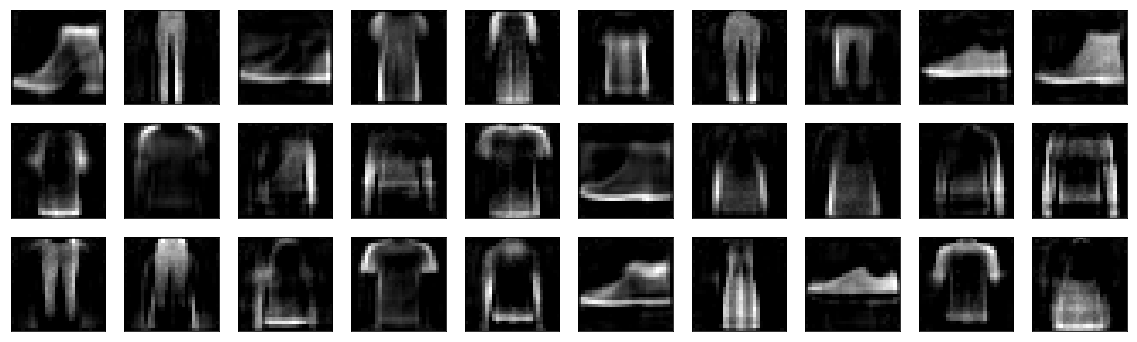

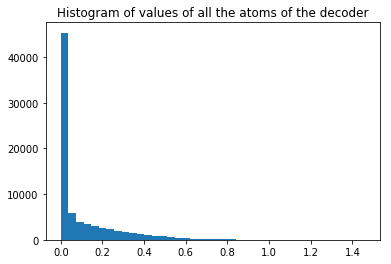

In [12]:
sp_o = 0.05
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


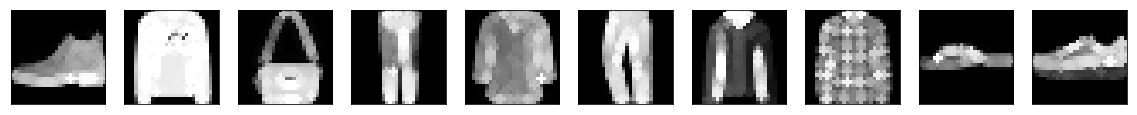

Dilatation of the reconstructions


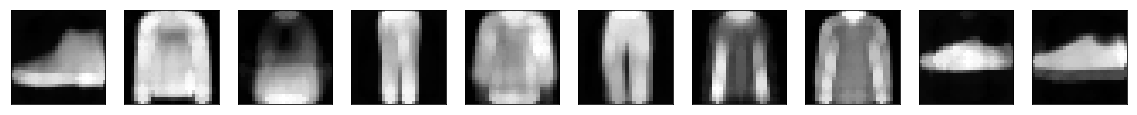

Original images and max-approximation to dilatation
Max-approx error to original:  0.12515645098686218  - Max-approx error to reconstruction:  0.12251703391075135


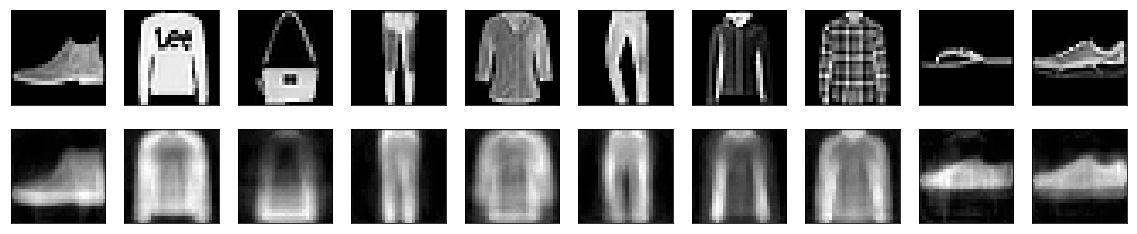

Dilated of the atom images of the decoder


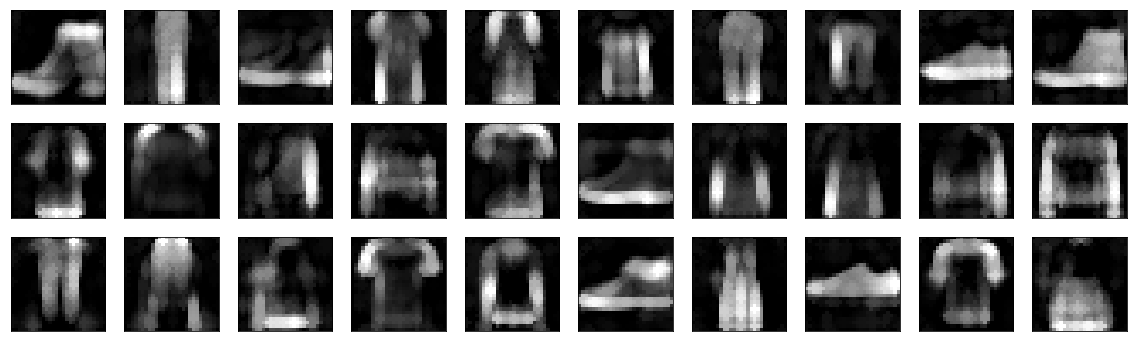

In [13]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 3. Sparsity_Objective = 0.1

## 3.1 Sparsity_weight = 0.0001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.008972201503813266


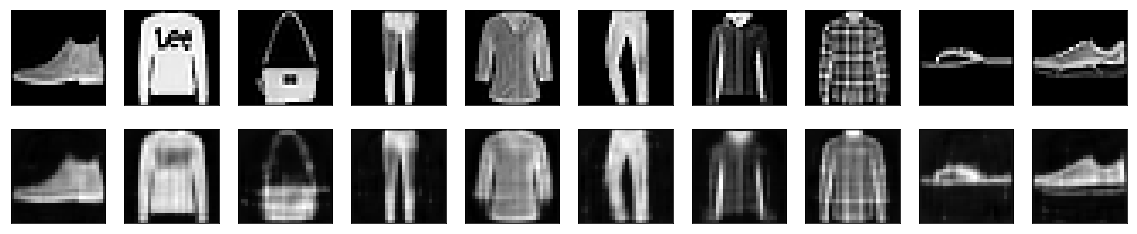

Histograms of the encodings - Sparsity (Hoyer):  0.3447495400905609


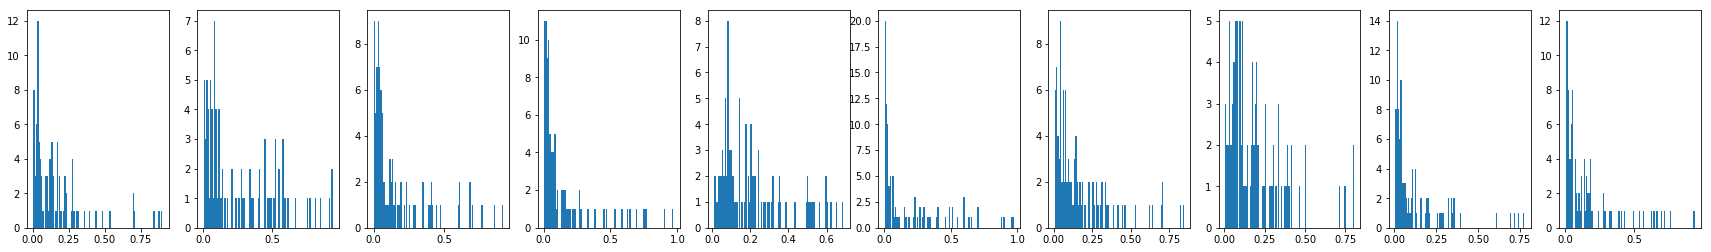

Atom images of the decoder


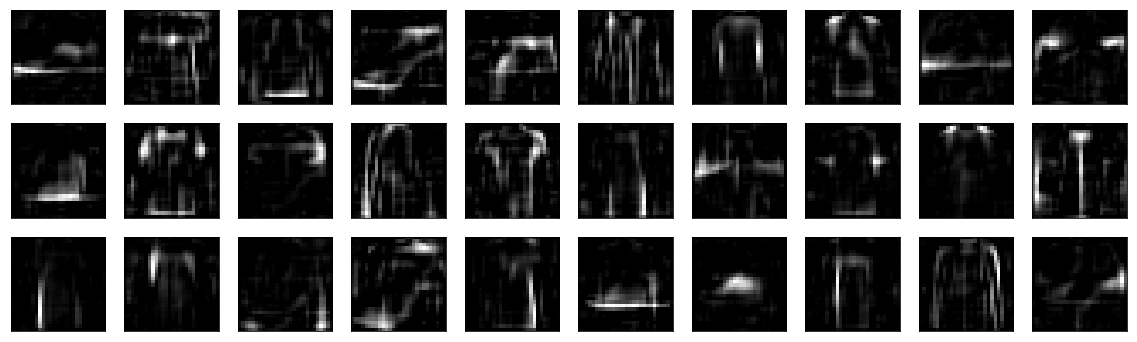

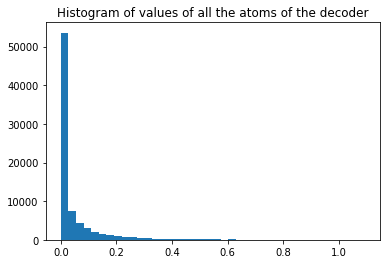

In [14]:
sp_o = 0.1
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


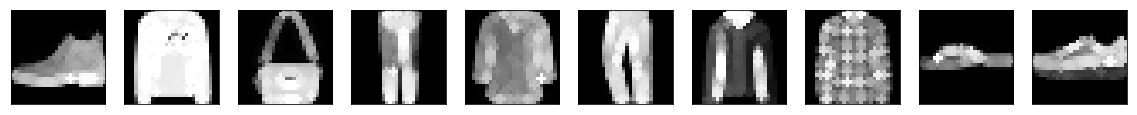

Dilatation of the reconstructions


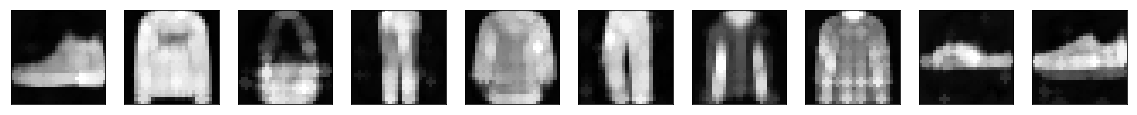

Original images and max-approximation to dilatation
Max-approx error to original:  0.808301739692688  - Max-approx error to reconstruction:  0.824516991519928


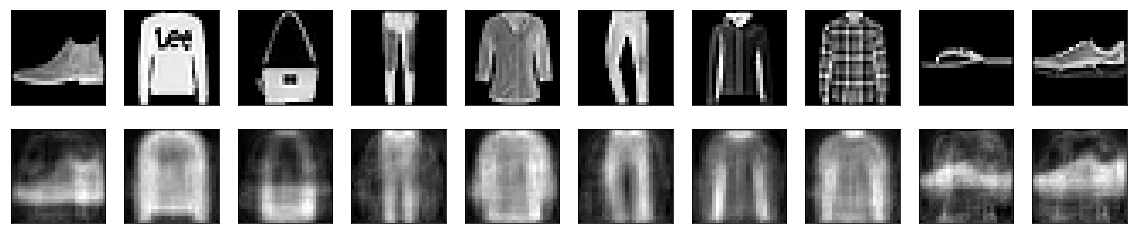

Dilated of the atom images of the decoder


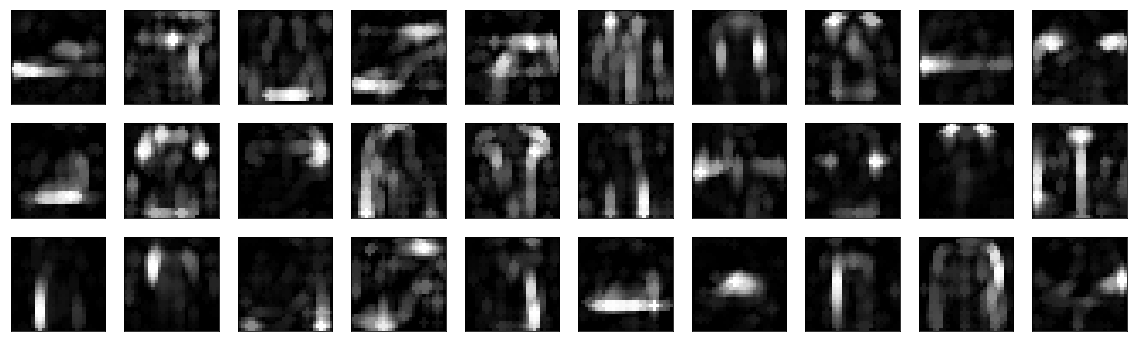

In [15]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.2 Sparsity_weight = 0.0005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.009756003987789153


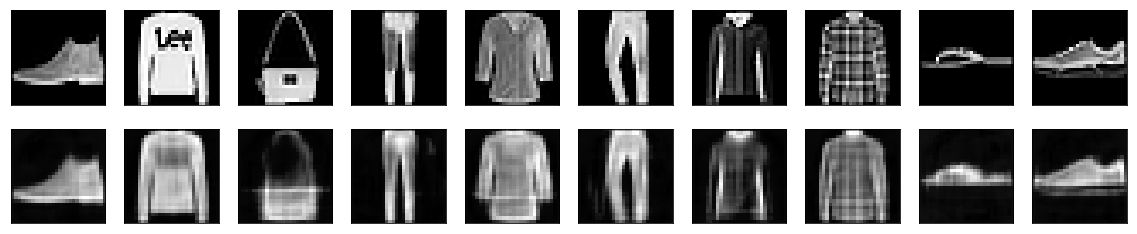

Histograms of the encodings - Sparsity (Hoyer):  0.4320661127567291


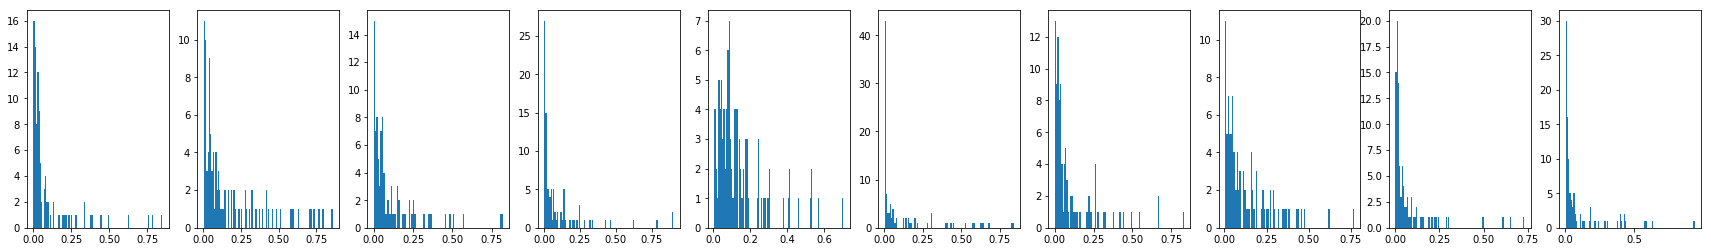

Atom images of the decoder


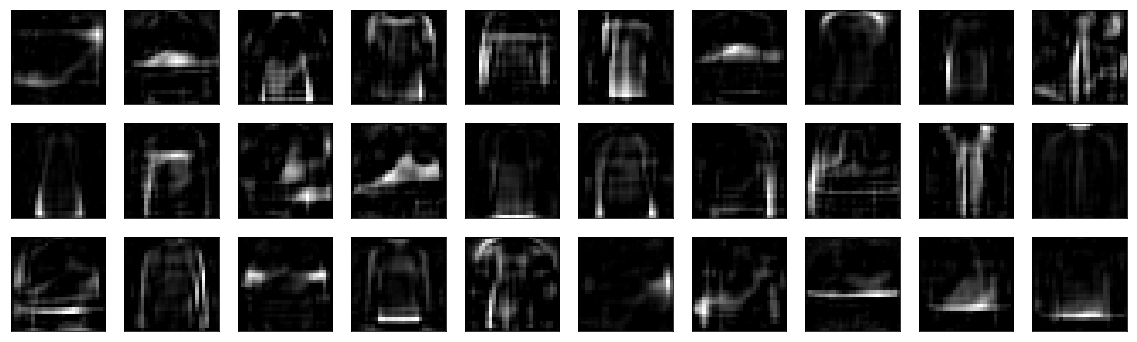

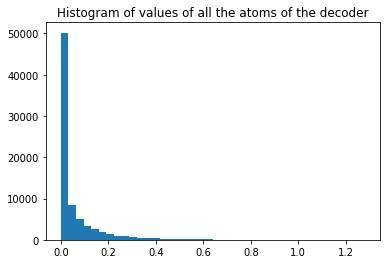

In [16]:
sp_o = 0.1
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


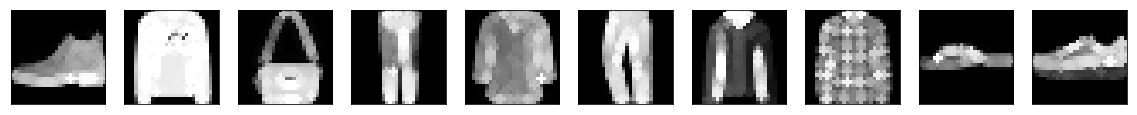

Dilatation of the reconstructions


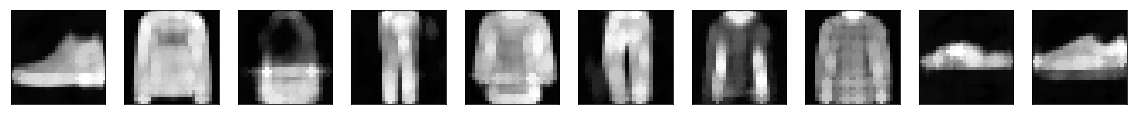

Original images and max-approximation to dilatation
Max-approx error to original:  0.4631005551815033  - Max-approx error to reconstruction:  0.4754152540206909


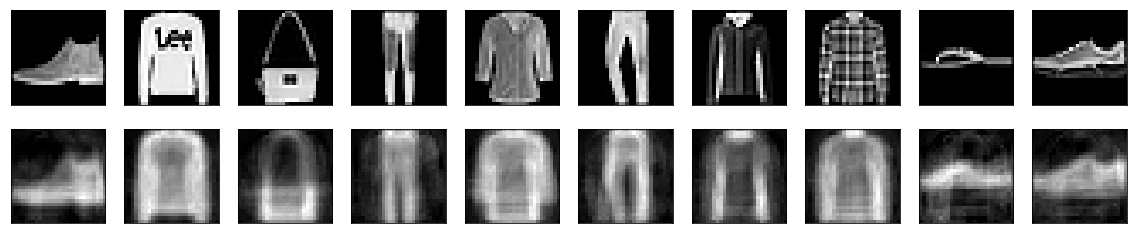

Dilated of the atom images of the decoder


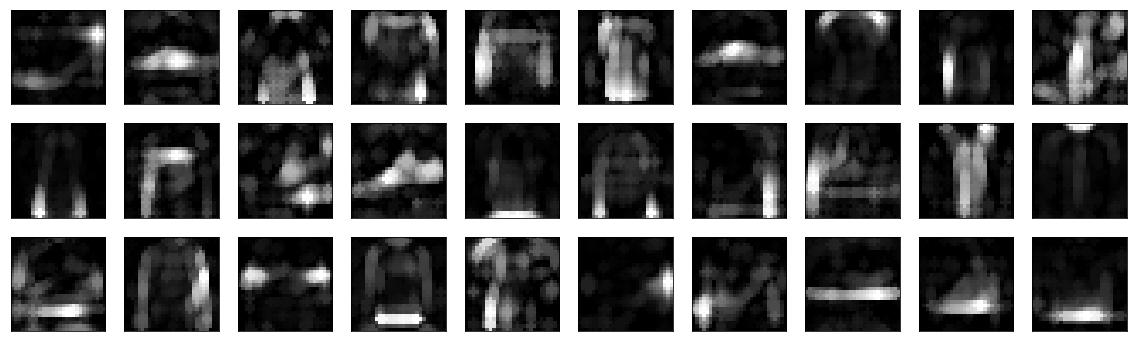

In [17]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.3 Sparsity_weight = 0.001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.00996802978515625


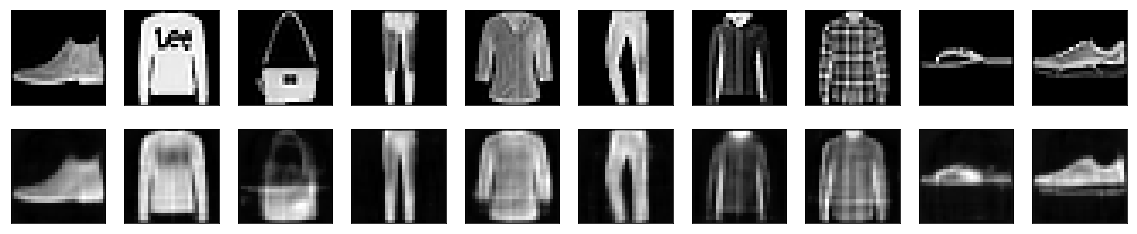

Histograms of the encodings - Sparsity (Hoyer):  0.460620641708374


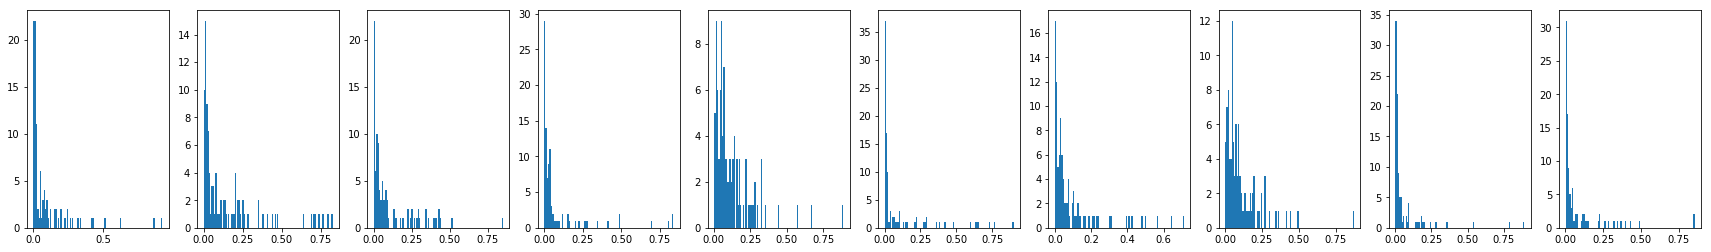

Atom images of the decoder


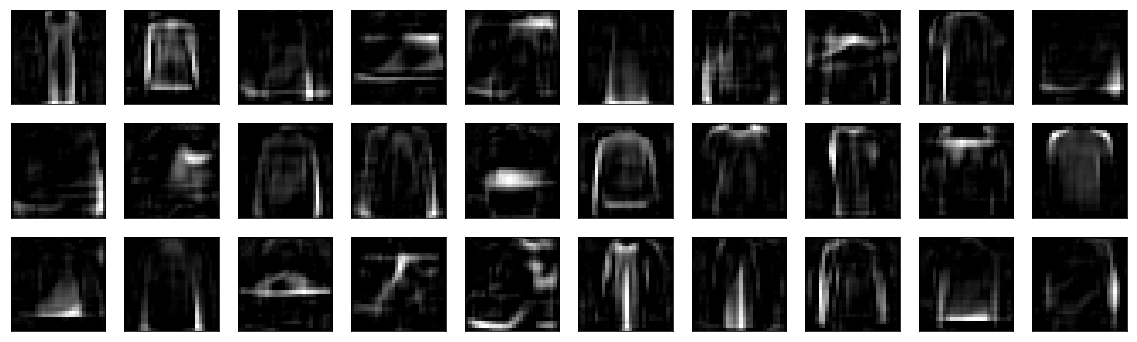

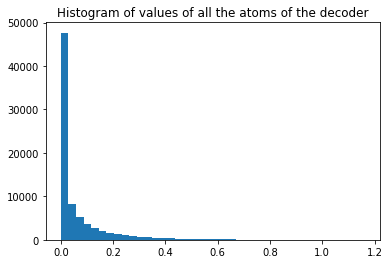

In [18]:
sp_o = 0.1
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


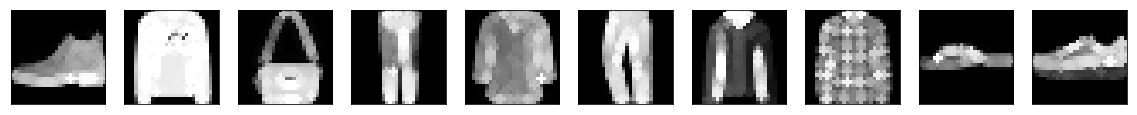

Dilatation of the reconstructions


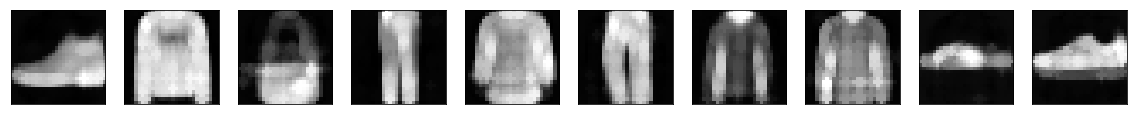

Original images and max-approximation to dilatation
Max-approx error to original:  0.37496752791404725  - Max-approx error to reconstruction:  0.38466975412368776


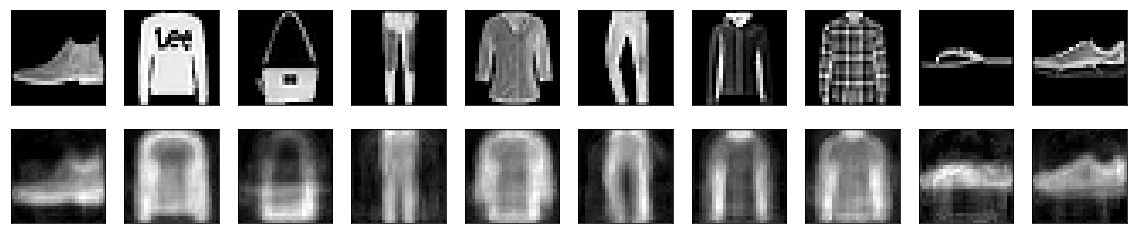

Dilated of the atom images of the decoder


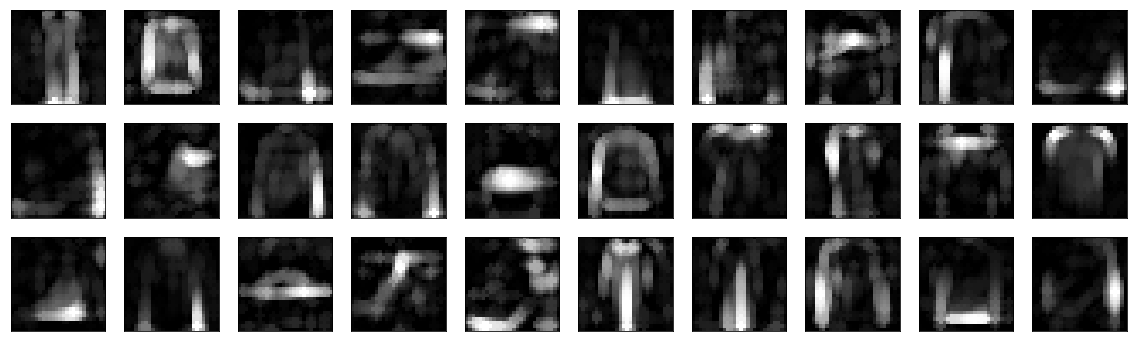

In [19]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.4 Sparsity_weight = 0.005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.010533033555746078


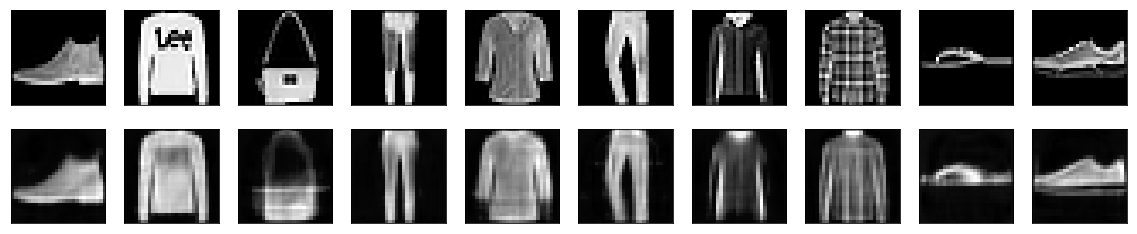

Histograms of the encodings - Sparsity (Hoyer):  0.47037169337272644


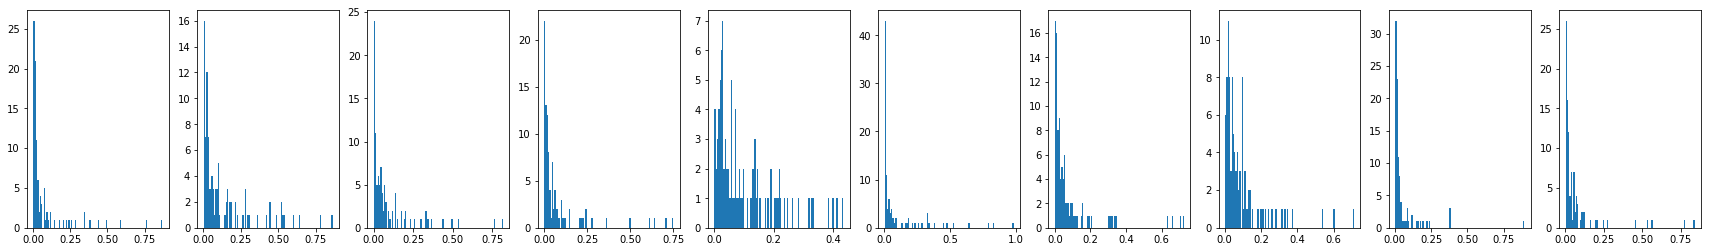

Atom images of the decoder


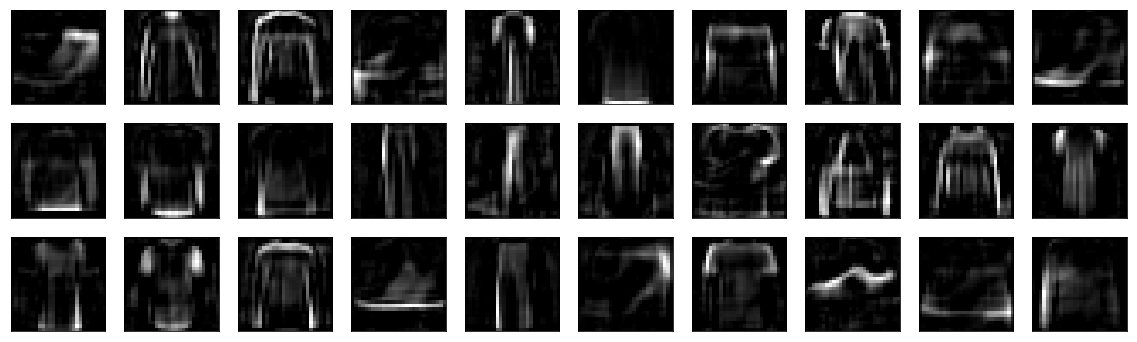

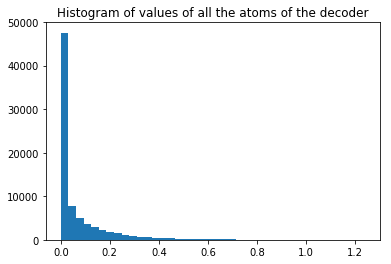

In [20]:
sp_o = 0.1
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


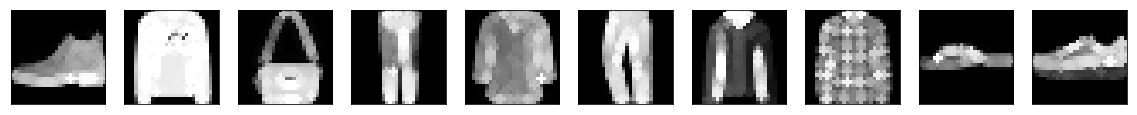

Dilatation of the reconstructions


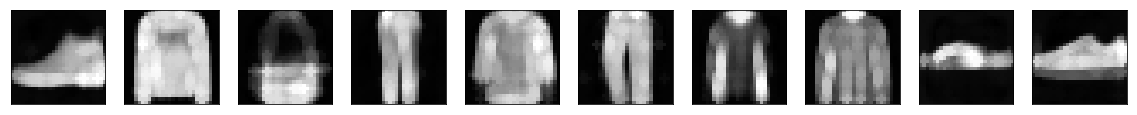

Original images and max-approximation to dilatation
Max-approx error to original:  0.3286438200712204  - Max-approx error to reconstruction:  0.3317929051399231


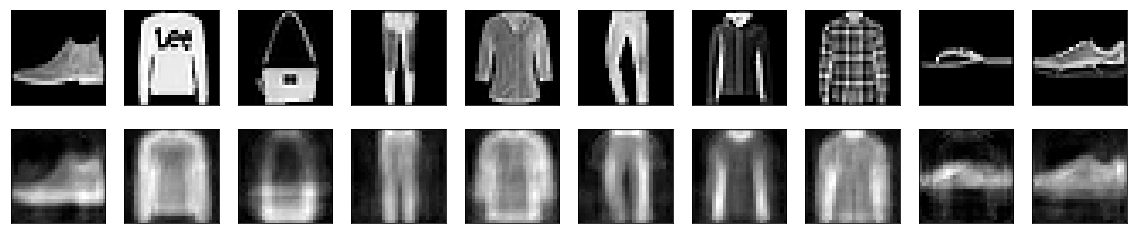

Dilated of the atom images of the decoder


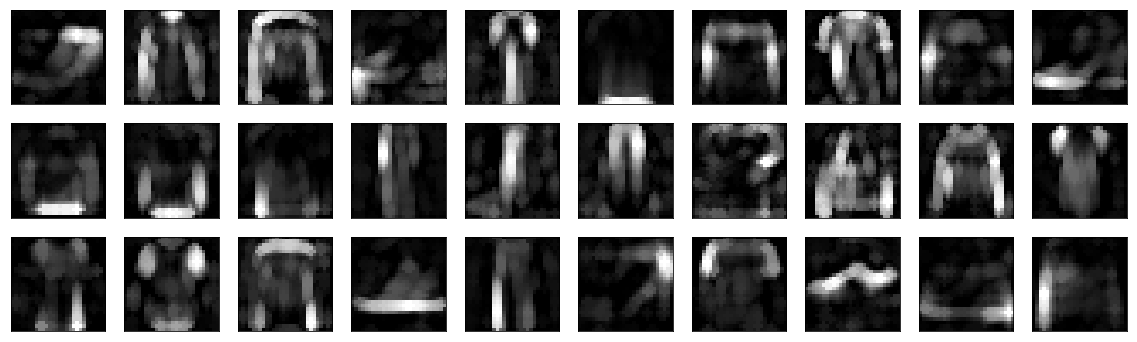

In [21]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.5 Sparsity_weight = 0.01 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.010921212613582611


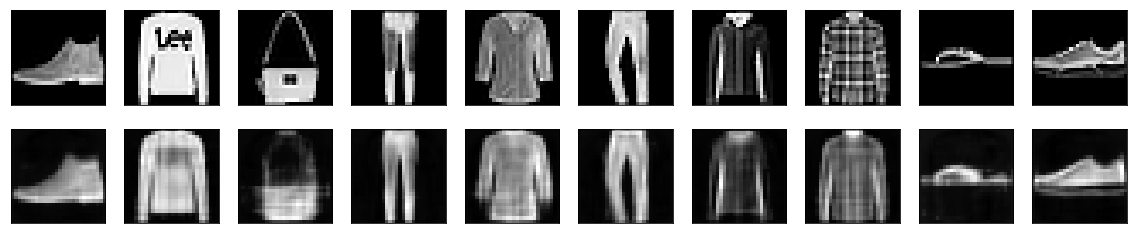

Histograms of the encodings - Sparsity (Hoyer):  0.45907148718833923


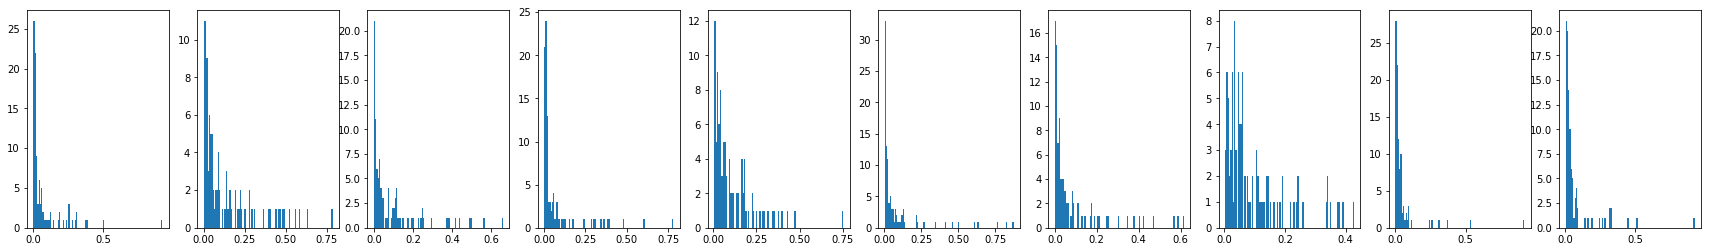

Atom images of the decoder


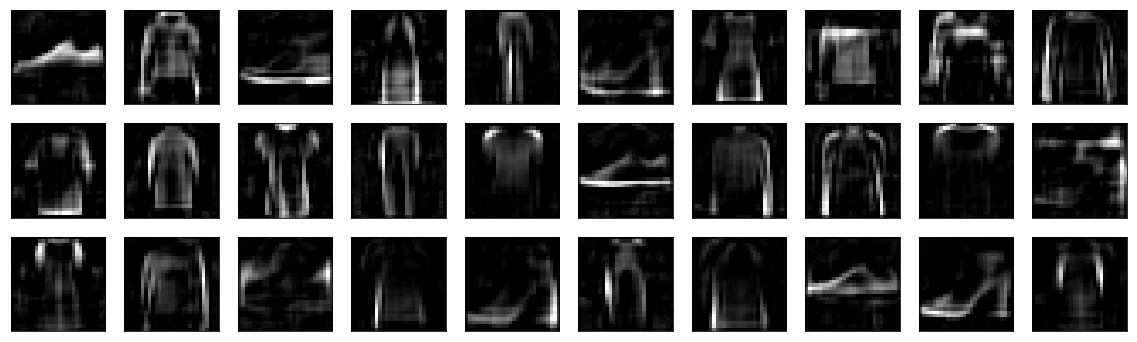

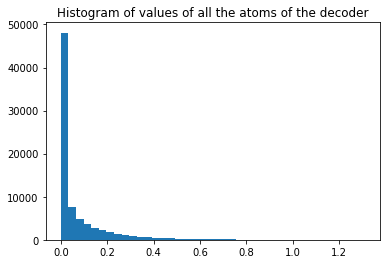

In [22]:
sp_o = 0.1
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


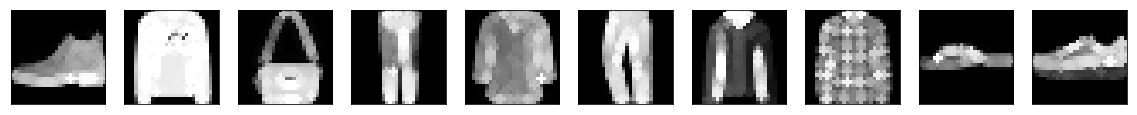

Dilatation of the reconstructions


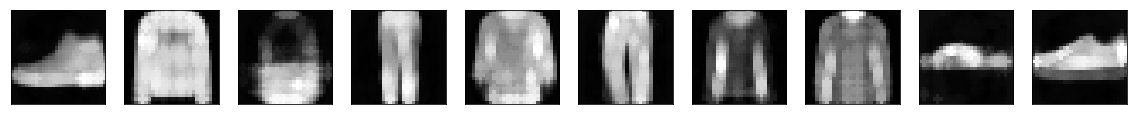

Original images and max-approximation to dilatation
Max-approx error to original:  0.3393788229465485  - Max-approx error to reconstruction:  0.3457219527721405


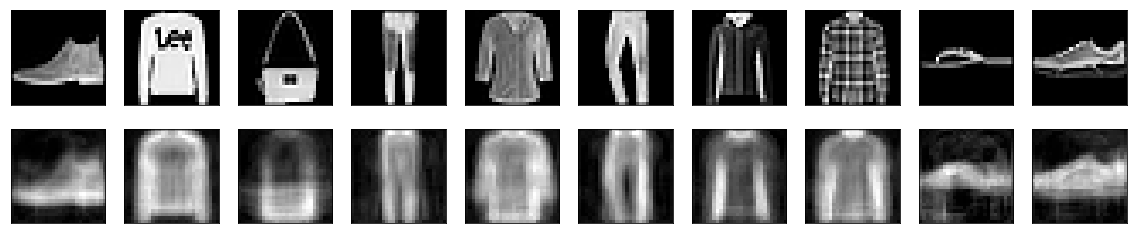

Dilated of the atom images of the decoder


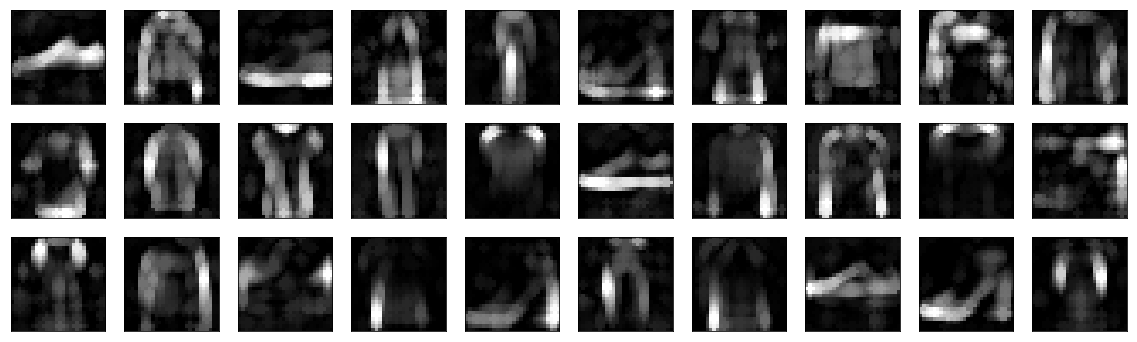

In [23]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.6 Sparsity_weight = 0.05 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.014202547091245651


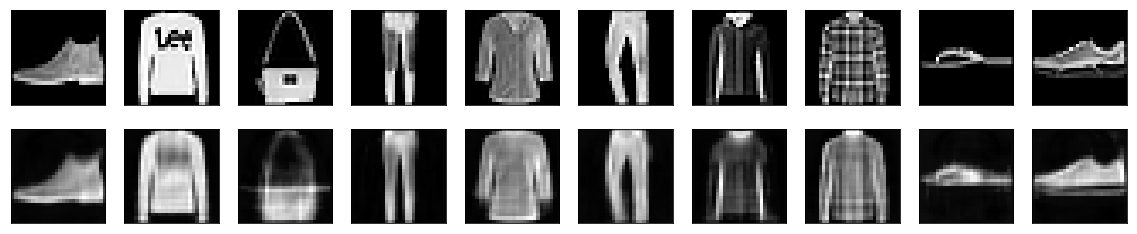

Histograms of the encodings - Sparsity (Hoyer):  0.4358537495136261


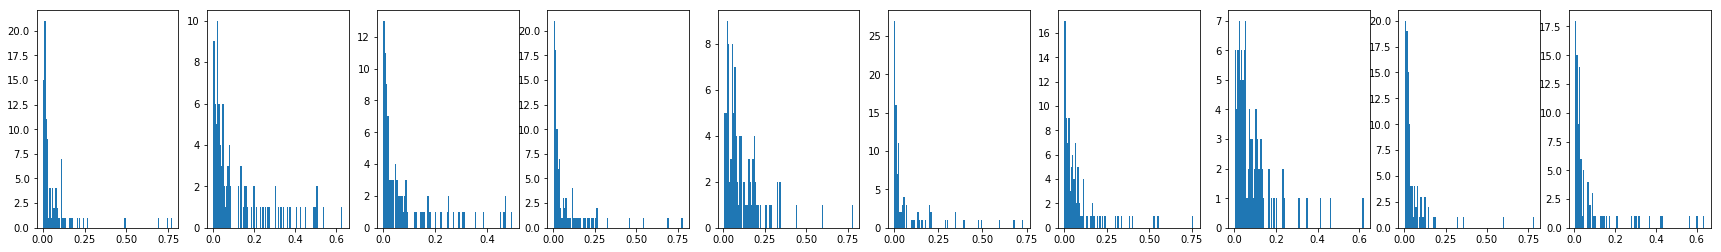

Atom images of the decoder


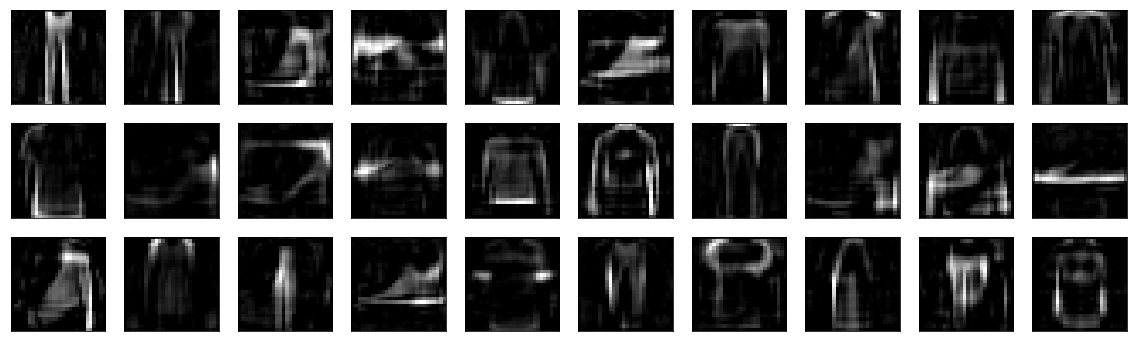

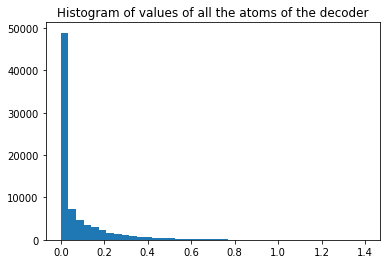

In [24]:
sp_o = 0.1
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


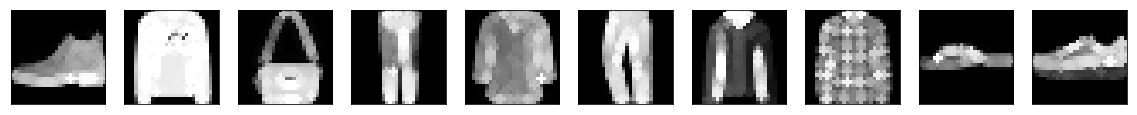

Dilatation of the reconstructions


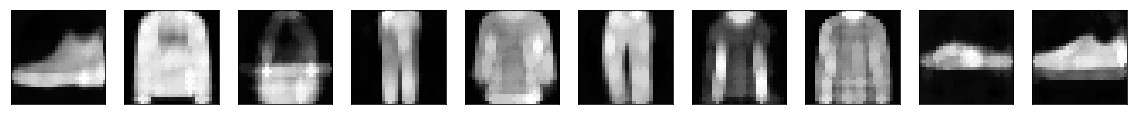

Original images and max-approximation to dilatation
Max-approx error to original:  0.3673563766002655  - Max-approx error to reconstruction:  0.373401873588562


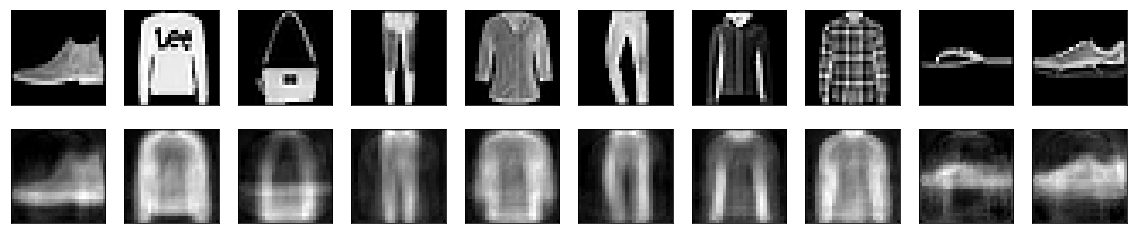

Dilated of the atom images of the decoder


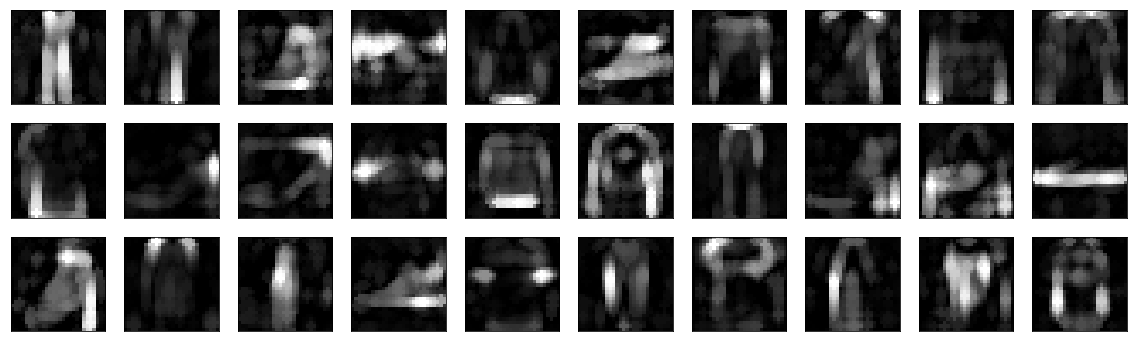

In [25]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.7 Sparsity_weight = 0.1 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.018024092304706574


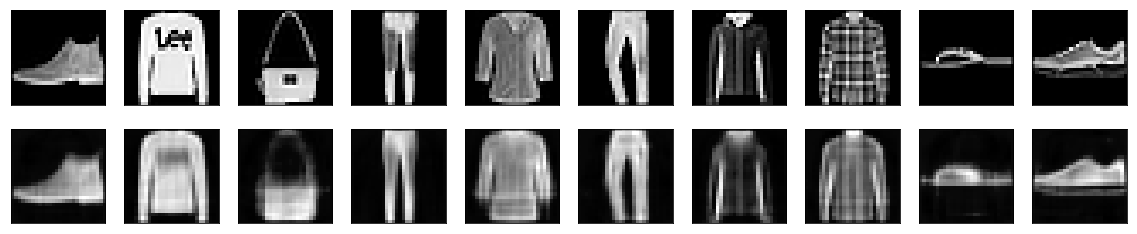

Histograms of the encodings - Sparsity (Hoyer):  0.4255862832069397


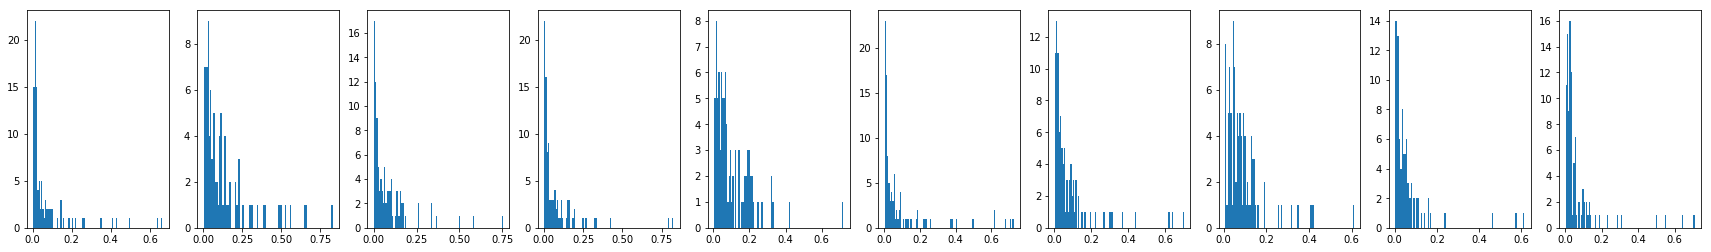

Atom images of the decoder


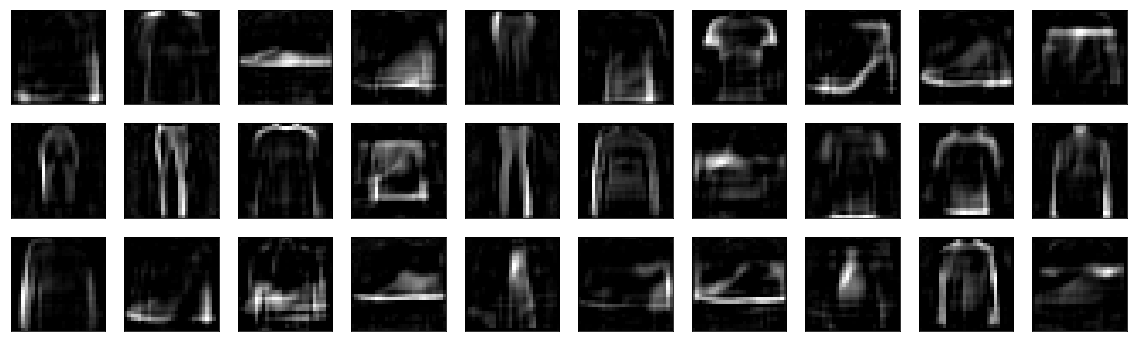

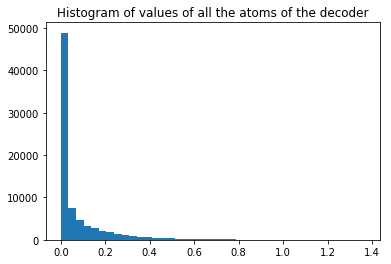

In [26]:
sp_o = 0.1
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


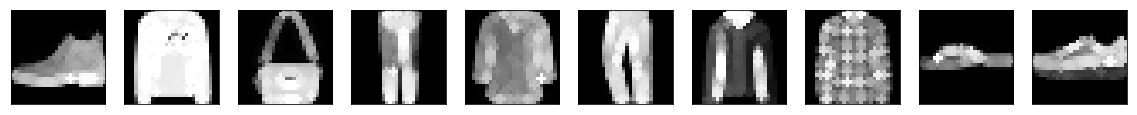

Dilatation of the reconstructions


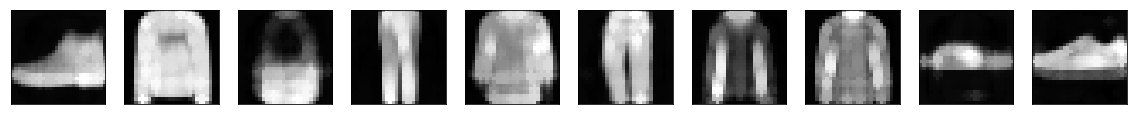

Original images and max-approximation to dilatation
Max-approx error to original:  0.36169010219573977  - Max-approx error to reconstruction:  0.3695318867683411


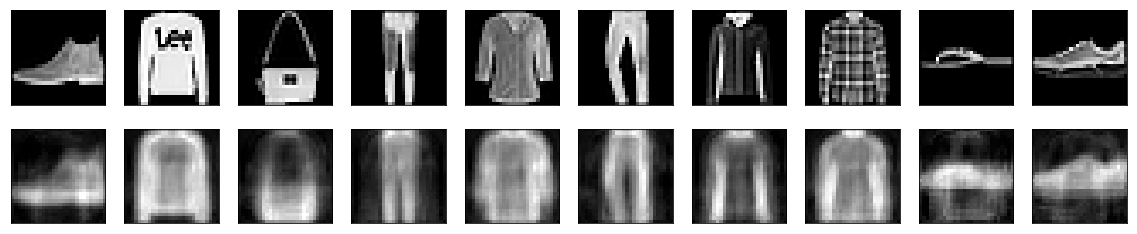

Dilated of the atom images of the decoder


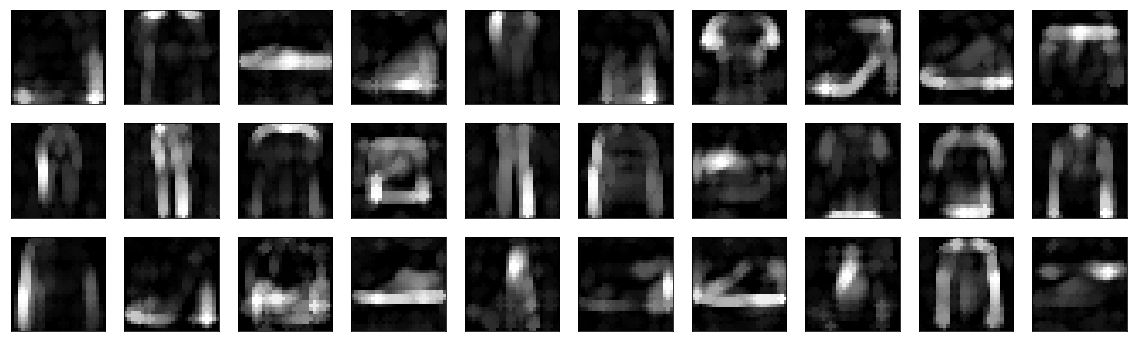

In [27]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.8 Sparsity_weight = 0.5 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.038015865206718444


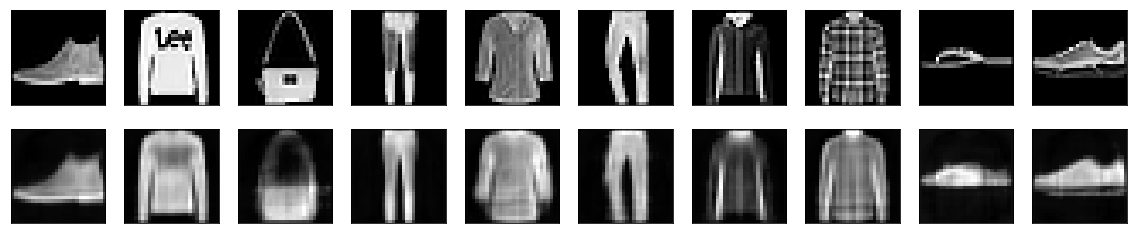

Histograms of the encodings - Sparsity (Hoyer):  0.3437418043613434


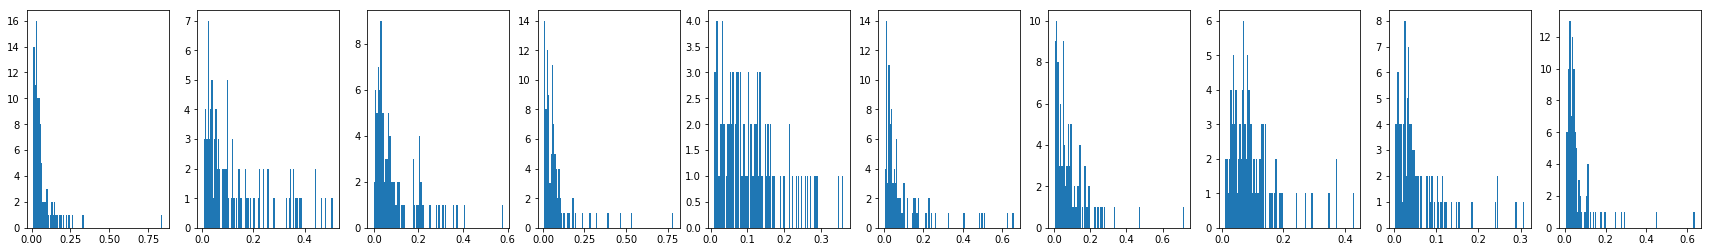

Atom images of the decoder


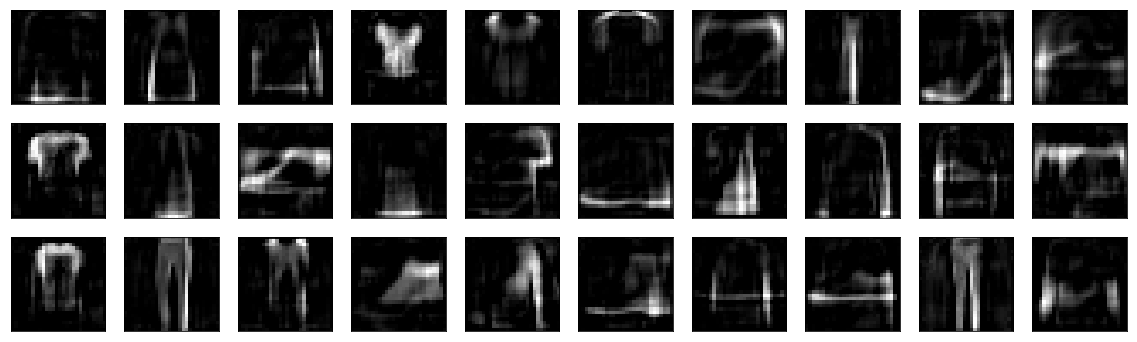

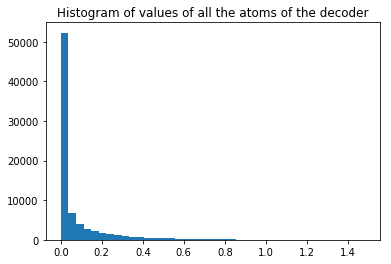

In [28]:
sp_o = 0.1
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_28_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


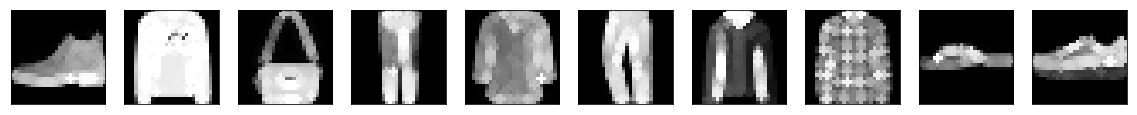

Dilatation of the reconstructions


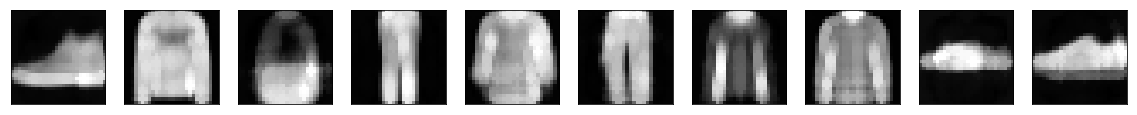

Original images and max-approximation to dilatation
Max-approx error to original:  0.3647204372406006  - Max-approx error to reconstruction:  0.38419879779815674


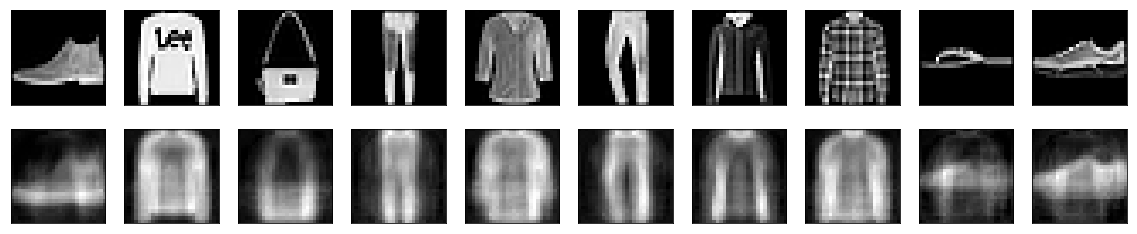

Dilated of the atom images of the decoder


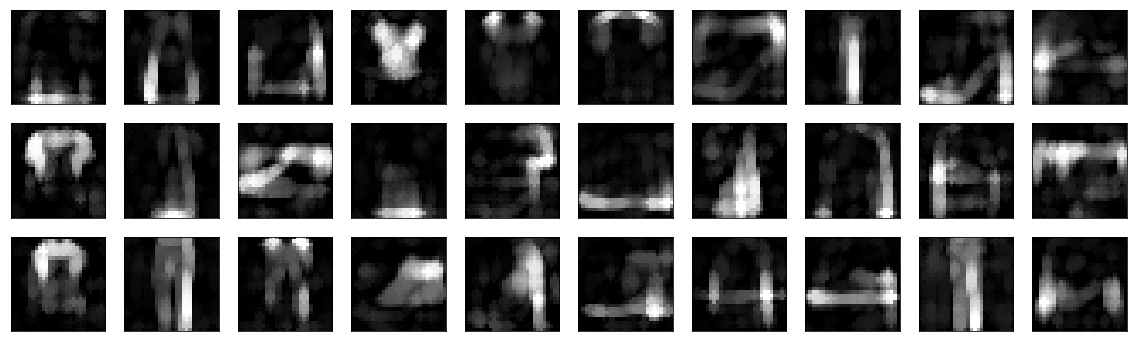

In [29]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 4. Sparsity_Objective = 0.2

## 4.1 Sparsity_weight = 0.0001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.008516833168268203


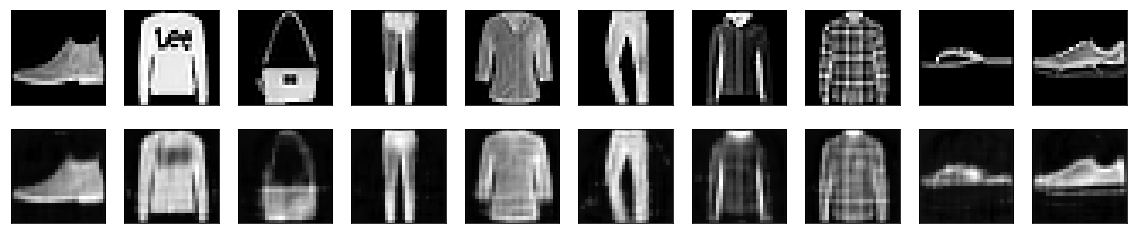

Histograms of the encodings - Sparsity (Hoyer):  0.286052942276001


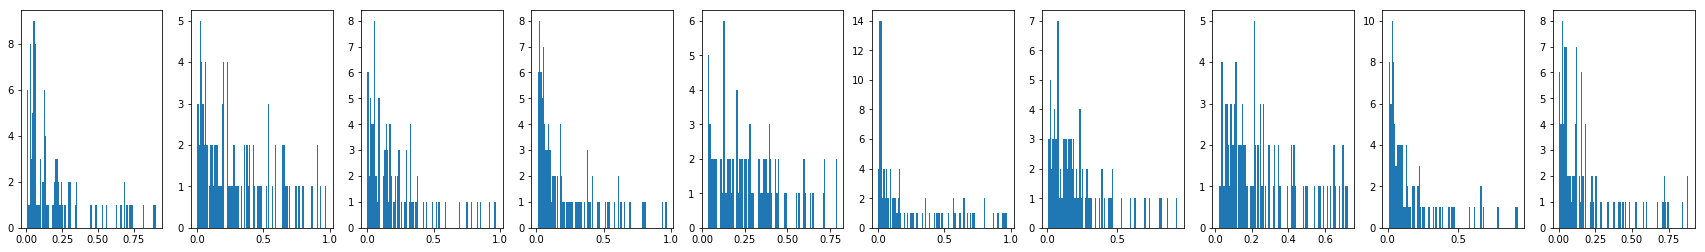

Atom images of the decoder


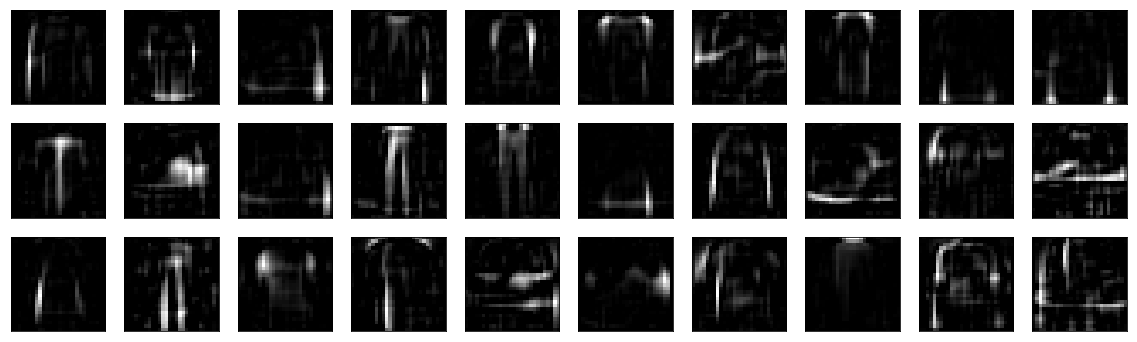

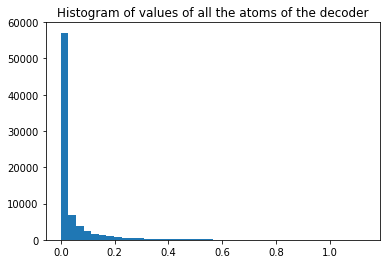

In [30]:
sp_o = 0.2
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


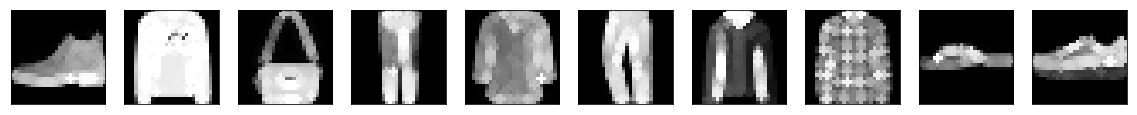

Dilatation of the reconstructions


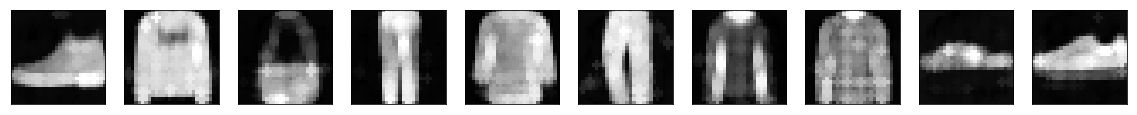

Original images and max-approximation to dilatation
Max-approx error to original:  1.1827046920776367  - Max-approx error to reconstruction:  1.1863695453643799


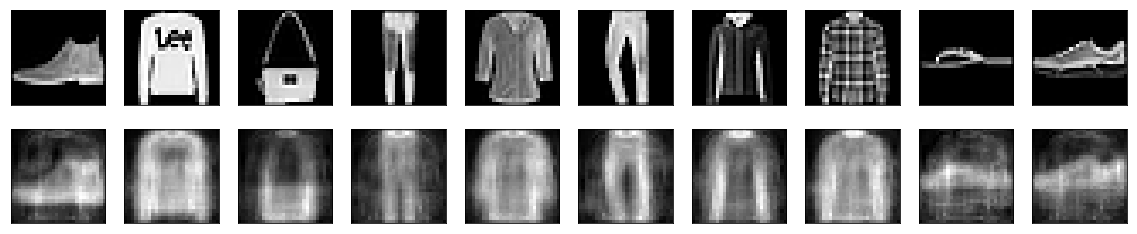

Dilated of the atom images of the decoder


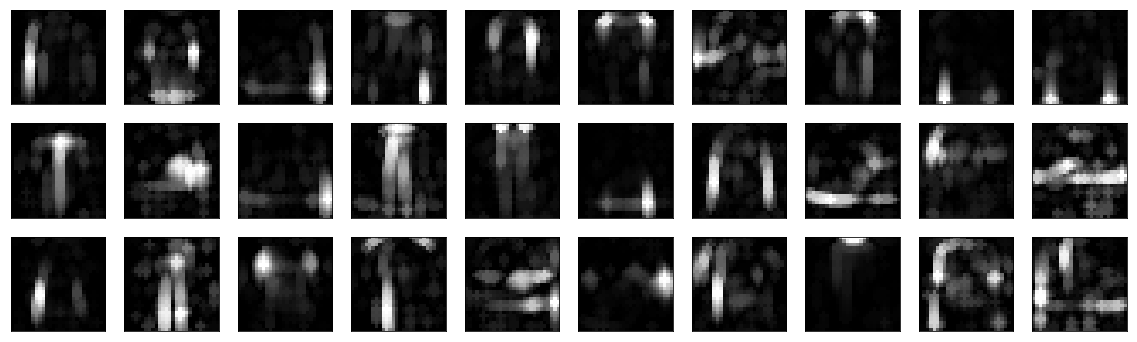

In [31]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.2 Sparsity_weight = 0.0005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.00859666003882885


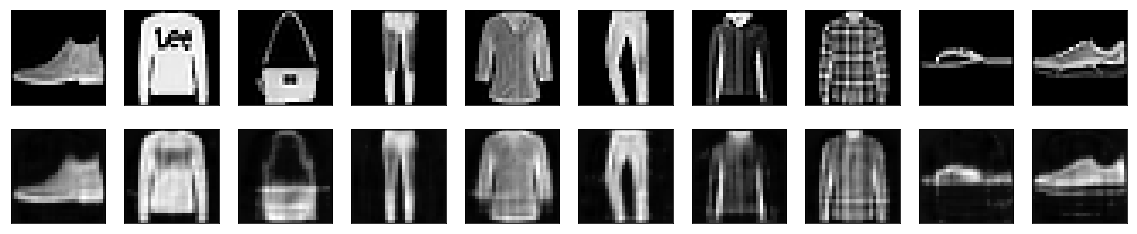

Histograms of the encodings - Sparsity (Hoyer):  0.31564444303512573


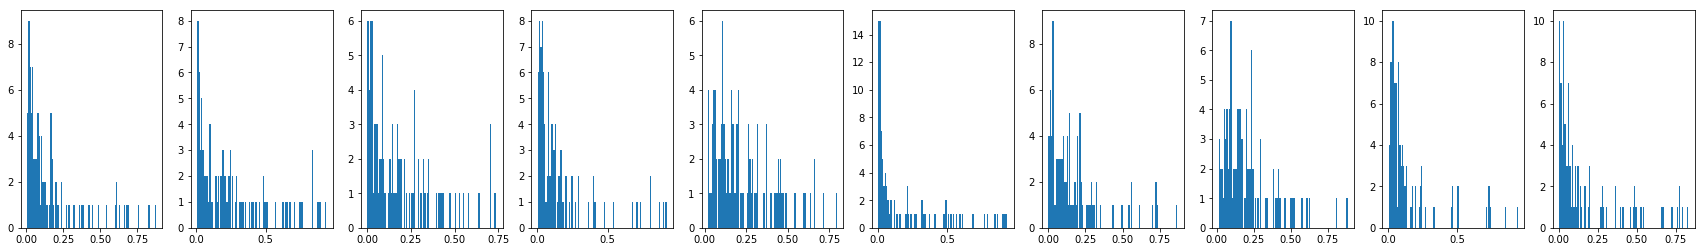

Atom images of the decoder


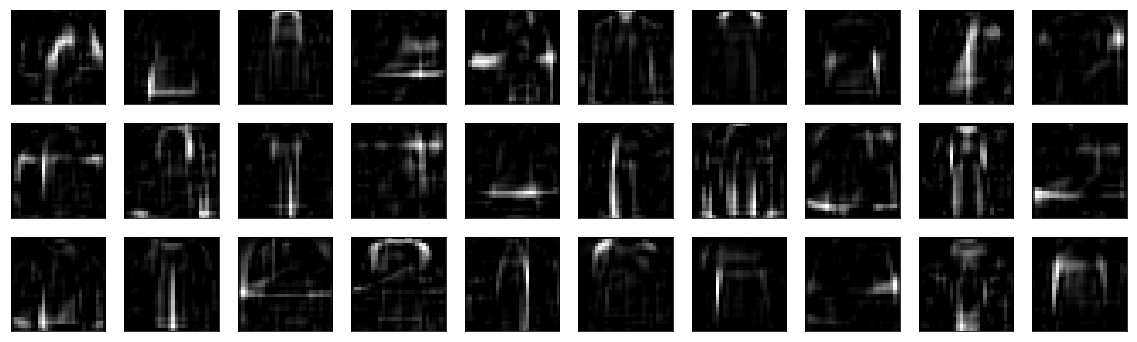

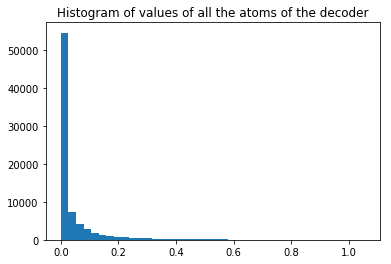

In [32]:
sp_o = 0.2
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_26_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


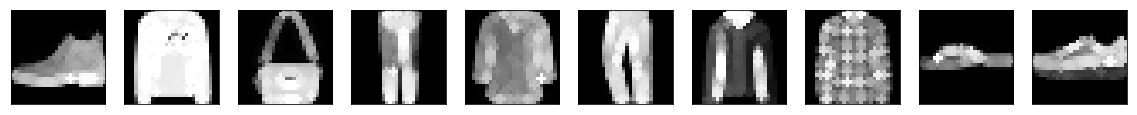

Dilatation of the reconstructions


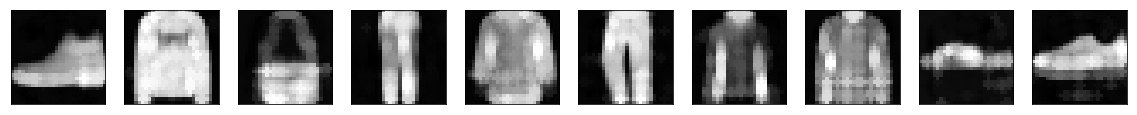

Original images and max-approximation to dilatation
Max-approx error to original:  0.9225418579101563  - Max-approx error to reconstruction:  0.9422960224151611


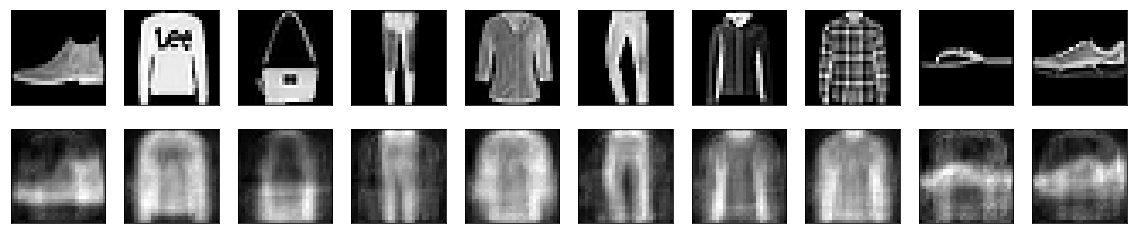

Dilated of the atom images of the decoder


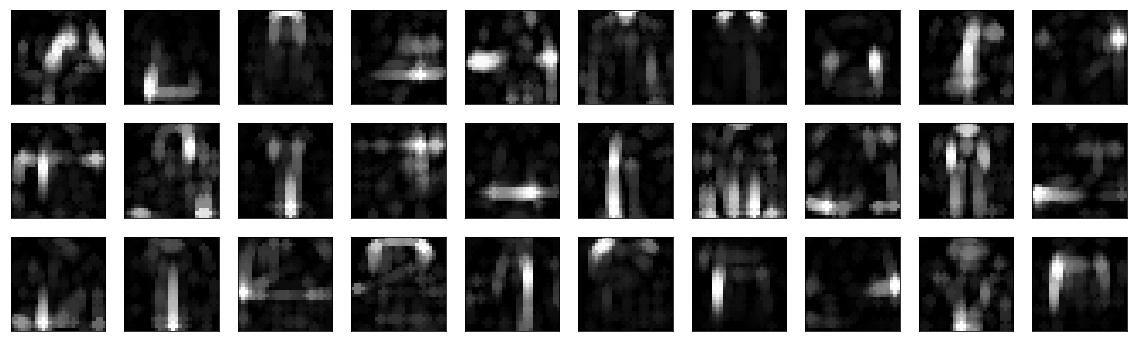

In [33]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.3 Sparsity_weight = 0.001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.008713536542654037


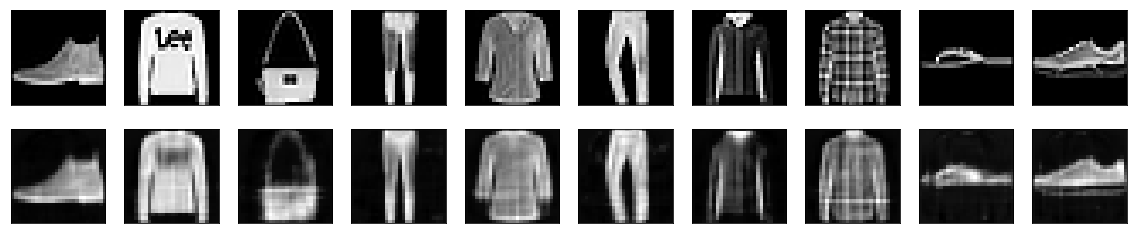

Histograms of the encodings - Sparsity (Hoyer):  0.322480171918869


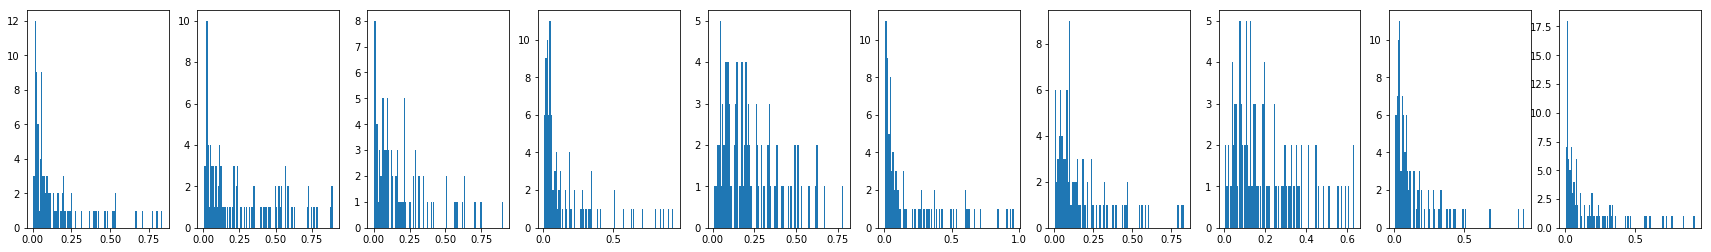

Atom images of the decoder


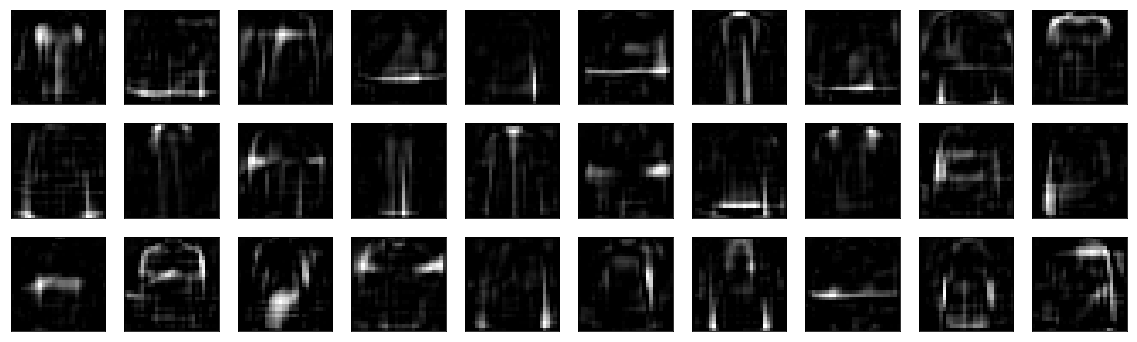

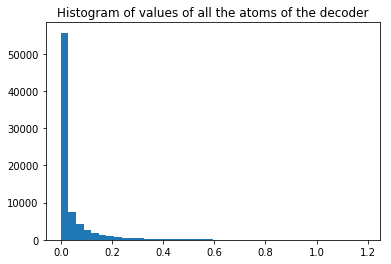

In [34]:
sp_o = 0.2
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


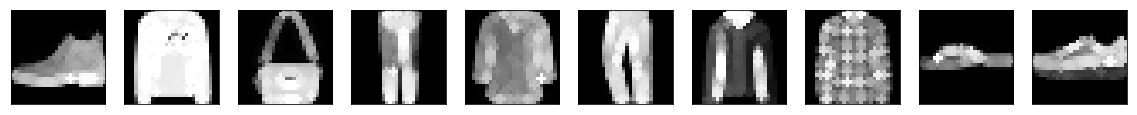

Dilatation of the reconstructions


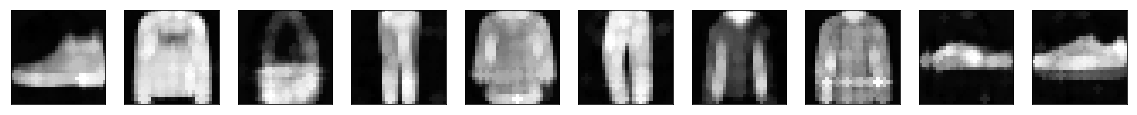

Original images and max-approximation to dilatation
Max-approx error to original:  0.889555079460144  - Max-approx error to reconstruction:  0.8992373579978943


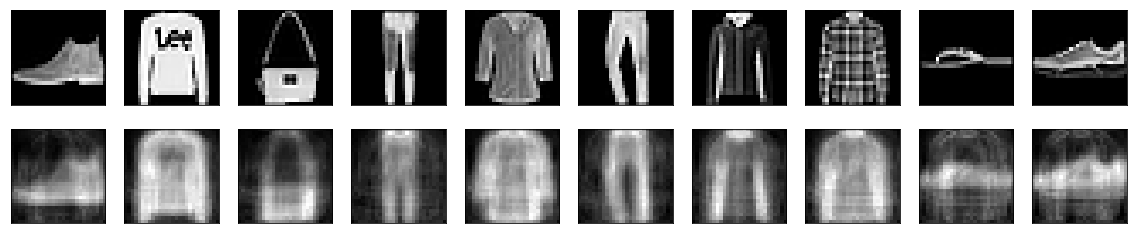

Dilated of the atom images of the decoder


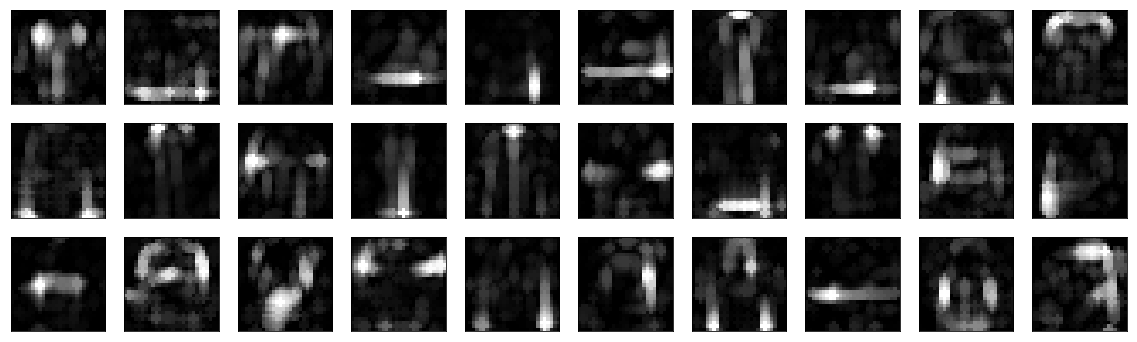

In [35]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.4 Sparsity_weight = 0.005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009042457419633866


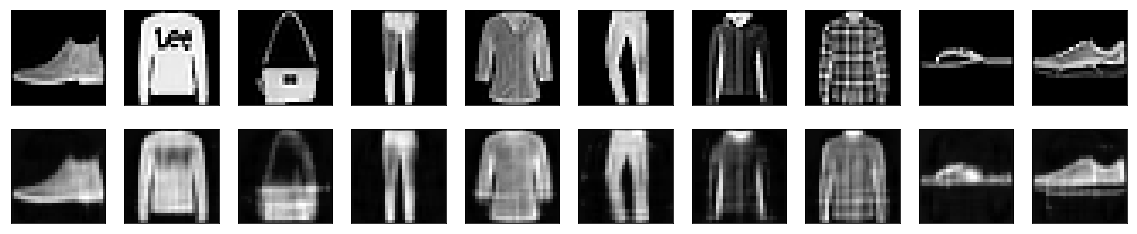

Histograms of the encodings - Sparsity (Hoyer):  0.3187243342399597


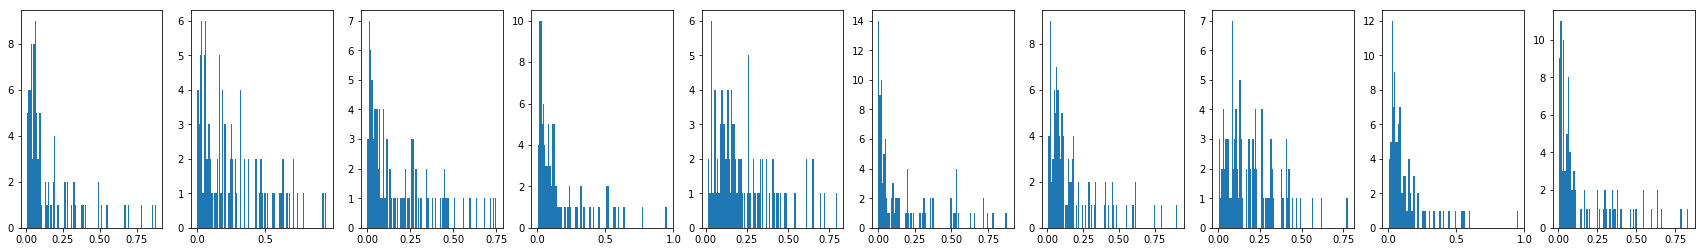

Atom images of the decoder


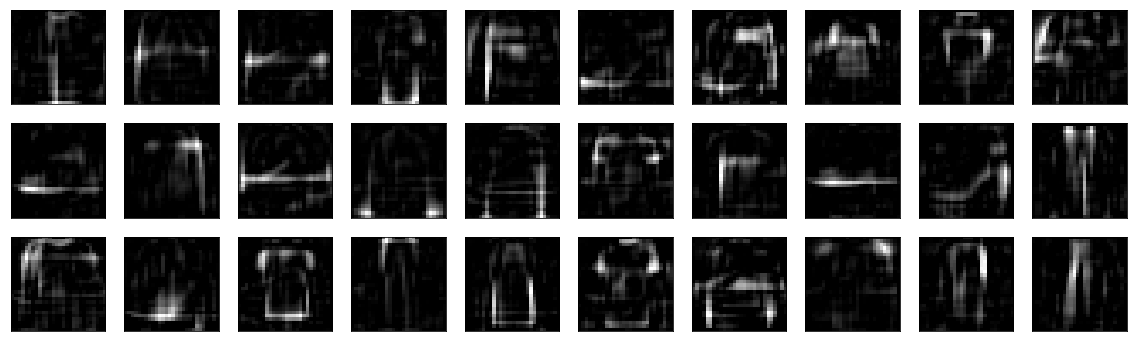

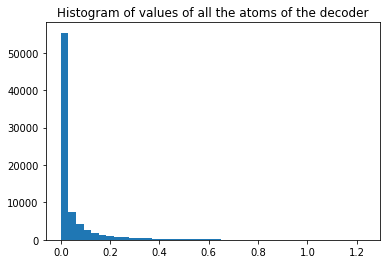

In [36]:
sp_o = 0.2
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


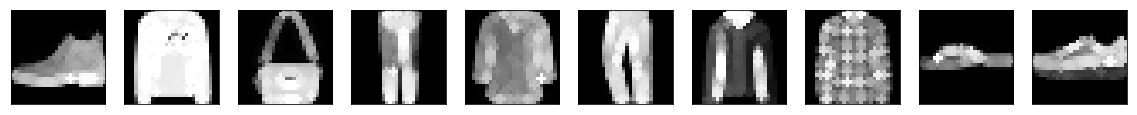

Dilatation of the reconstructions


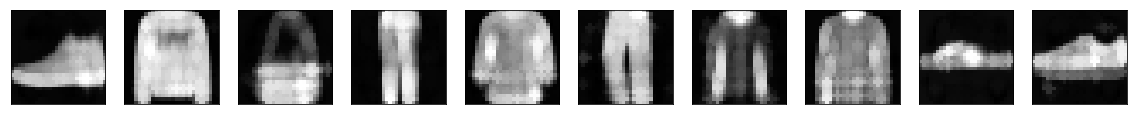

Original images and max-approximation to dilatation
Max-approx error to original:  0.846690294265747  - Max-approx error to reconstruction:  0.876401755809784


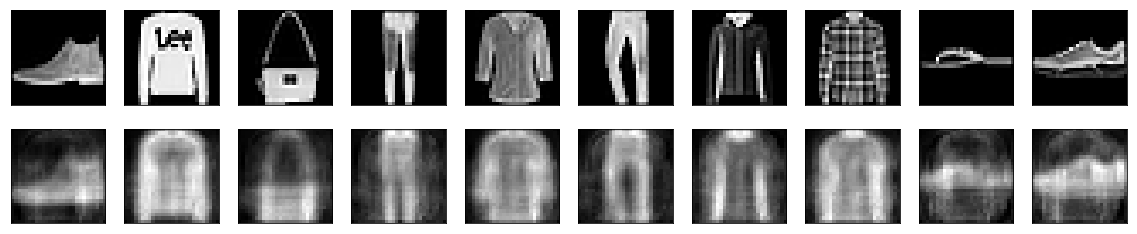

Dilated of the atom images of the decoder


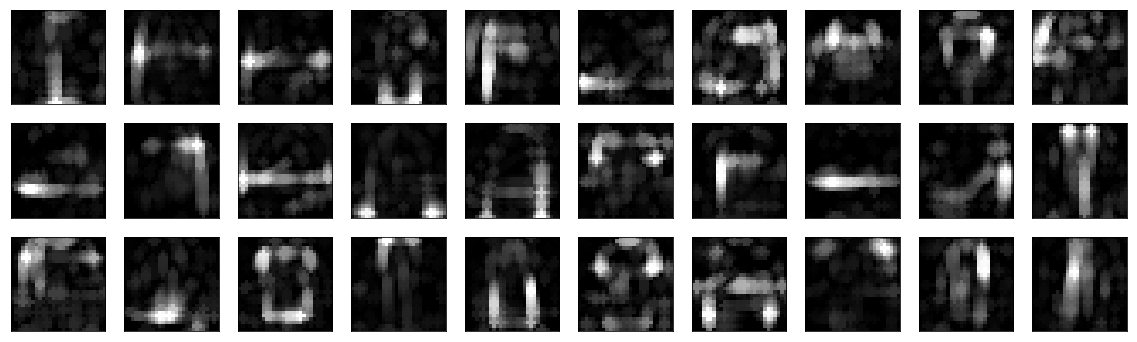

In [37]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.5 Sparsity_weight = 0.01 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009458267956972122


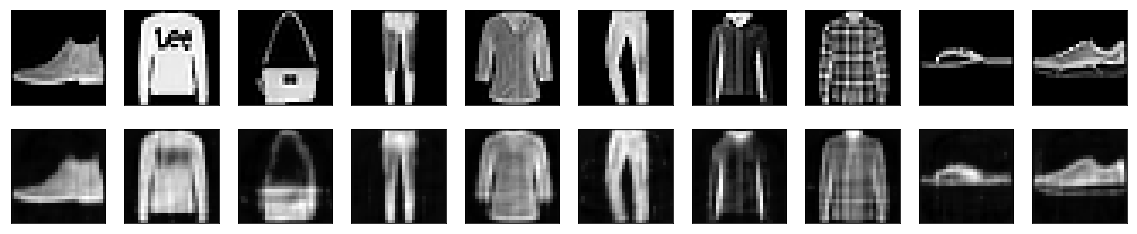

Histograms of the encodings - Sparsity (Hoyer):  0.31098997592926025


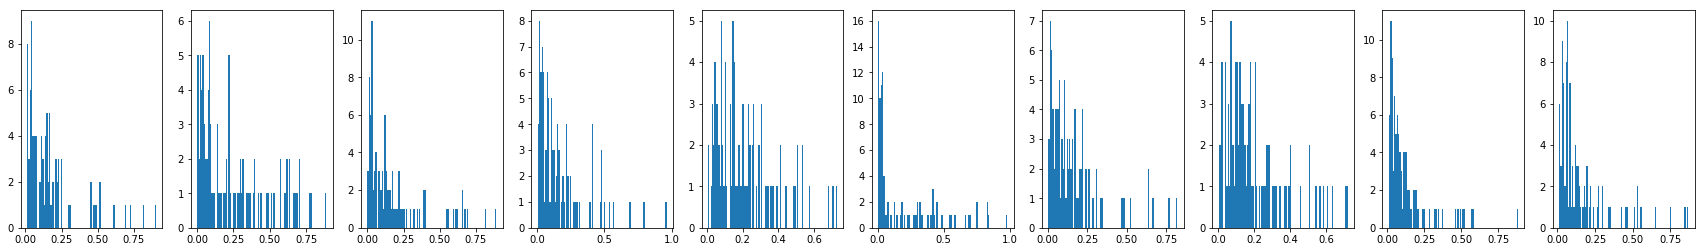

Atom images of the decoder


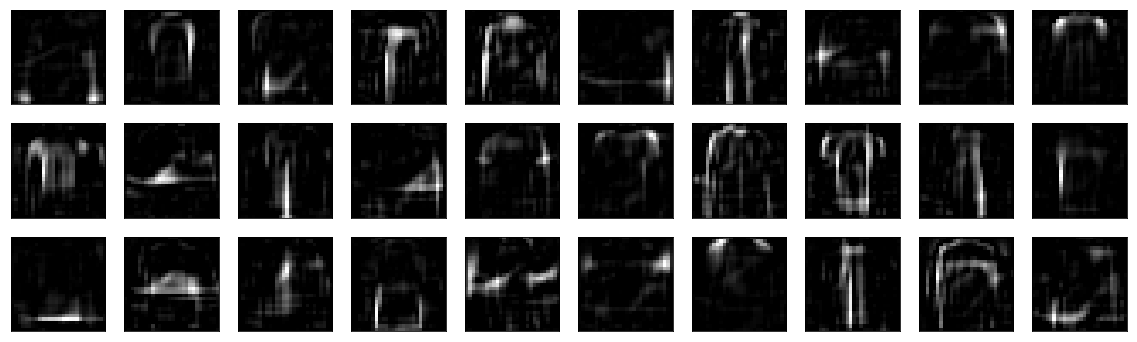

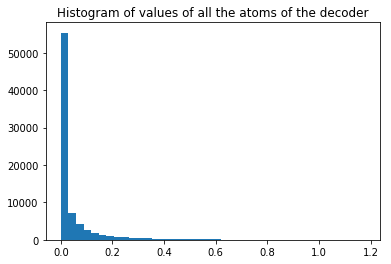

In [38]:
sp_o = 0.2
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


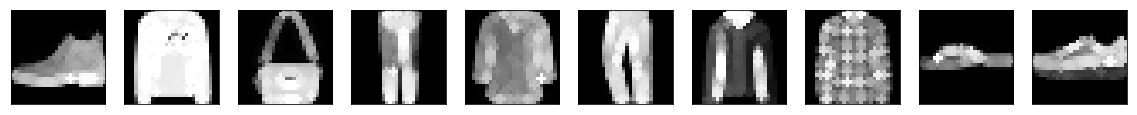

Dilatation of the reconstructions


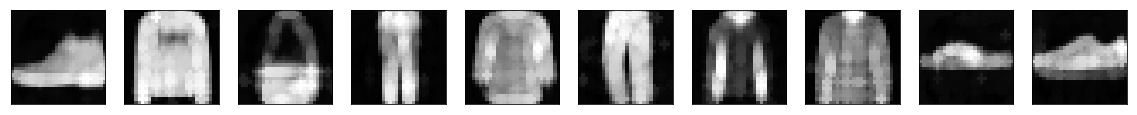

Original images and max-approximation to dilatation
Max-approx error to original:  0.8668408987045289  - Max-approx error to reconstruction:  0.8979882391929627


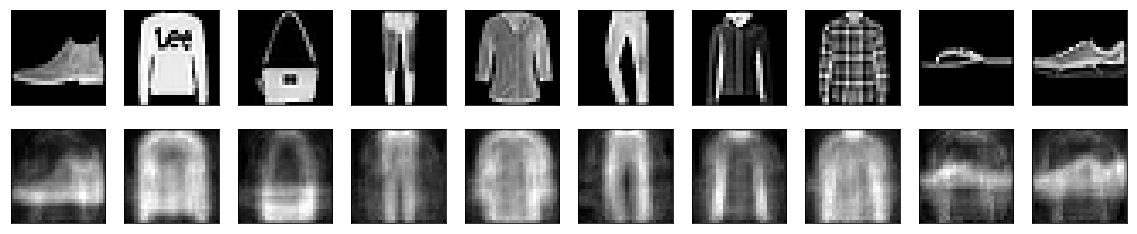

Dilated of the atom images of the decoder


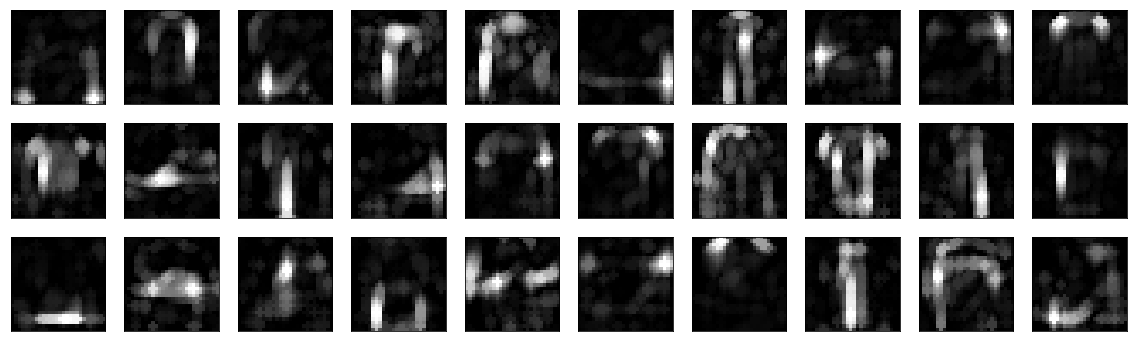

In [39]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.6 Sparsity_weight = 0.05 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.012680270010232926


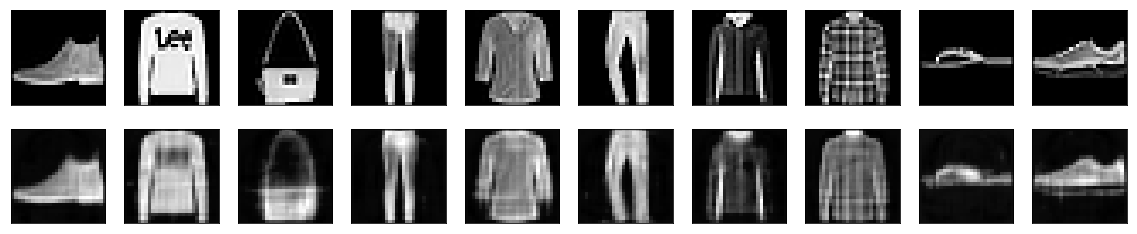

Histograms of the encodings - Sparsity (Hoyer):  0.2813633382320404


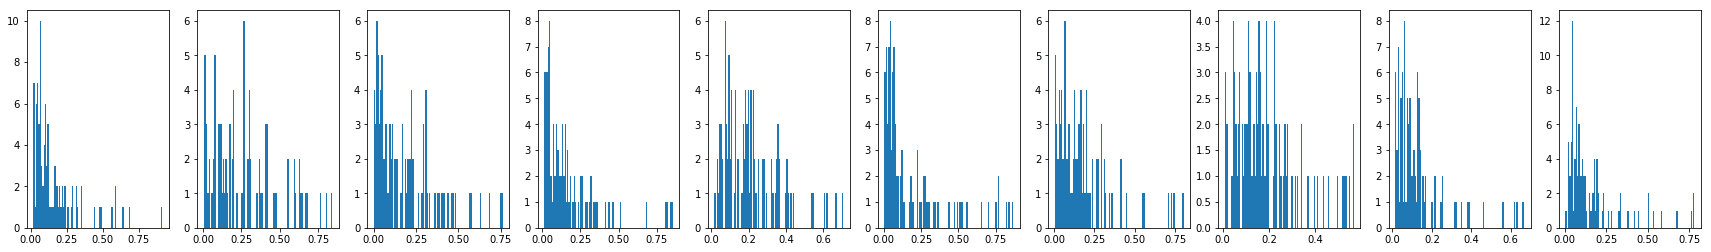

Atom images of the decoder


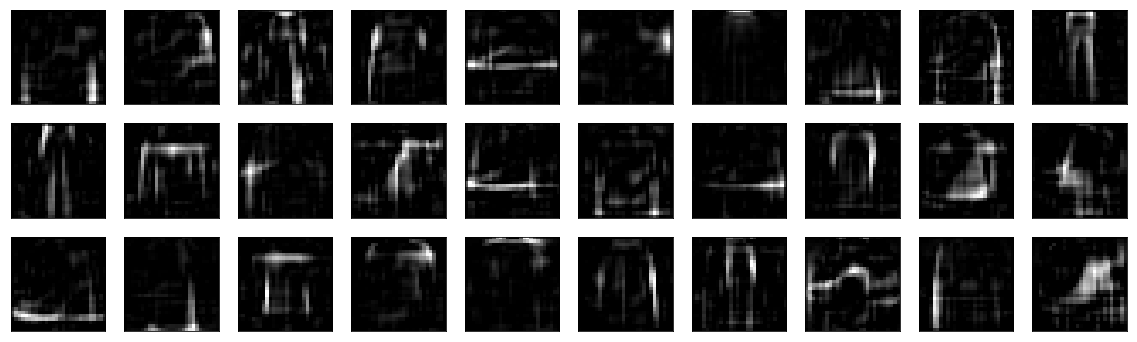

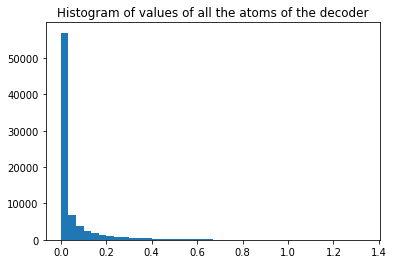

In [40]:
sp_o = 0.2
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


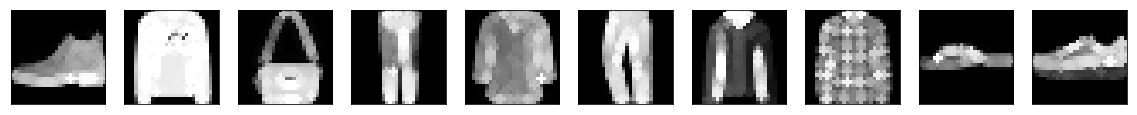

Dilatation of the reconstructions


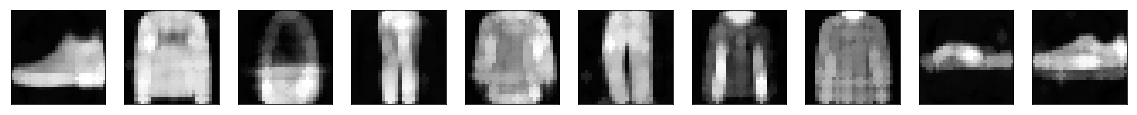

Original images and max-approximation to dilatation
Max-approx error to original:  0.9815859095573425  - Max-approx error to reconstruction:  1.0114819564819335


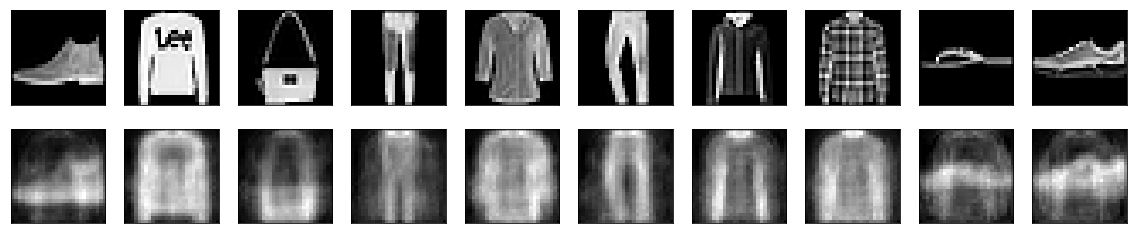

Dilated of the atom images of the decoder


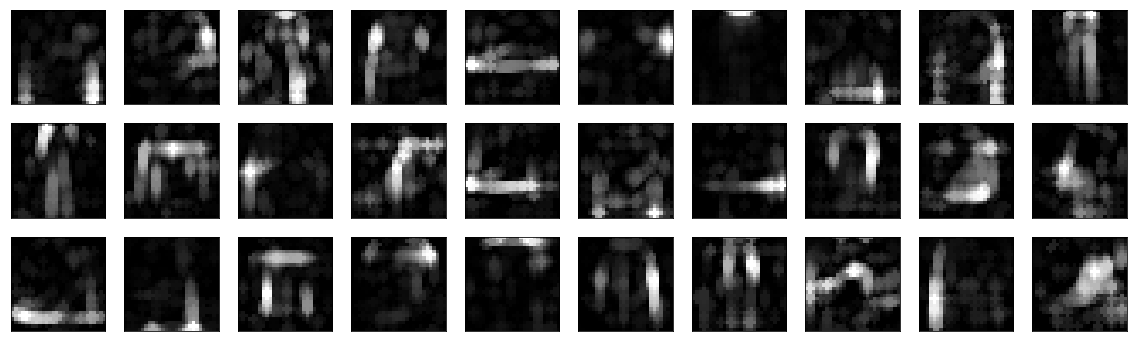

In [41]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.7 Sparsity_weight = 0.1 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.016154335606098174


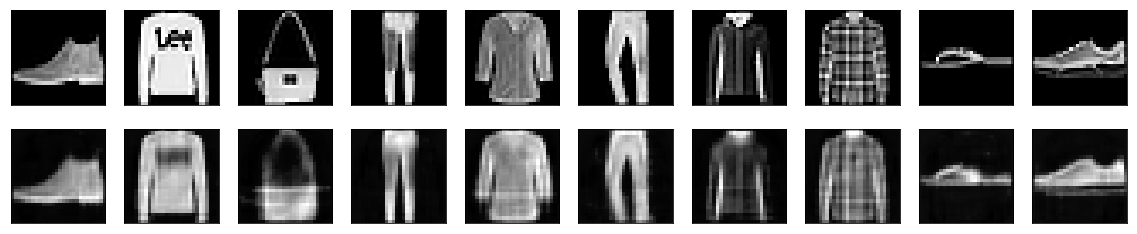

Histograms of the encodings - Sparsity (Hoyer):  0.26426824927330017


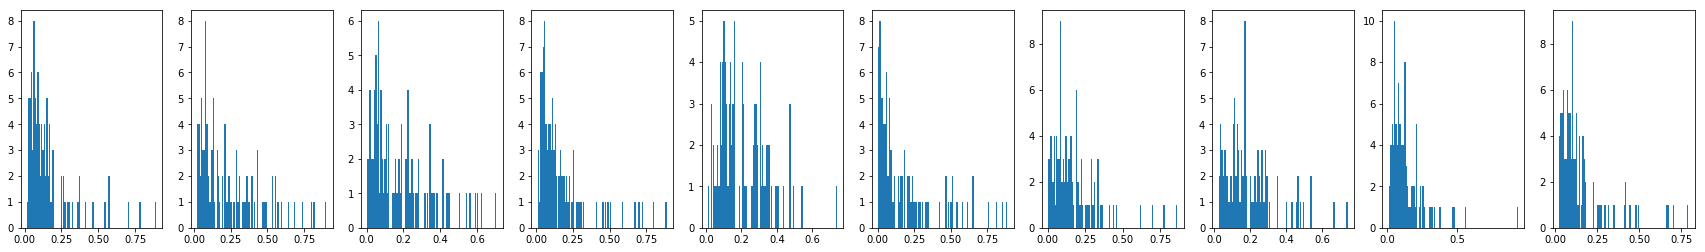

Atom images of the decoder


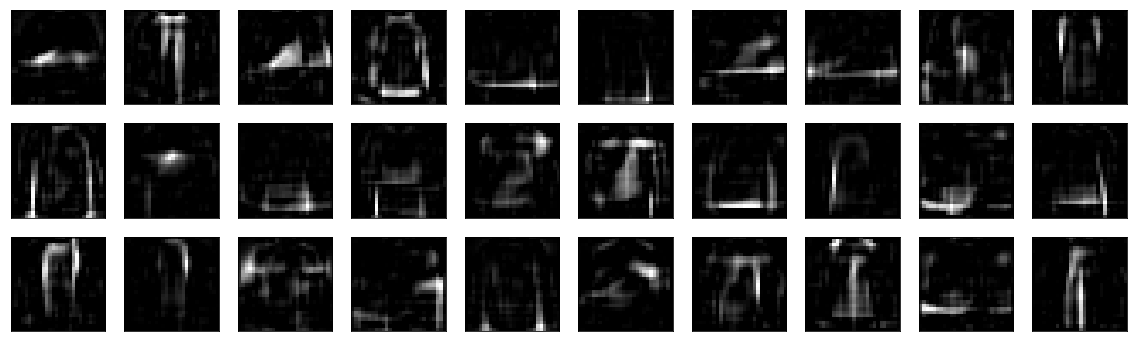

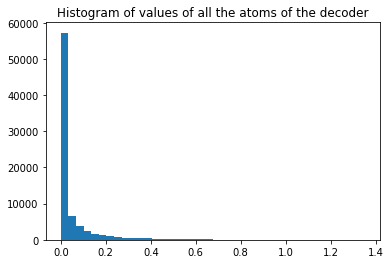

In [42]:
sp_o = 0.2
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_27_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


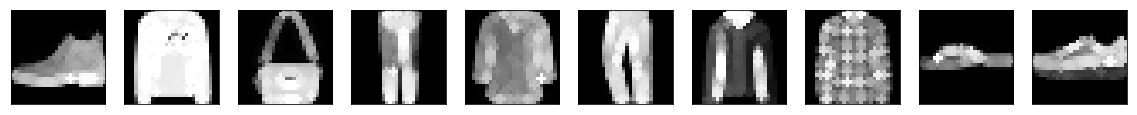

Dilatation of the reconstructions


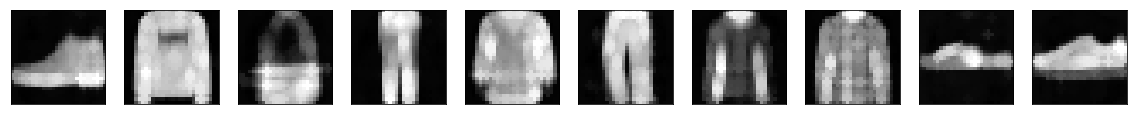

Original images and max-approximation to dilatation
Max-approx error to original:  1.0373153855323791  - Max-approx error to reconstruction:  1.0663997276306152


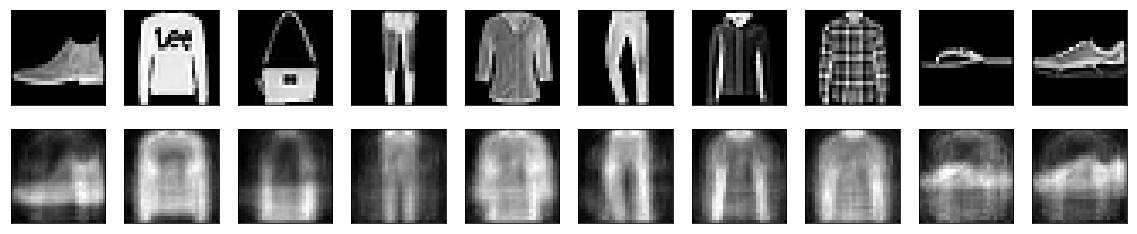

Dilated of the atom images of the decoder


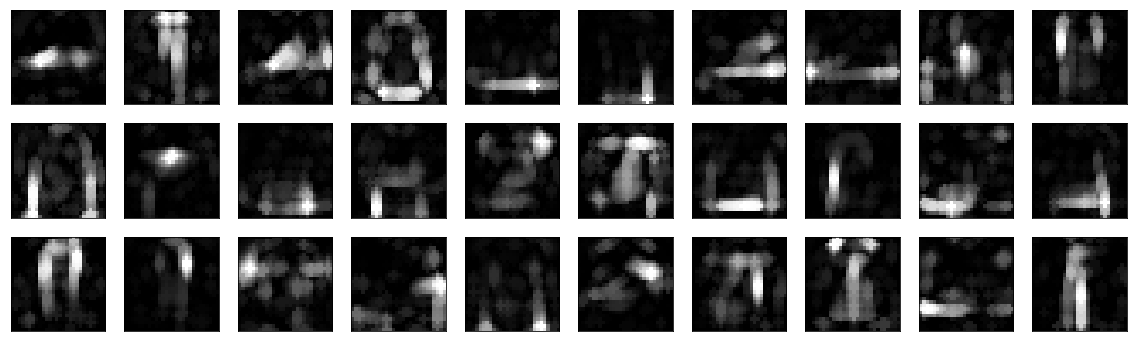

In [43]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.8 Sparsity_weight = 0.5 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.04050378572940826


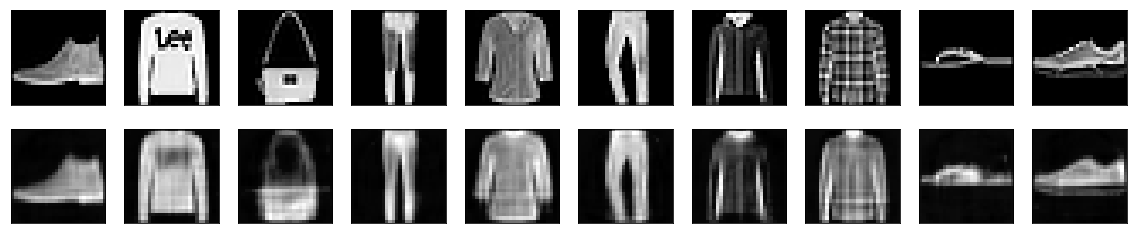

Histograms of the encodings - Sparsity (Hoyer):  0.22590258717536926


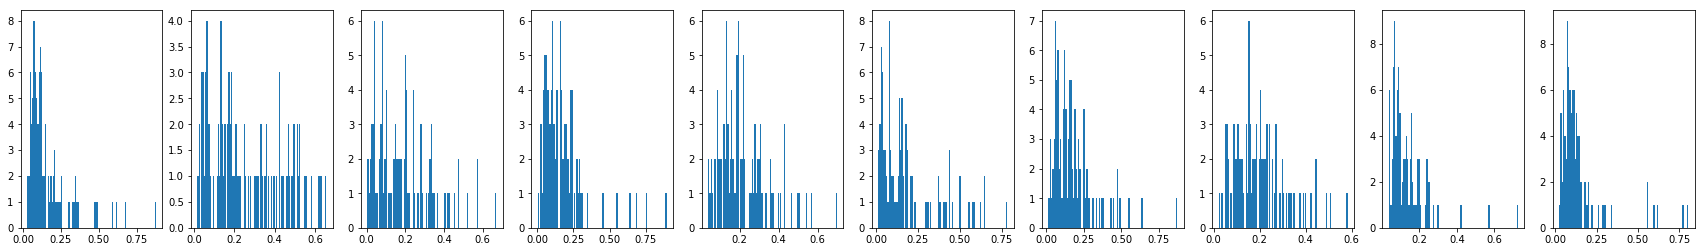

Atom images of the decoder


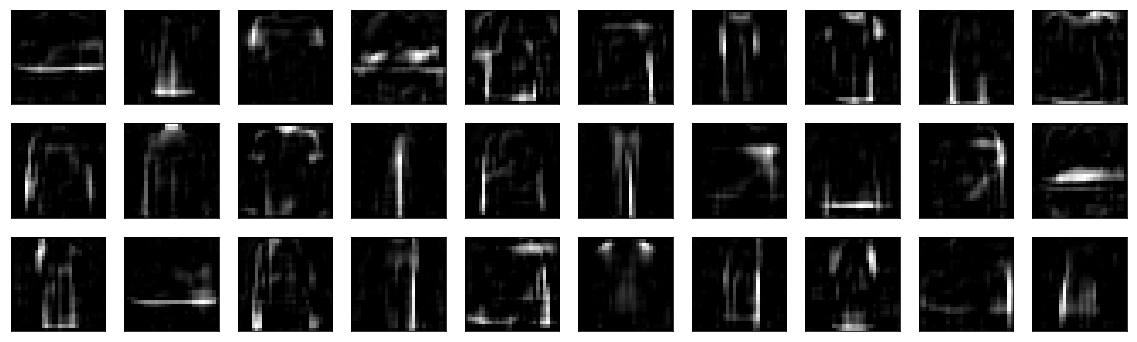

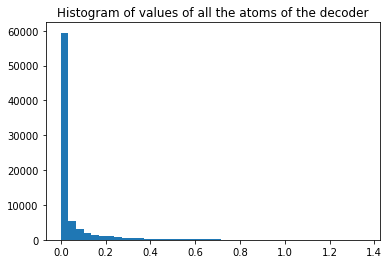

In [44]:
sp_o = 0.2
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_AsymAEinfoGAN_KLsum_NonNegConstraint.load('18_09_28_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/AsymAE_infoGAN/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


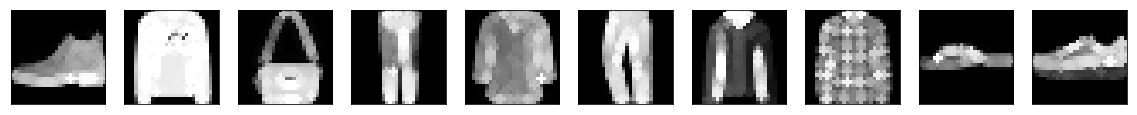

Dilatation of the reconstructions


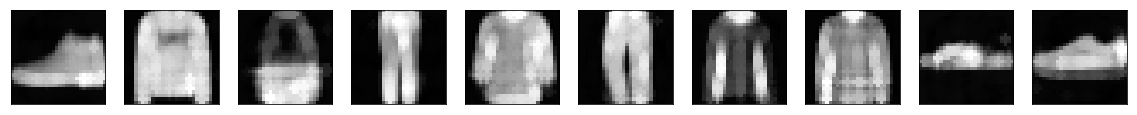

Original images and max-approximation to dilatation
Max-approx error to original:  1.1874091339111328  - Max-approx error to reconstruction:  1.2139377910614013


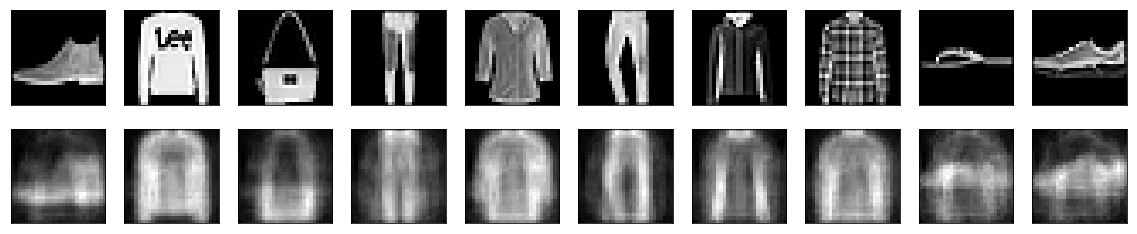

Dilated of the atom images of the decoder


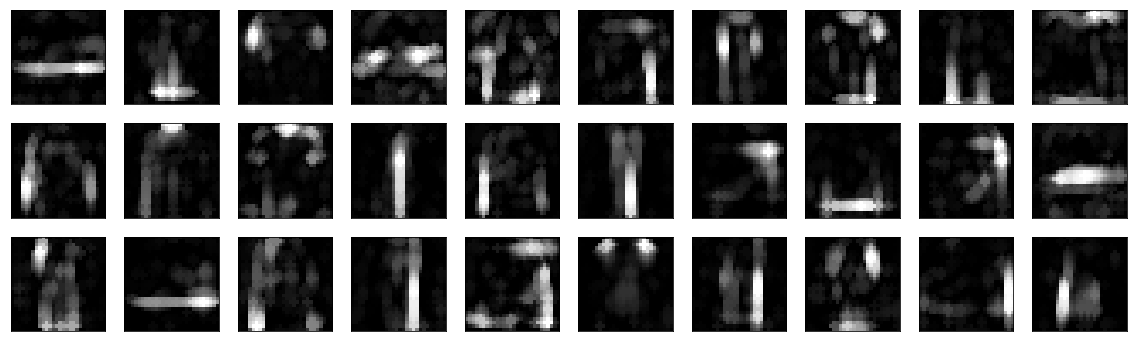

In [45]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)